In [1]:
from ipywidgets import GridBox, Output
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
import random
import numpy as np
import gym
from gym import spaces
import sys
from io import StringIO
import numpy as np
import gym
import random
from collections import defaultdict

import optuna
import warnings
warnings.filterwarnings("ignore")

In [2]:
def simulate(env):
    for i in range(10):
        state, grid = env.reset()
        action = random.choice(range(env.possible_action.n))
        n_st, reward, done, _ = env.step(action)
        episode_reward = reward
        num_steps = 1

        while not done:
            state = n_st
            action = random.choice(range(env.possible_action.n))
            n_st, reward, done, _ = env.step(action)
            episode_reward += reward
            num_steps += 1

            print("Step=", num_steps)
            print("Current state=", state)
            print("Chosen action=", action)
            print("Reward=", reward)
            print("Next state=", n_st)
            env.render()

        print("Episode ended in {} timesteps".format(num_steps))
        print("This episode's reward is =", episode_reward)
        
def greedy_policy(Q, s, n, e):
    if random.random() < e:
        return random.randint(0, n-1)
    elif random.random() > e:
        return np.argmax(Q[s])
    else:
        print('there is an error, re do this')

# Part 1 Step1

GridBox(children=(Output(),))

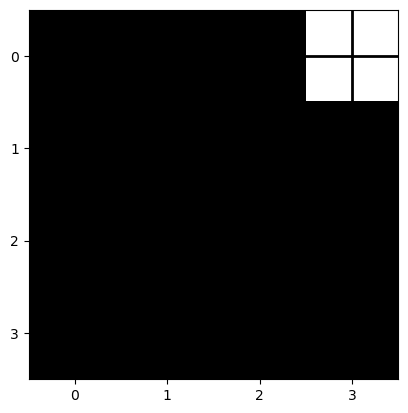

In [3]:
grid_box = GridBox([Output()])

for _ in range(1):
    grid = np.zeros((4, 4))
    grid[np.random.randint(4), np.random.randint(4)] = 1

    with grid_box.children[0]:
     
        
        plt.imshow(grid, cmap='gray', origin='upper')
        plt.xticks(np.arange(4))
        plt.yticks(np.arange(4))
        plt.grid(color='k', lw=2)
       

display(grid_box)


# Part1 step 2

In [4]:
class mars_exploration_rover(gym.Env):
    
    def __init__(self, n, exploration_reward, exploration_penalty, move_penalty):
        self.grid = np.zeros((n, n))
        self.n = n
        self.exploration_reward = exploration_reward
        self.exploration_penalty = exploration_penalty
        self.move_penalty = move_penalty
        
        
        self.state = (0, 0) 
        
        
        self.possible_action = spaces.Discrete(4)  
        self.observation_space = spaces.Discrete(n * n)
        self.reward_range = (-exploration_penalty, exploration_reward)
        
        
        self.battery_loc = (n-1, n-1)
        self.terrain = []
        for i in range(n):
            for j in range(n):
                if (i, j) != self.battery_loc:
                    self.terrain.append((i, j))
        
    def reset(self):
        self.grid = np.zeros((self.n, self.n))
        self.state = (0, 0)
        self.grid[self.state] = 1 
        return self.state, self.grid
    
    def step(self, action):
        reward = 0
        done = False
        i, j = self.state
        
        if action == 0:  
            if i > 0:
                i -= 1
        elif action == 1:  
            if i < self.n - 1:
                i += 1
        elif action == 2:  
            if j < self.n - 1:
                j += 1
        elif action == 3:  
            if j > 0:
                j -= 1
                
        
        n_st= (i, j)
        self.grid[self.state] = -1 
        self.grid[n_st] = 1  
        self.state = n_st
        
        
        if n_st == self.battery_loc:
            done = True
            reward = self.exploration_reward
            
        elif n_st in self.terrain:
            done = False
            reward = self.exploration_penalty
            
        
        return n_st, reward, done, {}
    def plot_this(self):
        plt.imshow(self.grid, cmap='gray', origin='upper')
        plt.yticks(np.arange(self.n))
        plt.xticks(np.arange(self.n))
        plt.grid(color='k', lw=2)
        plt.show()
        
    
    def render(self, mode='human'):
        self.plot_this()
        




# Part 1 step 3

Step= 2
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


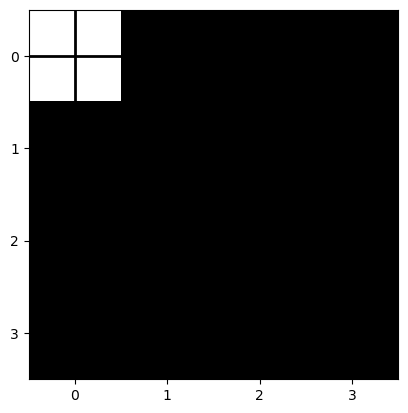

Step= 3
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


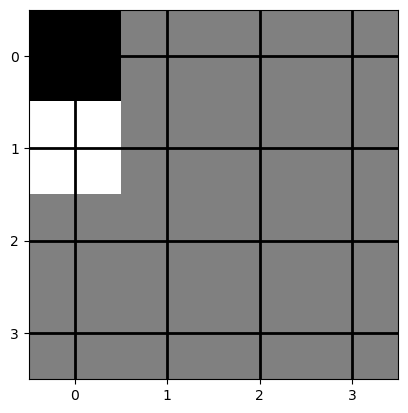

Step= 4
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


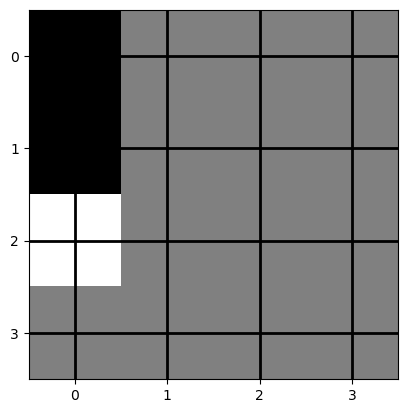

Step= 5
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


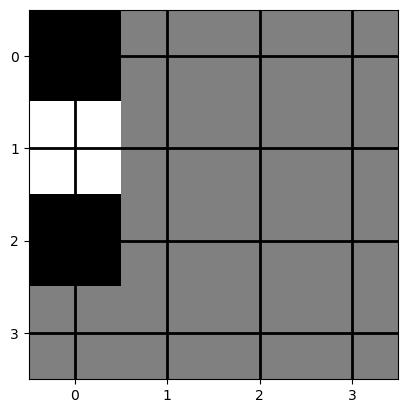

Step= 6
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


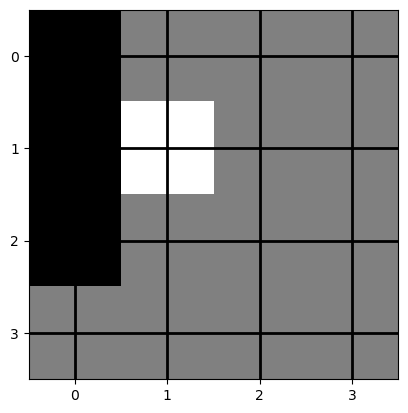

Step= 7
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


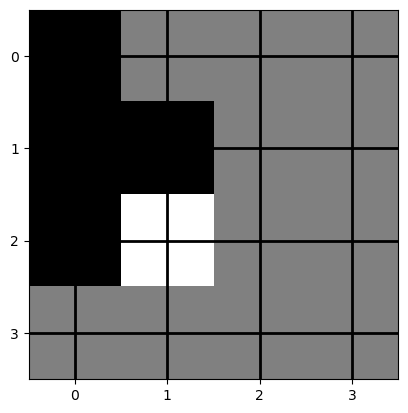

Step= 8
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


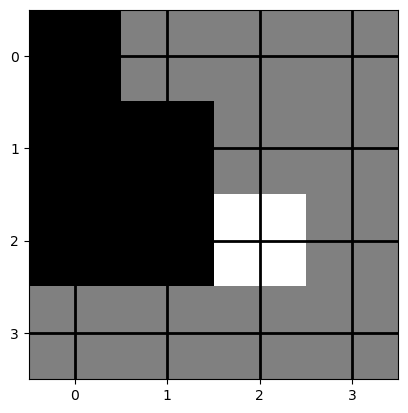

Step= 9
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


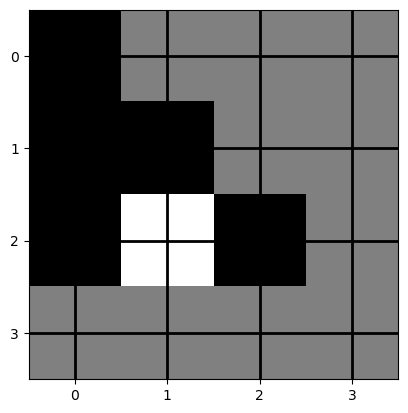

Step= 10
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


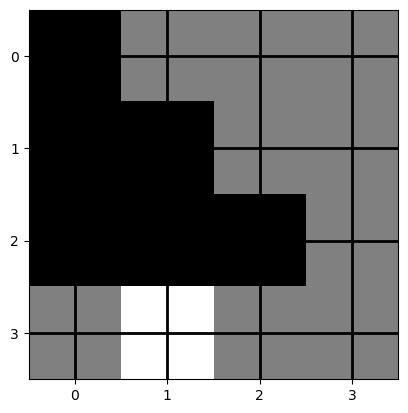

Step= 11
Current state= (3, 1)
Chosen action= 0
Reward= -5
Next state= (2, 1)


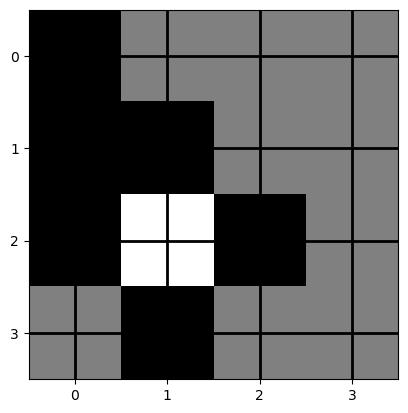

Step= 12
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


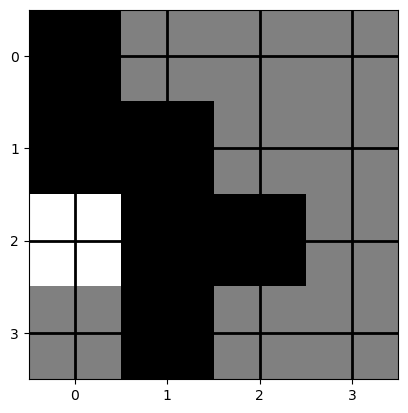

Step= 13
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


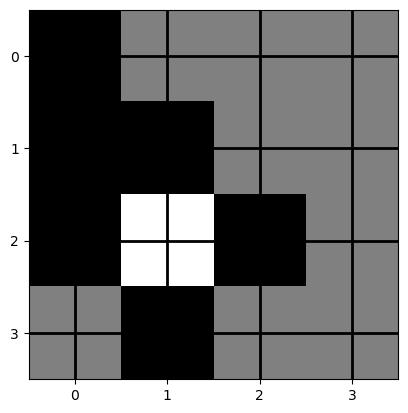

Step= 14
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


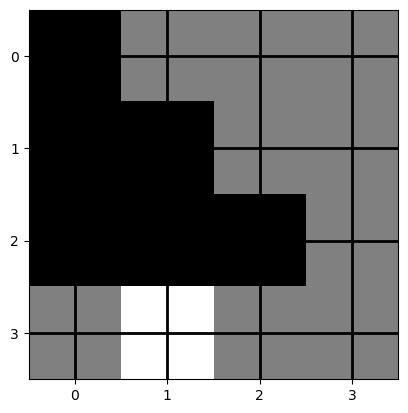

Step= 15
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


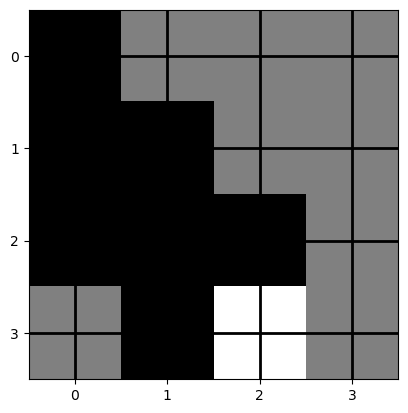

Step= 16
Current state= (3, 2)
Chosen action= 3
Reward= -5
Next state= (3, 1)


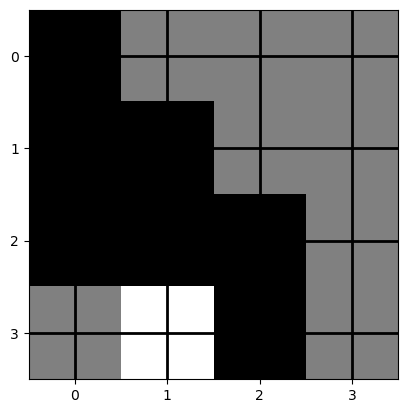

Step= 17
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


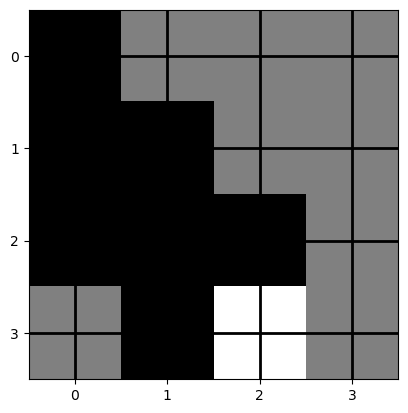

Step= 18
Current state= (3, 2)
Chosen action= 2
Reward= 0
Next state= (3, 3)


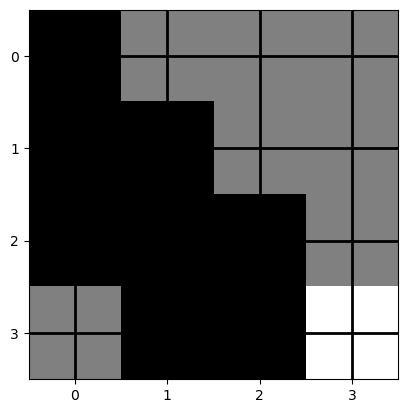

Episode ended in 18 timesteps
This episode's reward is = -85
Step= 2
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


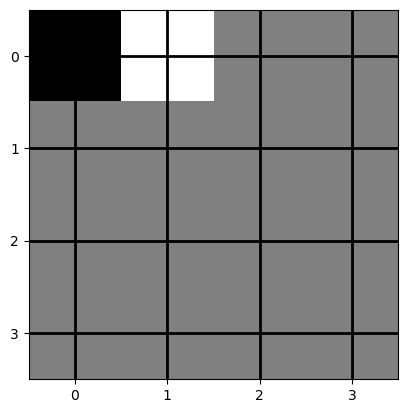

Step= 3
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


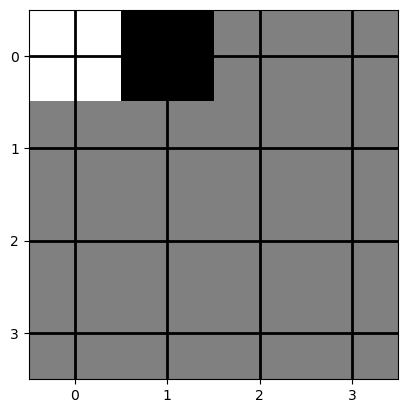

Step= 4
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


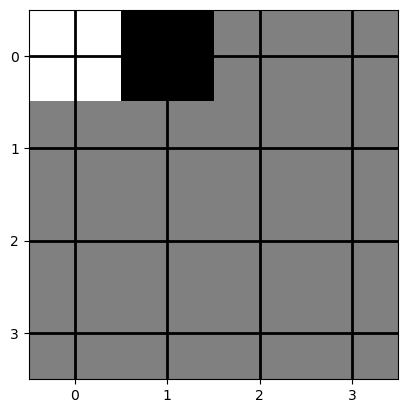

Step= 5
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


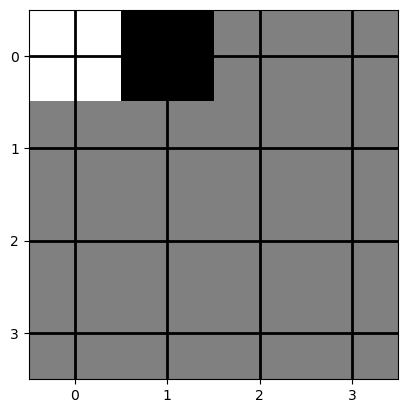

Step= 6
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


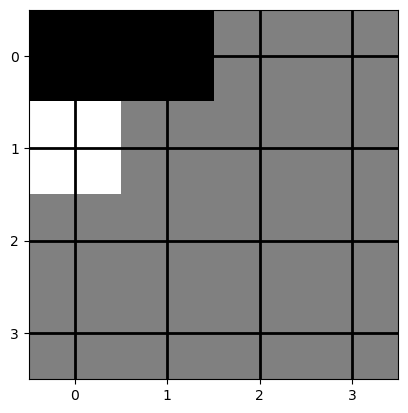

Step= 7
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


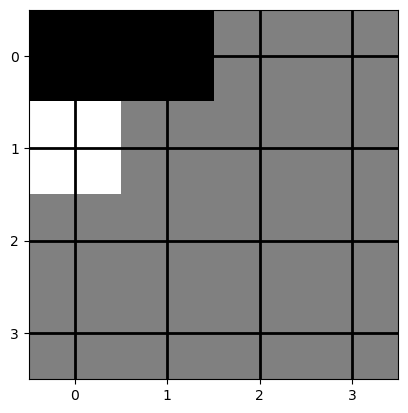

Step= 8
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


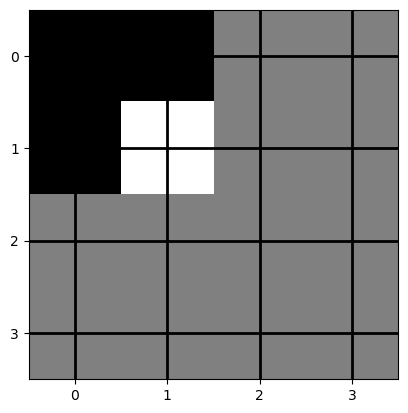

Step= 9
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


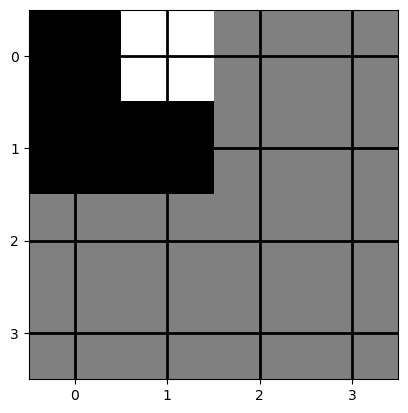

Step= 10
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


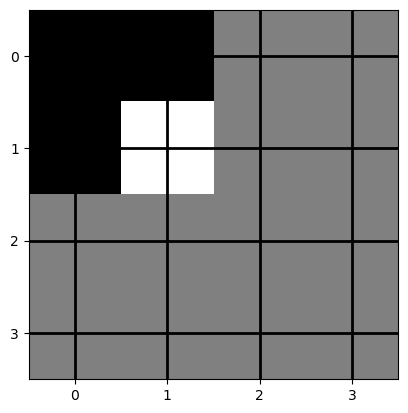

Step= 11
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


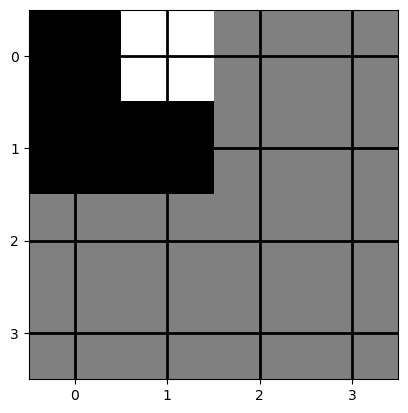

Step= 12
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


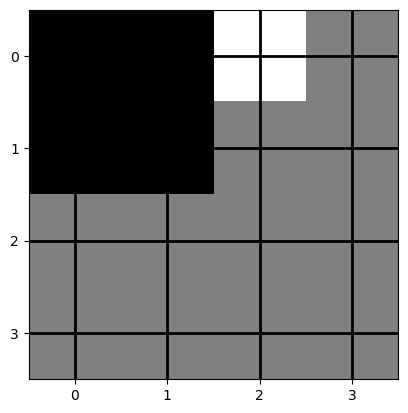

Step= 13
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


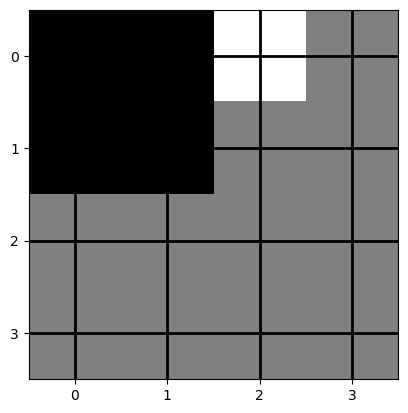

Step= 14
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


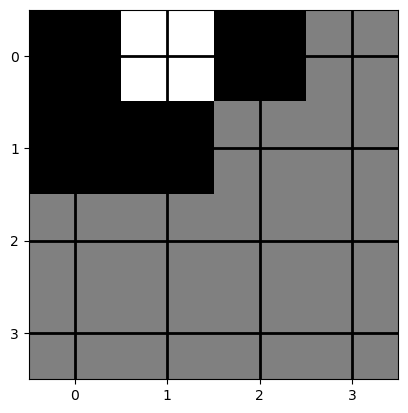

Step= 15
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


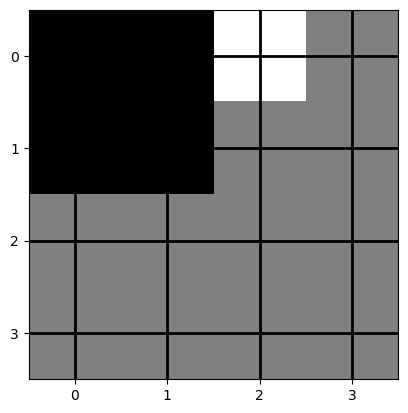

Step= 16
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


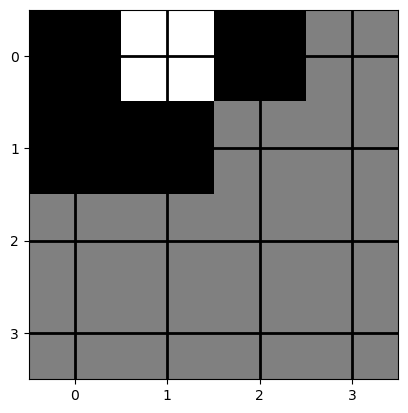

Step= 17
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


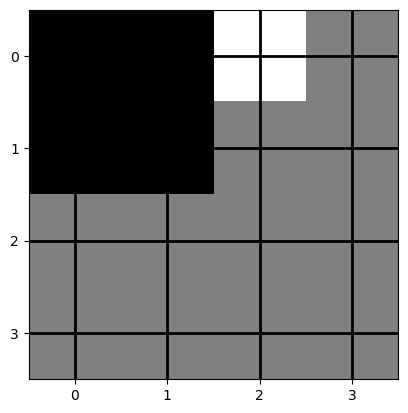

Step= 18
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


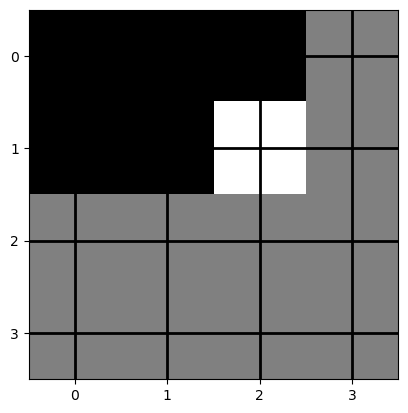

Step= 19
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


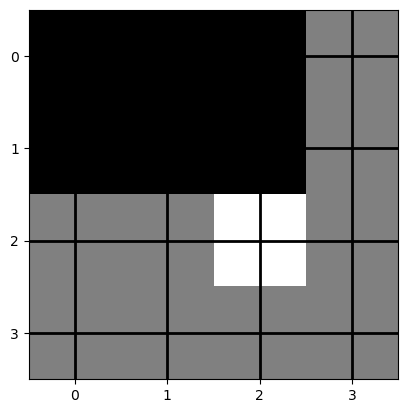

Step= 20
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


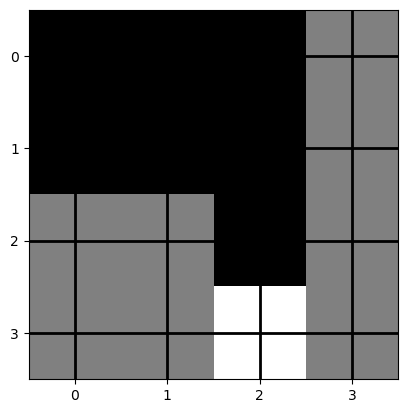

Step= 21
Current state= (3, 2)
Chosen action= 3
Reward= -5
Next state= (3, 1)


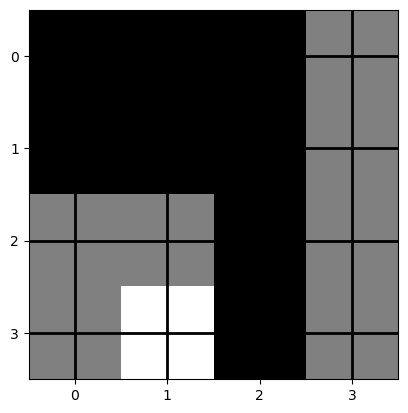

Step= 22
Current state= (3, 1)
Chosen action= 0
Reward= -5
Next state= (2, 1)


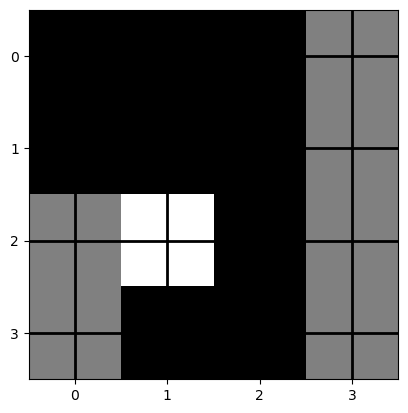

Step= 23
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


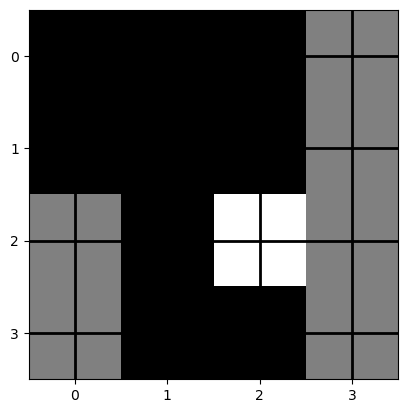

Step= 24
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


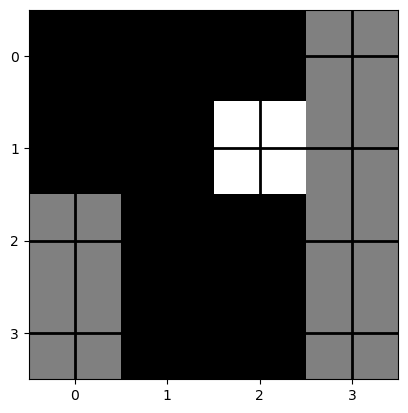

Step= 25
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


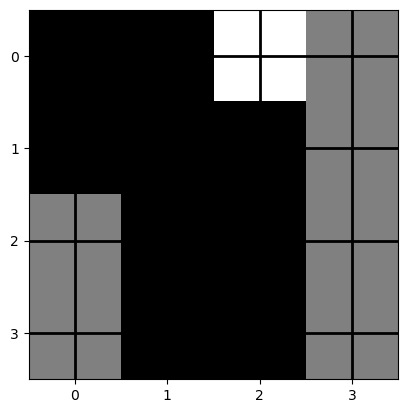

Step= 26
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


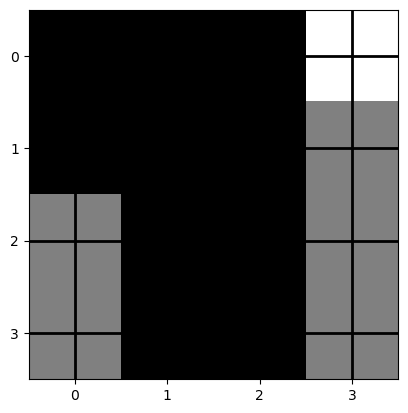

Step= 27
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


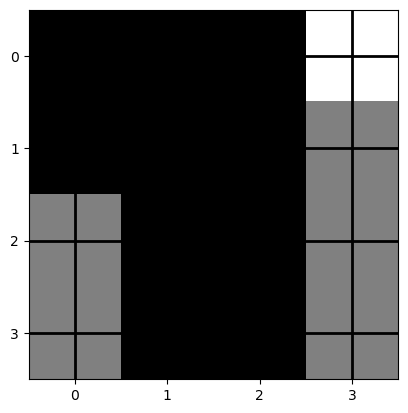

Step= 28
Current state= (0, 3)
Chosen action= 1
Reward= -5
Next state= (1, 3)


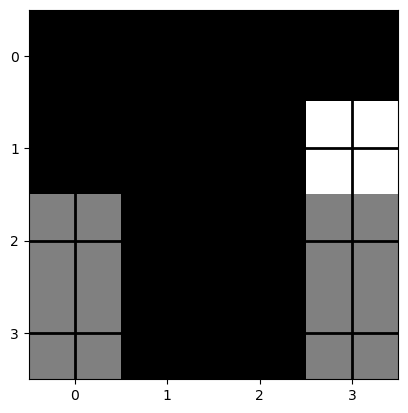

Step= 29
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


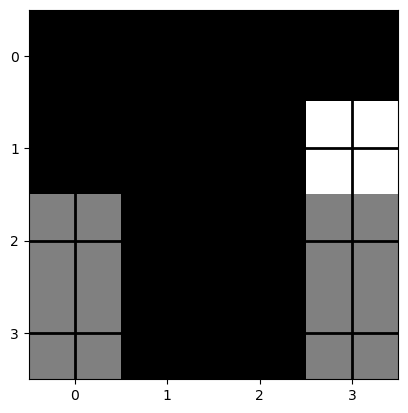

Step= 30
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


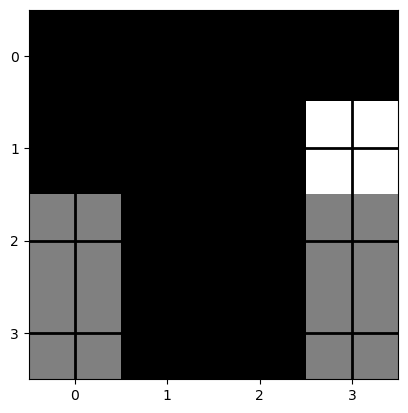

Step= 31
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


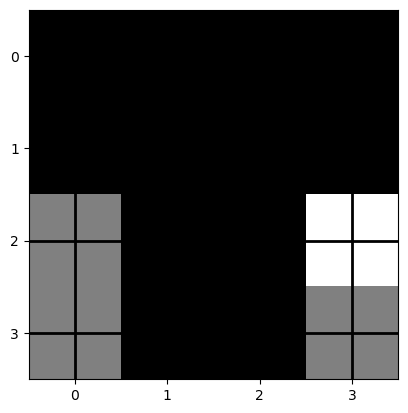

Step= 32
Current state= (2, 3)
Chosen action= 3
Reward= -5
Next state= (2, 2)


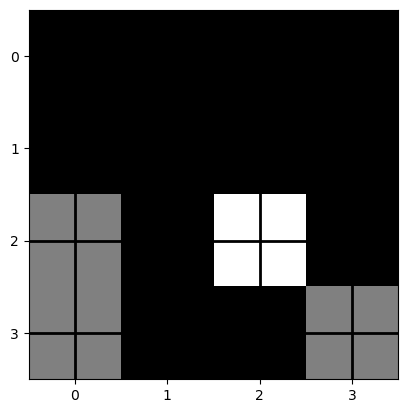

Step= 33
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


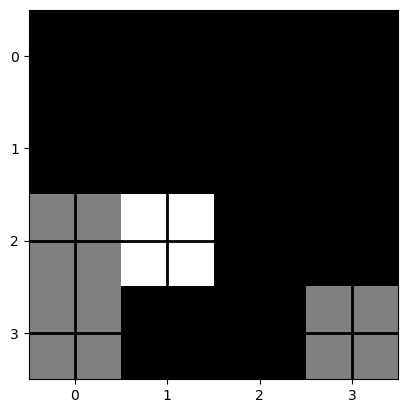

Step= 34
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


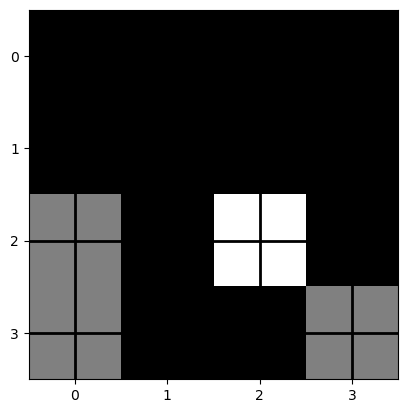

Step= 35
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


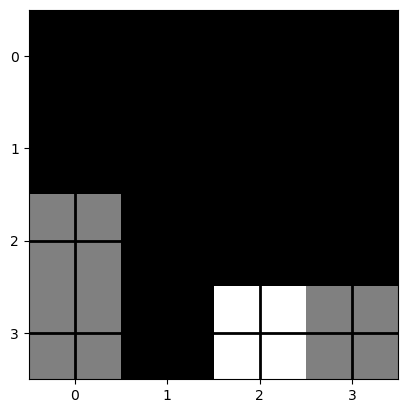

Step= 36
Current state= (3, 2)
Chosen action= 0
Reward= -5
Next state= (2, 2)


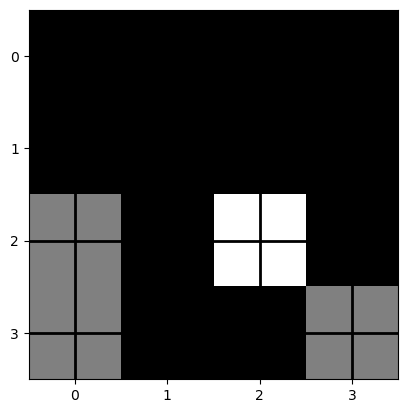

Step= 37
Current state= (2, 2)
Chosen action= 2
Reward= -5
Next state= (2, 3)


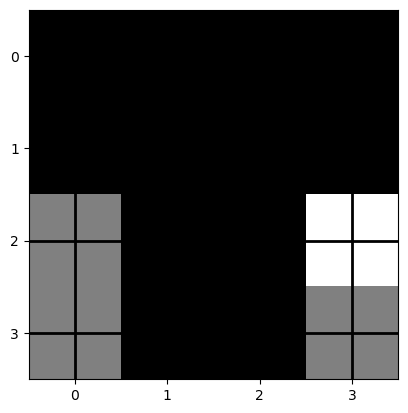

Step= 38
Current state= (2, 3)
Chosen action= 1
Reward= 0
Next state= (3, 3)


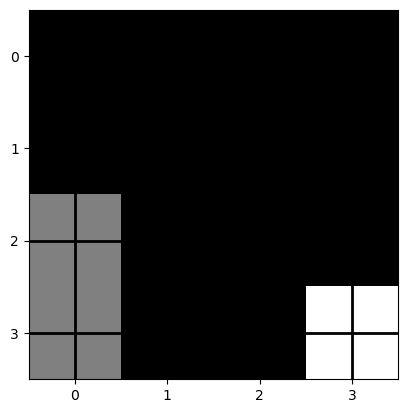

Episode ended in 38 timesteps
This episode's reward is = -185
Step= 2
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


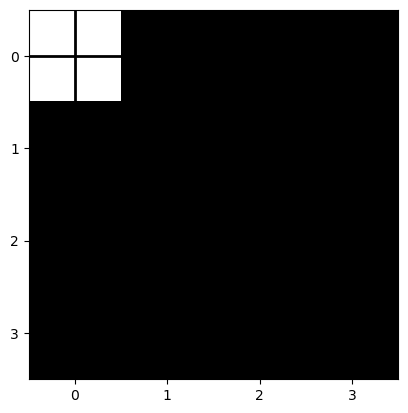

Step= 3
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


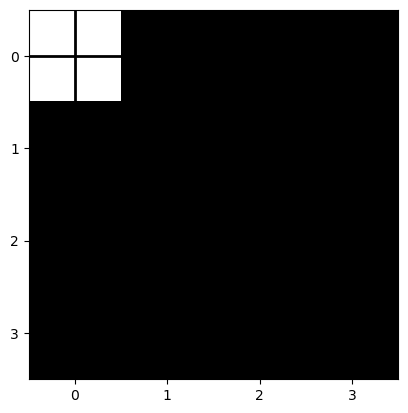

Step= 4
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


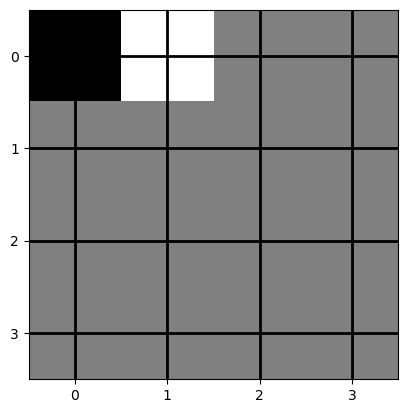

Step= 5
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


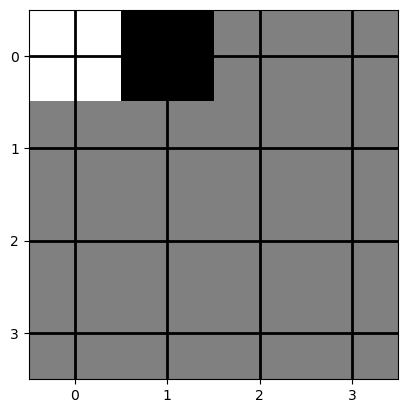

Step= 6
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


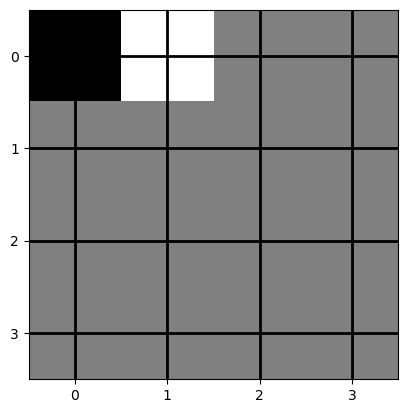

Step= 7
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


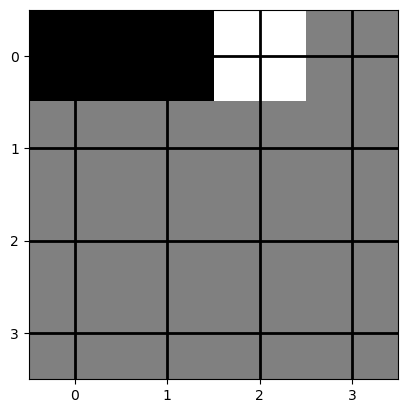

Step= 8
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


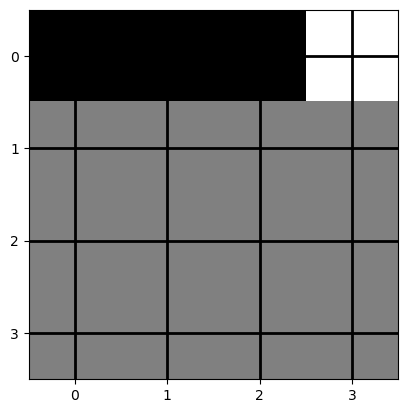

Step= 9
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


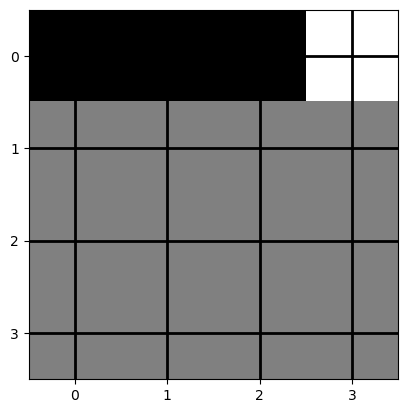

Step= 10
Current state= (0, 3)
Chosen action= 1
Reward= -5
Next state= (1, 3)


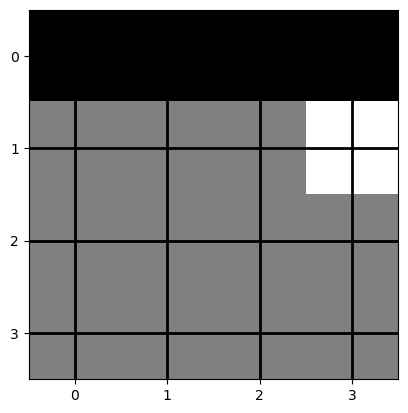

Step= 11
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


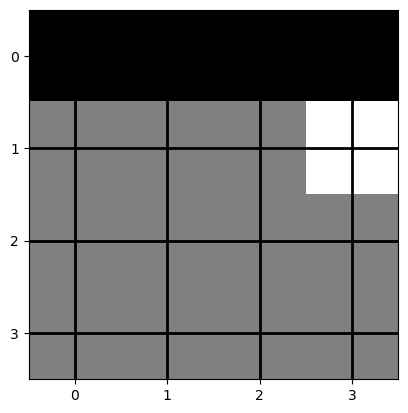

Step= 12
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


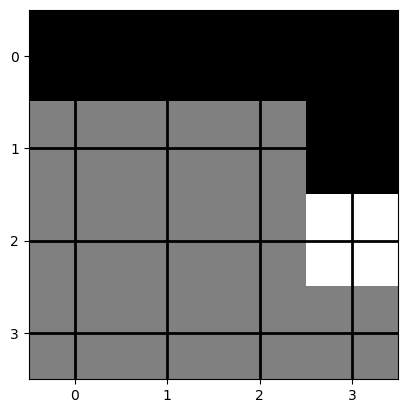

Step= 13
Current state= (2, 3)
Chosen action= 1
Reward= 0
Next state= (3, 3)


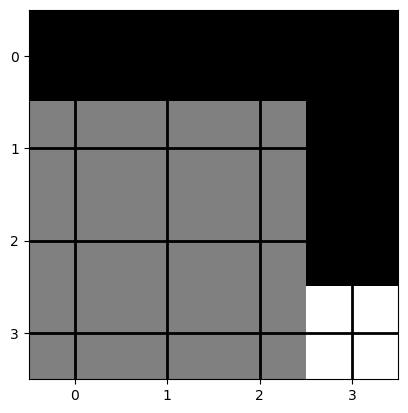

Episode ended in 13 timesteps
This episode's reward is = -60
Step= 2
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


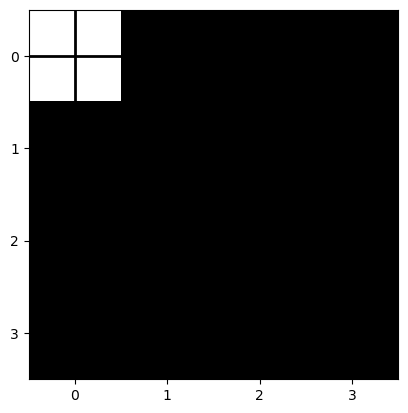

Step= 3
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


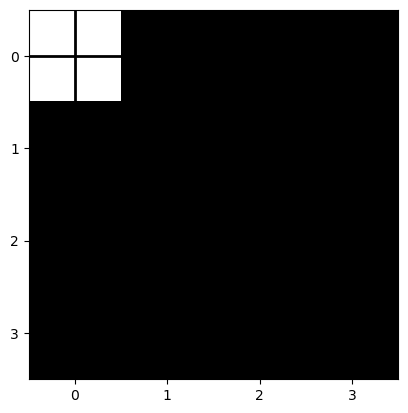

Step= 4
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


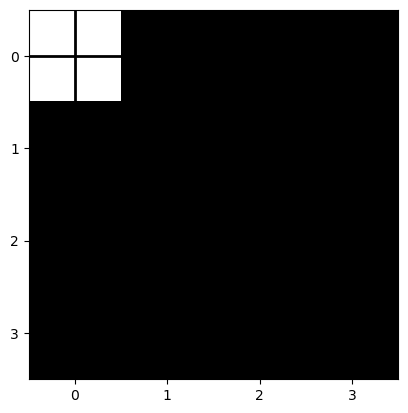

Step= 5
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


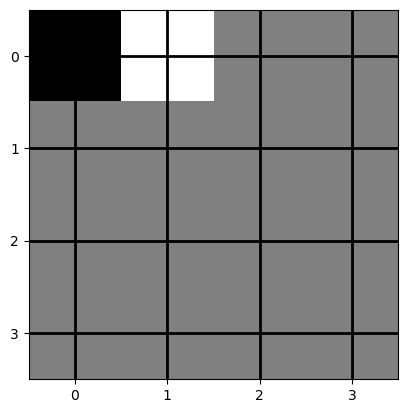

Step= 6
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


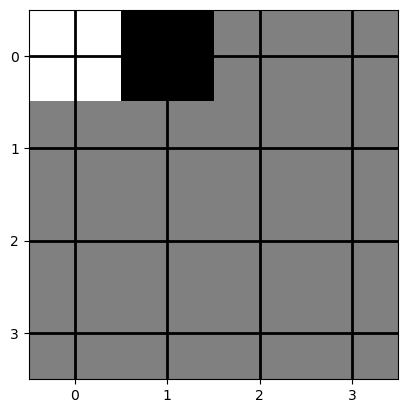

Step= 7
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


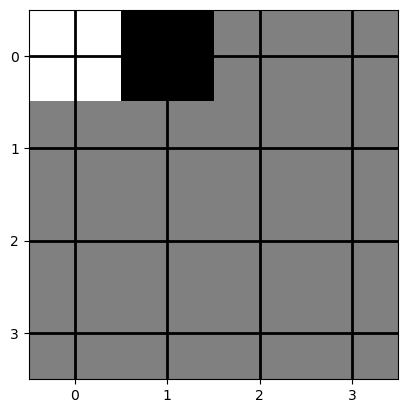

Step= 8
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


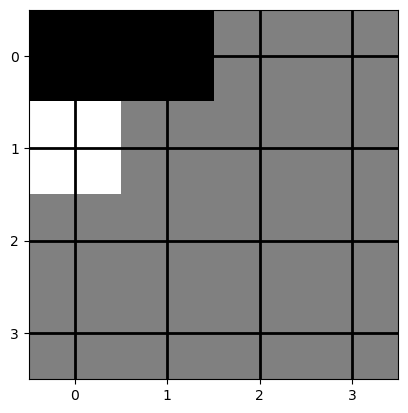

Step= 9
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


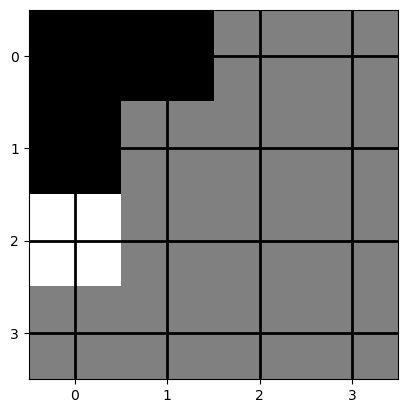

Step= 10
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


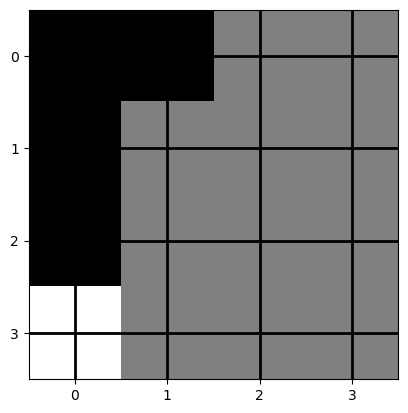

Step= 11
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


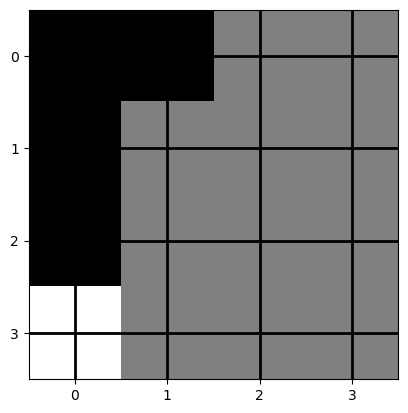

Step= 12
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


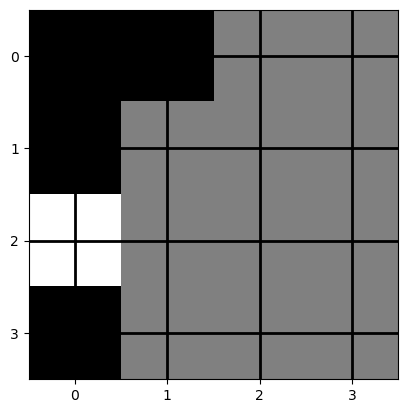

Step= 13
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


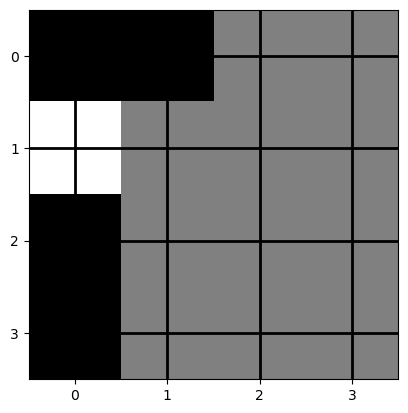

Step= 14
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


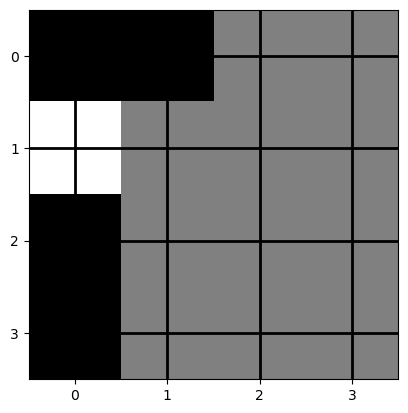

Step= 15
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


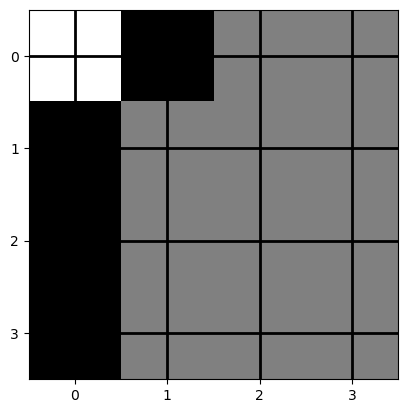

Step= 16
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


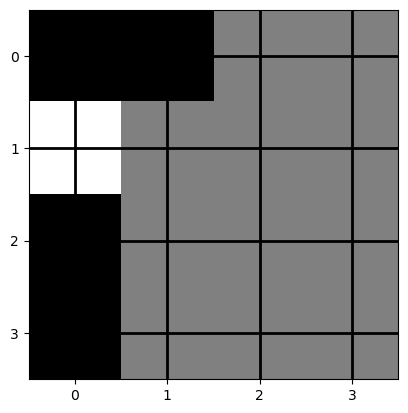

Step= 17
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


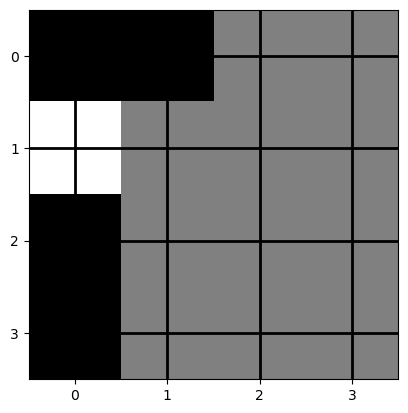

Step= 18
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


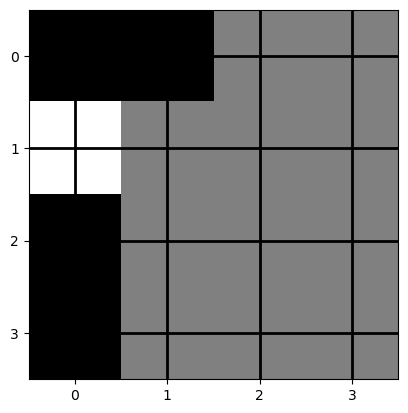

Step= 19
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


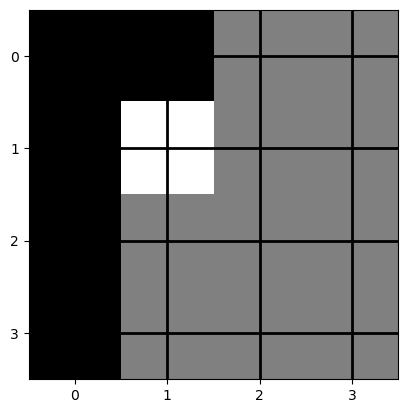

Step= 20
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


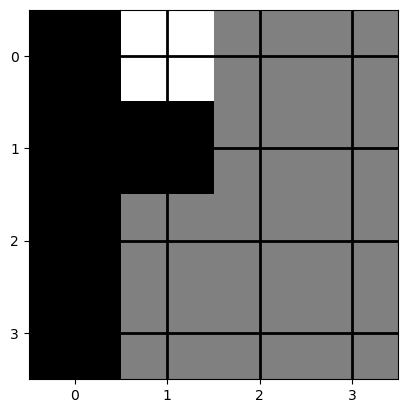

Step= 21
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


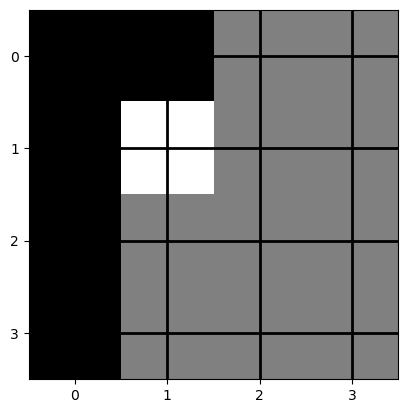

Step= 22
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


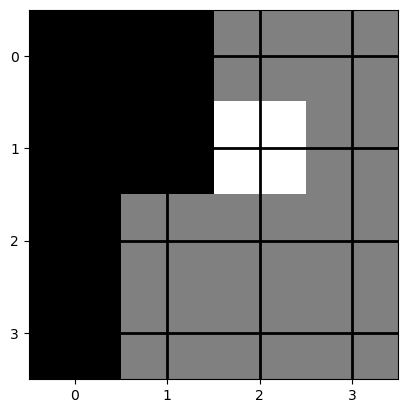

Step= 23
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


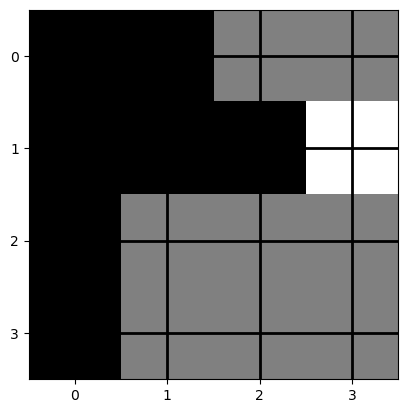

Step= 24
Current state= (1, 3)
Chosen action= 3
Reward= -5
Next state= (1, 2)


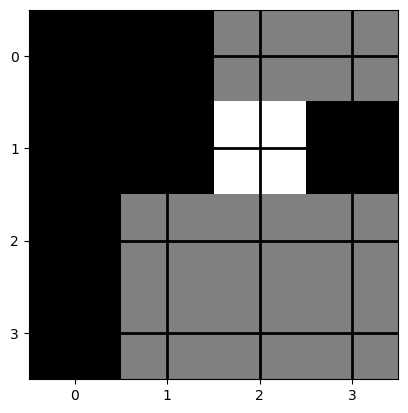

Step= 25
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


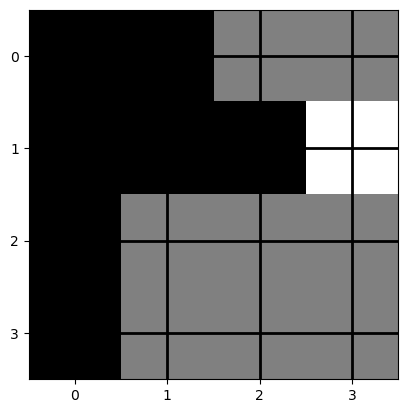

Step= 26
Current state= (1, 3)
Chosen action= 3
Reward= -5
Next state= (1, 2)


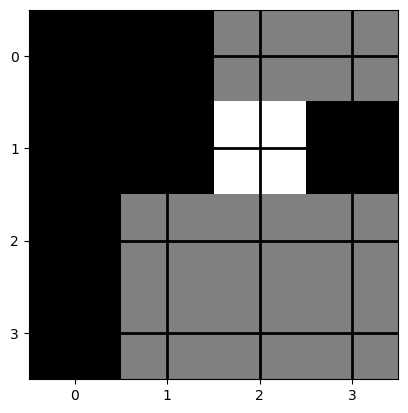

Step= 27
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


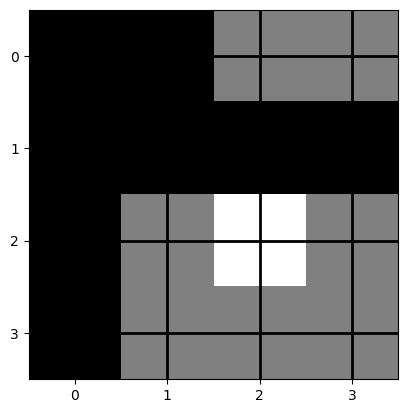

Step= 28
Current state= (2, 2)
Chosen action= 2
Reward= -5
Next state= (2, 3)


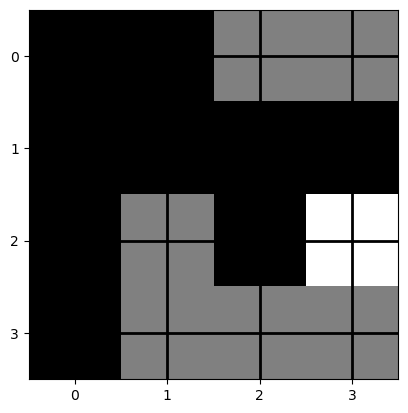

Step= 29
Current state= (2, 3)
Chosen action= 0
Reward= -5
Next state= (1, 3)


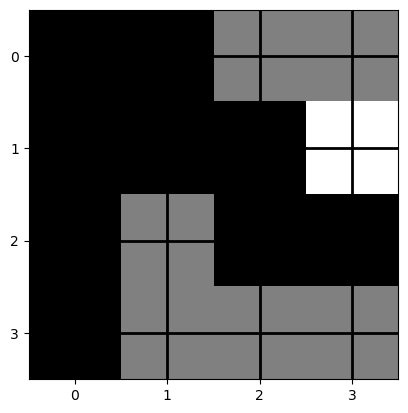

Step= 30
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


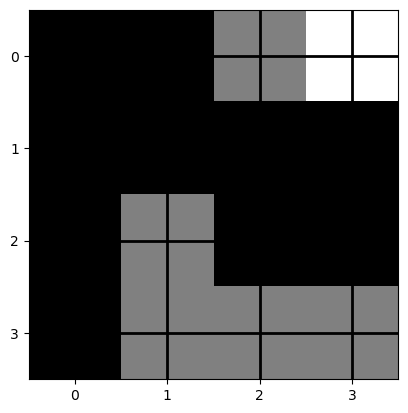

Step= 31
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


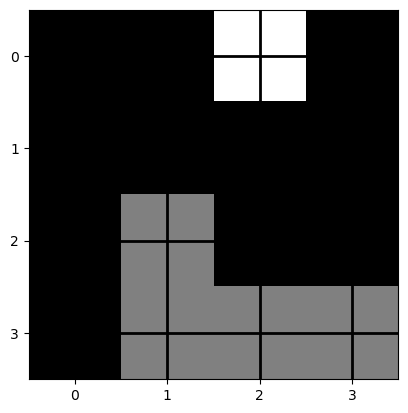

Step= 32
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


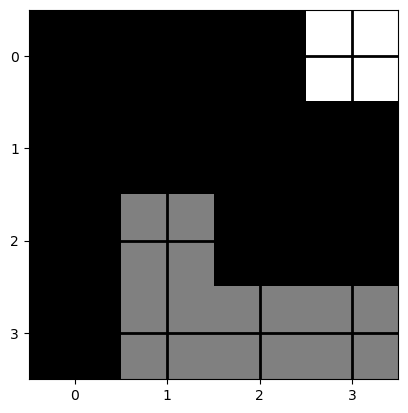

Step= 33
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


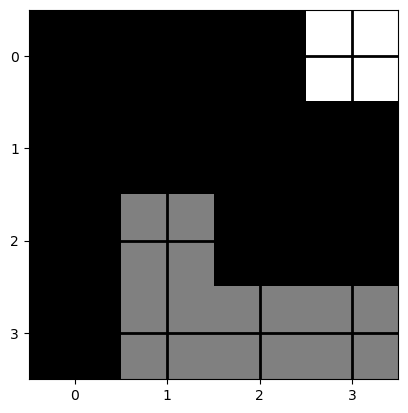

Step= 34
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


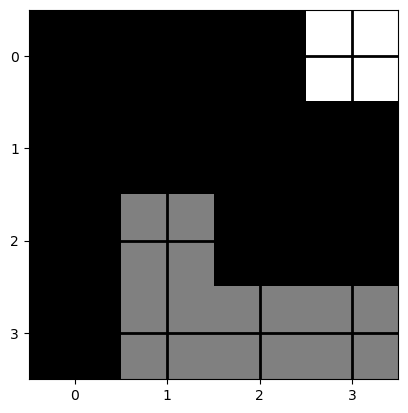

Step= 35
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


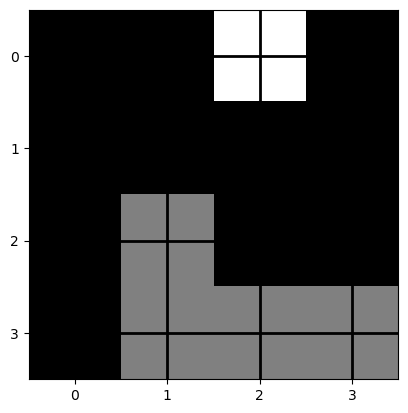

Step= 36
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


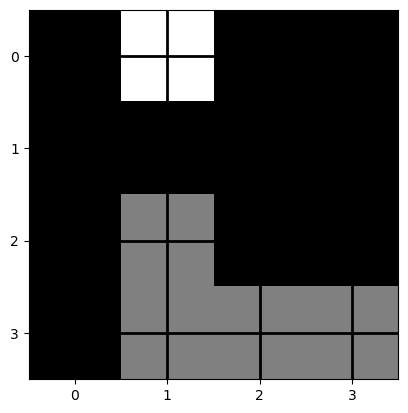

Step= 37
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


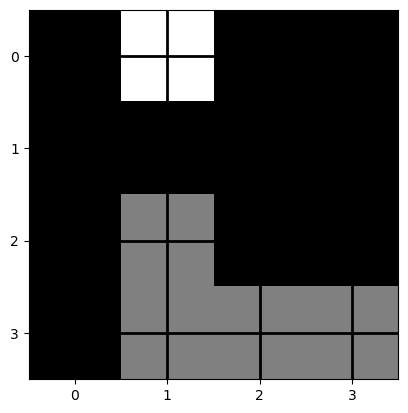

Step= 38
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


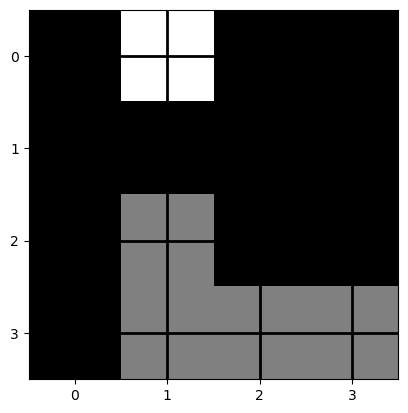

Step= 39
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


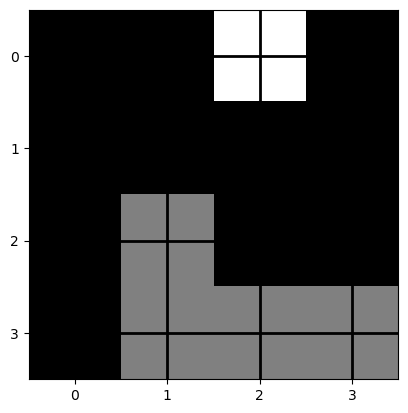

Step= 40
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


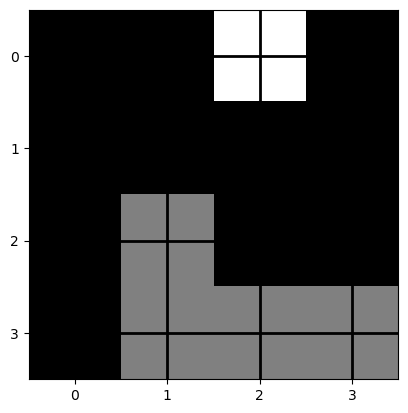

Step= 41
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


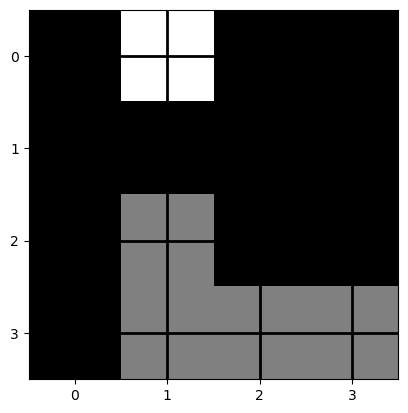

Step= 42
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


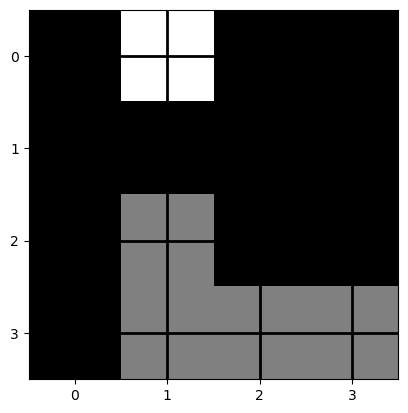

Step= 43
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


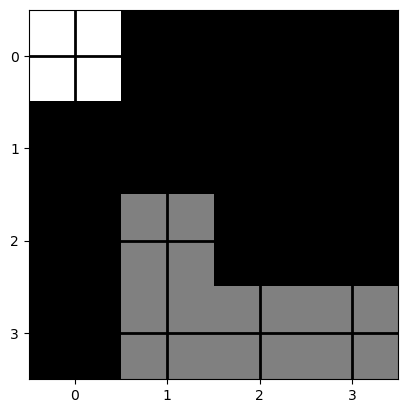

Step= 44
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


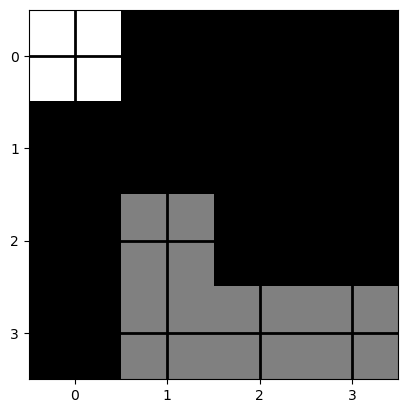

Step= 45
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


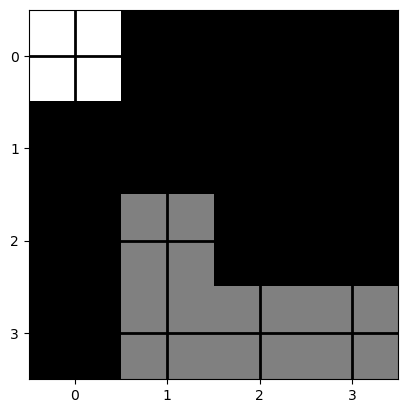

Step= 46
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


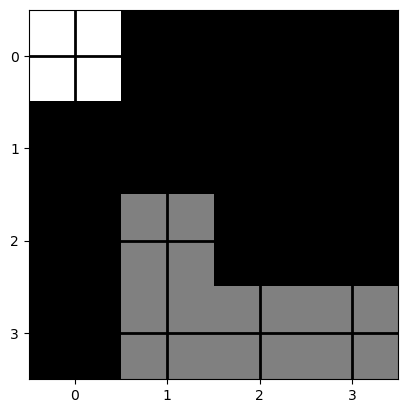

Step= 47
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


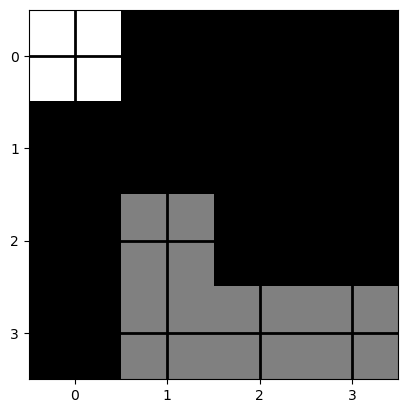

Step= 48
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


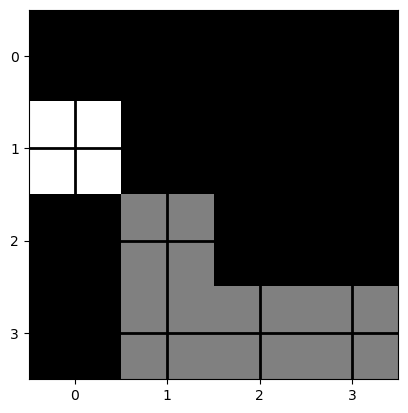

Step= 49
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


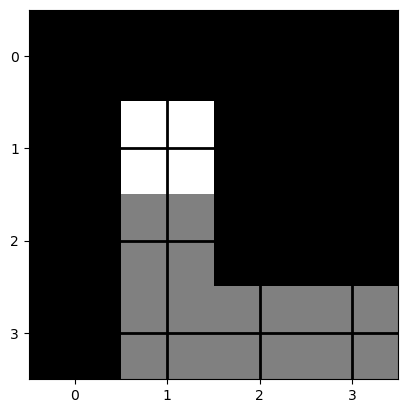

Step= 50
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


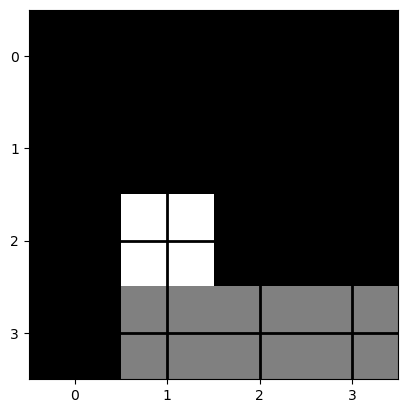

Step= 51
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


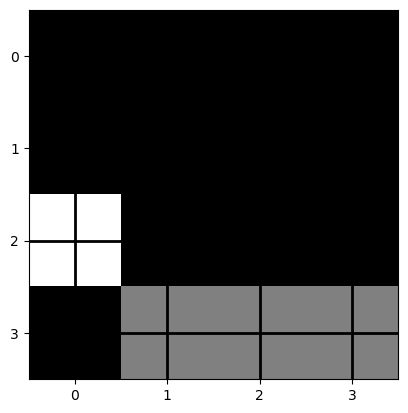

Step= 52
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


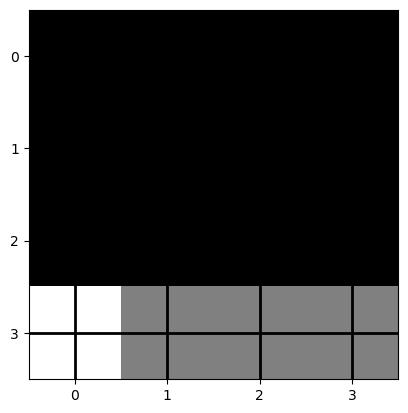

Step= 53
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


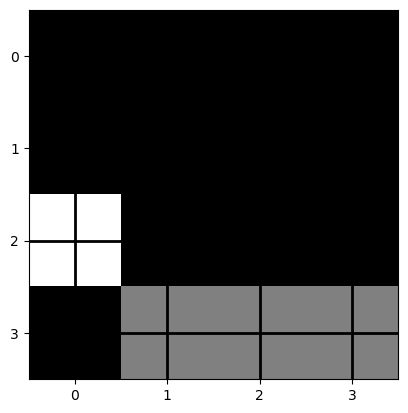

Step= 54
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


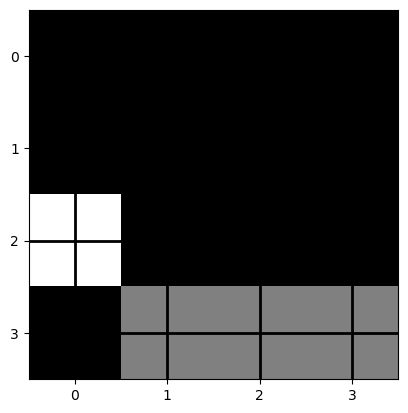

Step= 55
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


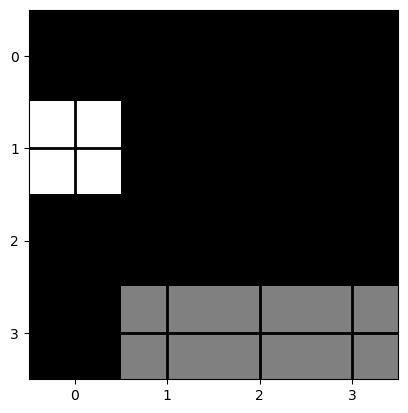

Step= 56
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


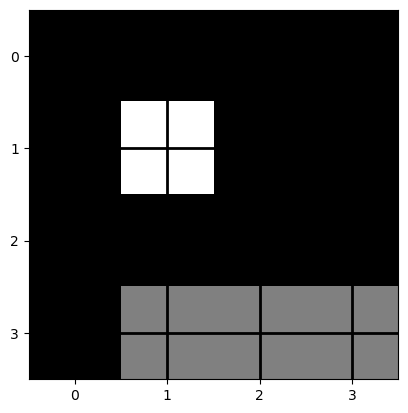

Step= 57
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


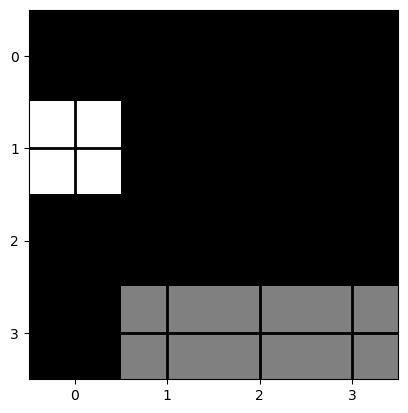

Step= 58
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


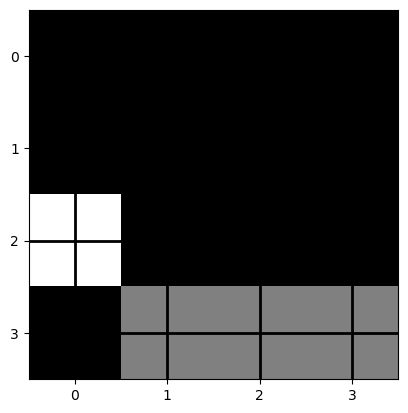

Step= 59
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


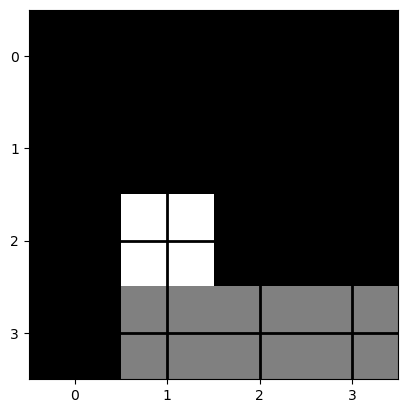

Step= 60
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


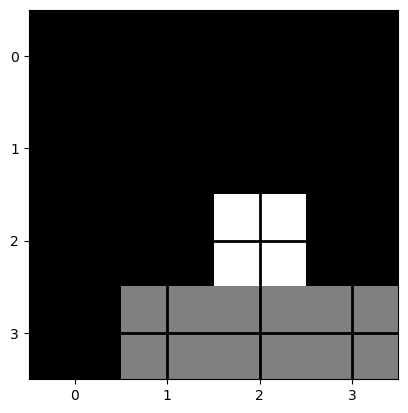

Step= 61
Current state= (2, 2)
Chosen action= 2
Reward= -5
Next state= (2, 3)


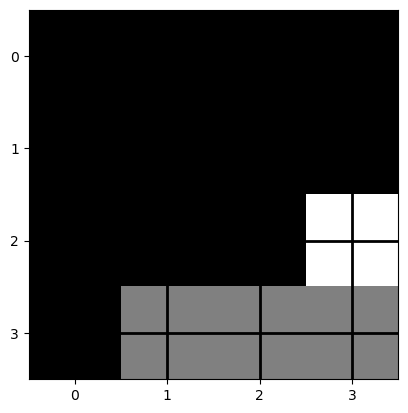

Step= 62
Current state= (2, 3)
Chosen action= 0
Reward= -5
Next state= (1, 3)


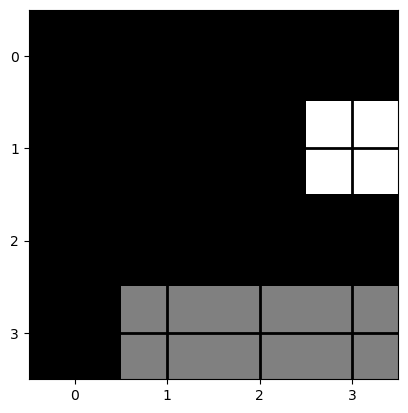

Step= 63
Current state= (1, 3)
Chosen action= 3
Reward= -5
Next state= (1, 2)


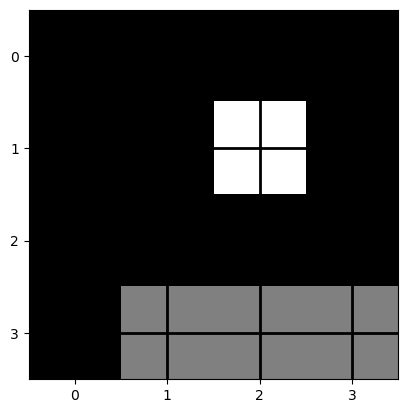

Step= 64
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


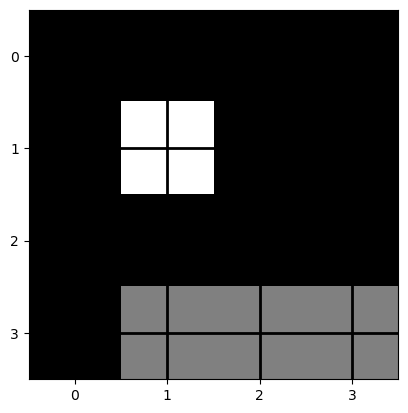

Step= 65
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


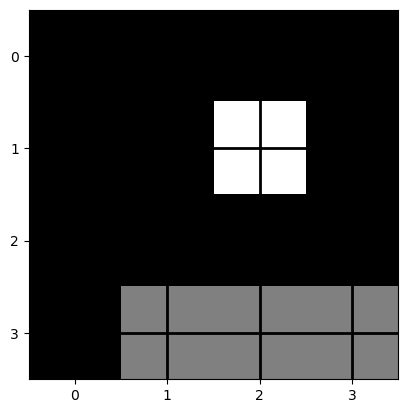

Step= 66
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


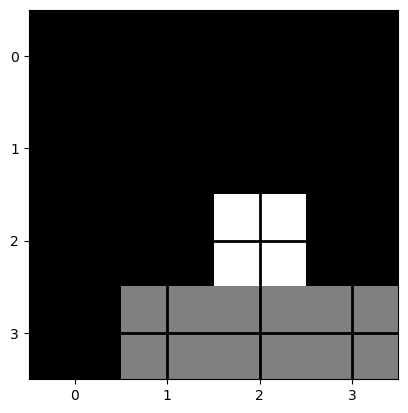

Step= 67
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


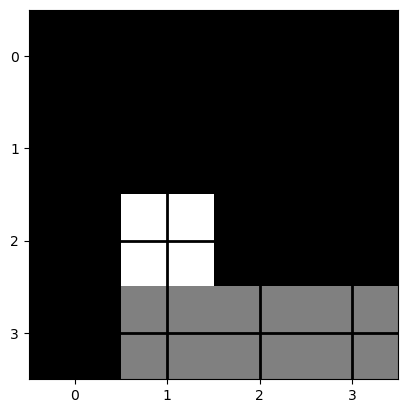

Step= 68
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


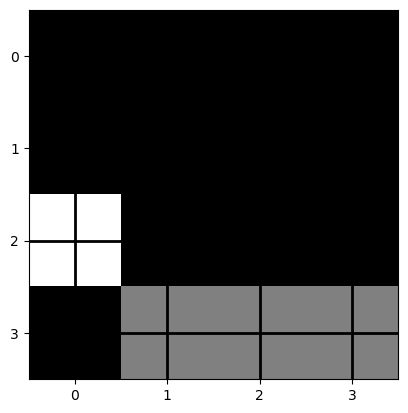

Step= 69
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


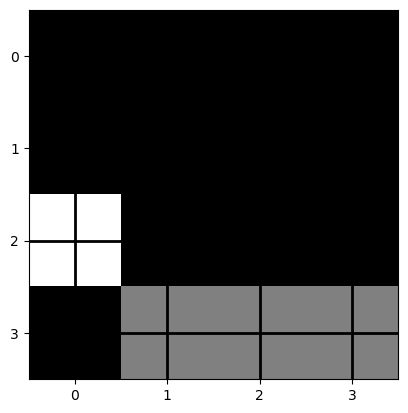

Step= 70
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


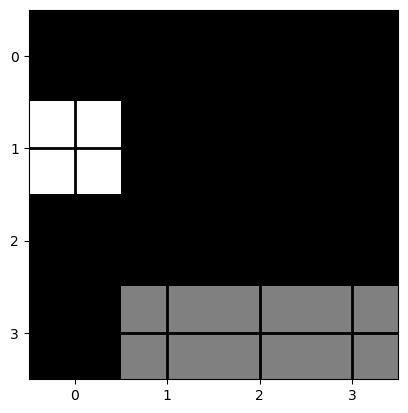

Step= 71
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


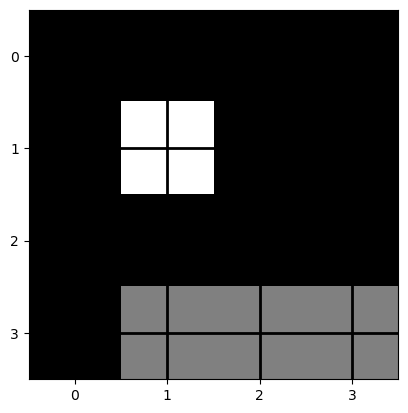

Step= 72
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


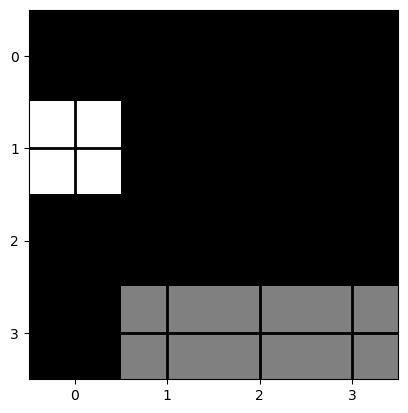

Step= 73
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


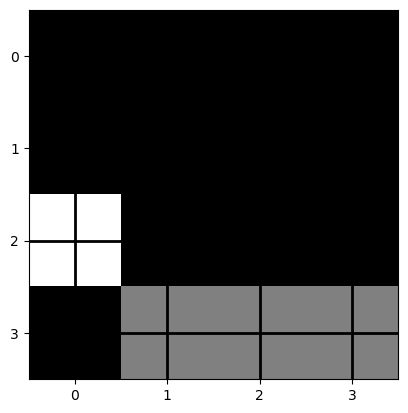

Step= 74
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


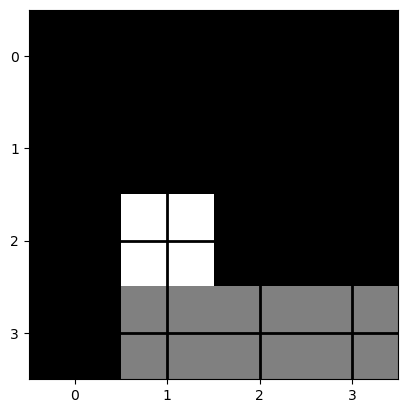

Step= 75
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


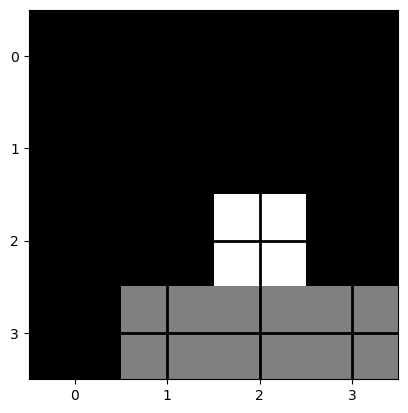

Step= 76
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


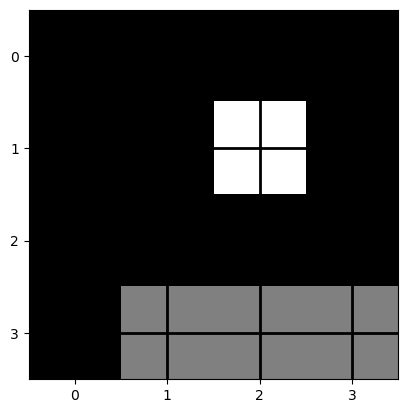

Step= 77
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


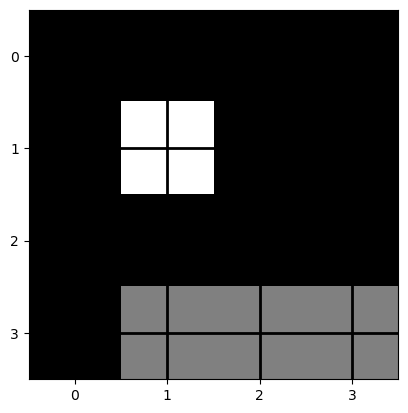

Step= 78
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


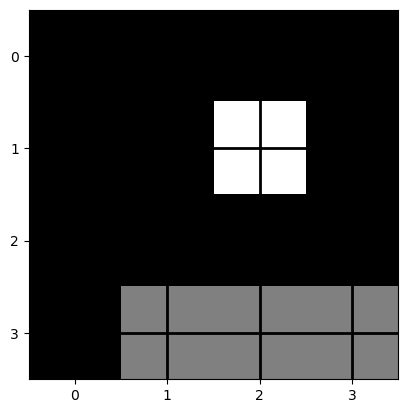

Step= 79
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


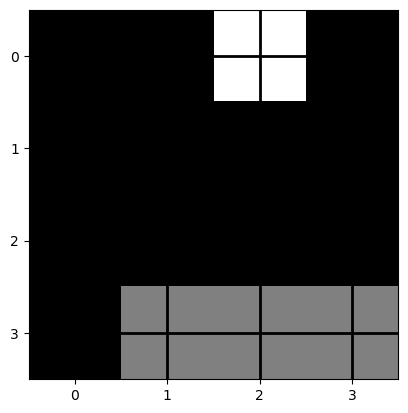

Step= 80
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


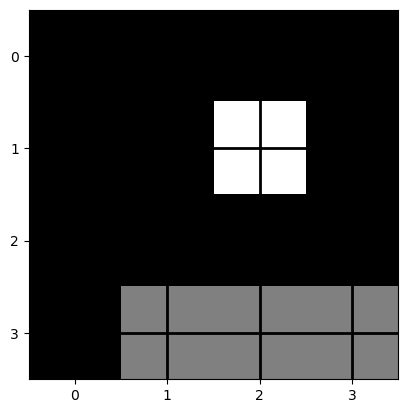

Step= 81
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


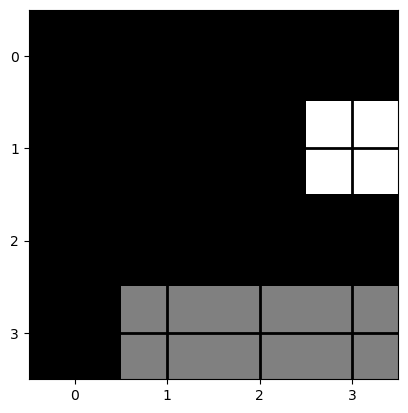

Step= 82
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


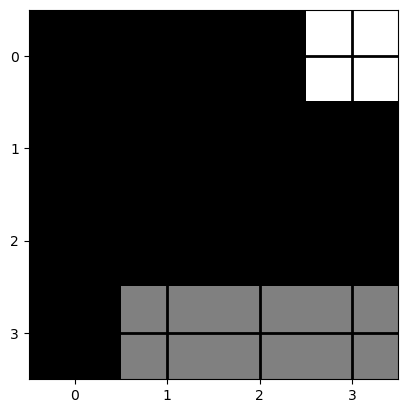

Step= 83
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


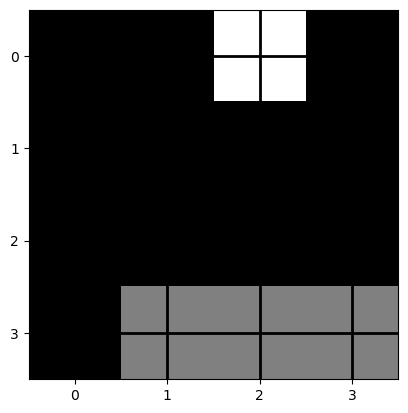

Step= 84
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


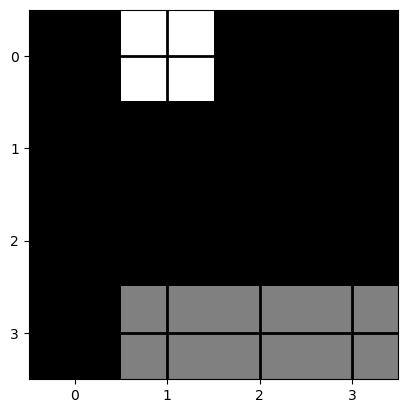

Step= 85
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


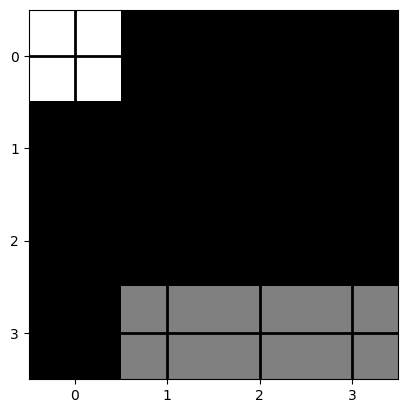

Step= 86
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


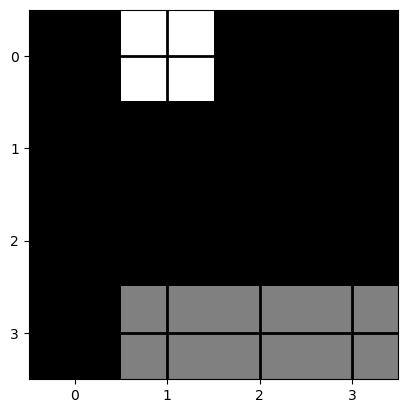

Step= 87
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


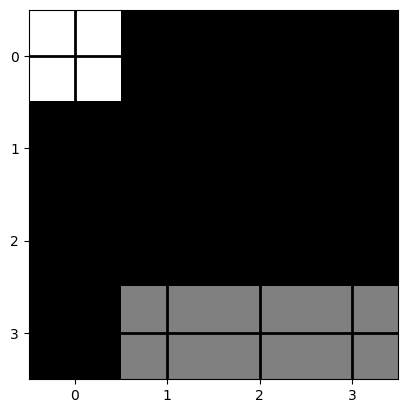

Step= 88
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


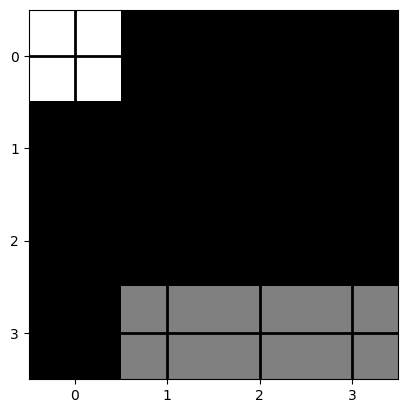

Step= 89
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


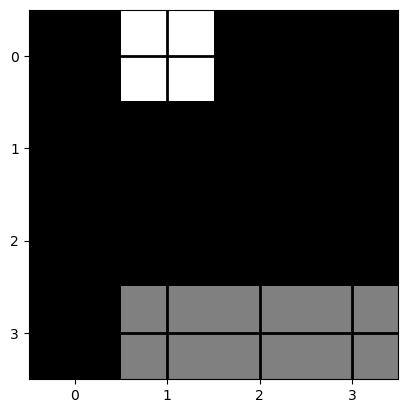

Step= 90
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


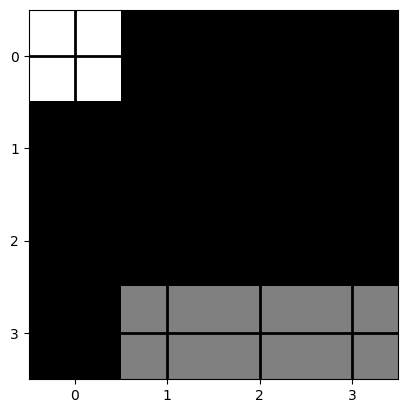

Step= 91
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


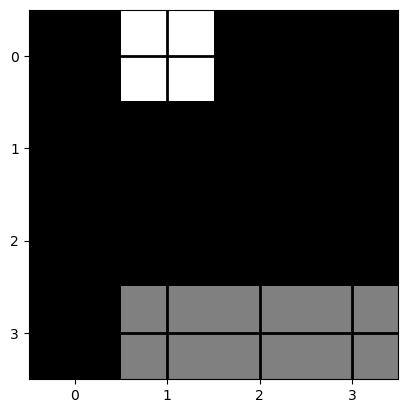

Step= 92
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


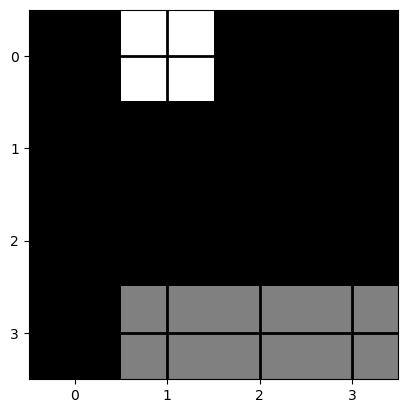

Step= 93
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


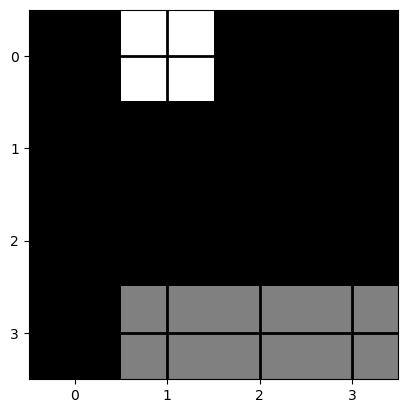

Step= 94
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


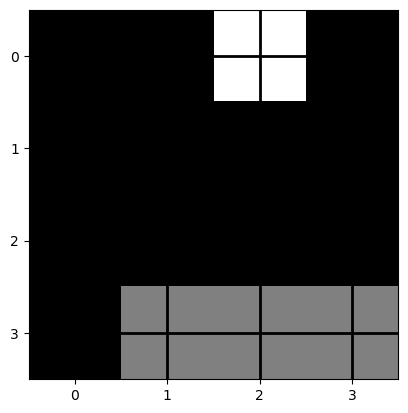

Step= 95
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


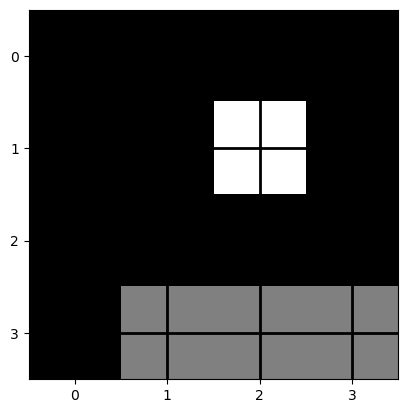

Step= 96
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


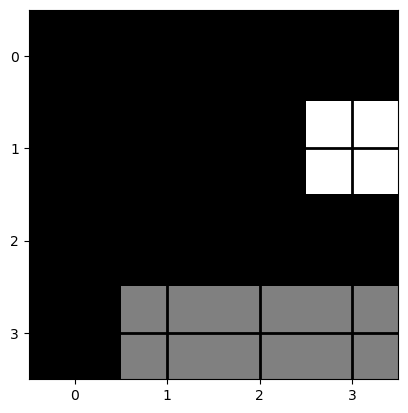

Step= 97
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


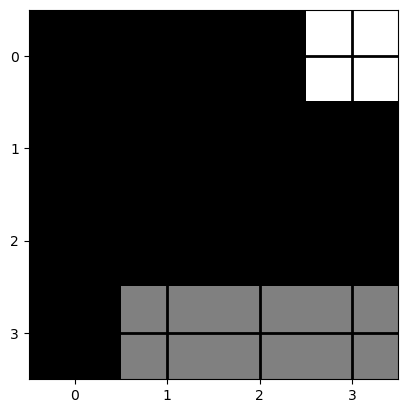

Step= 98
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


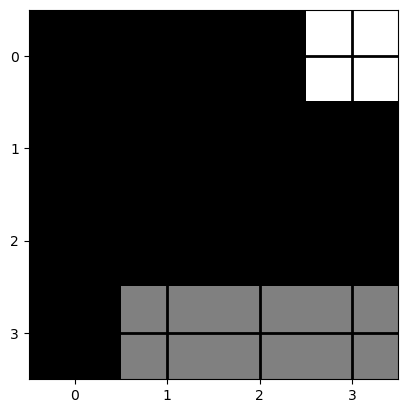

Step= 99
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


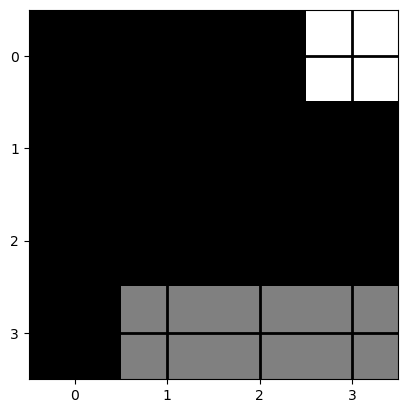

Step= 100
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


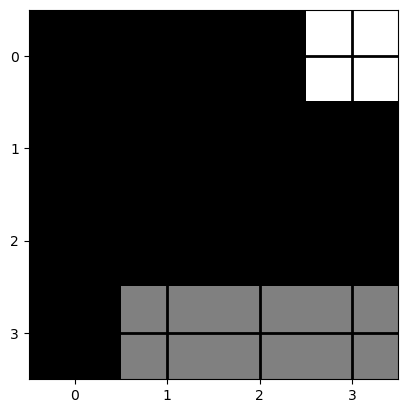

Step= 101
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


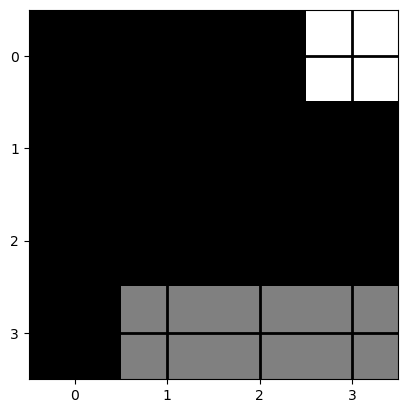

Step= 102
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


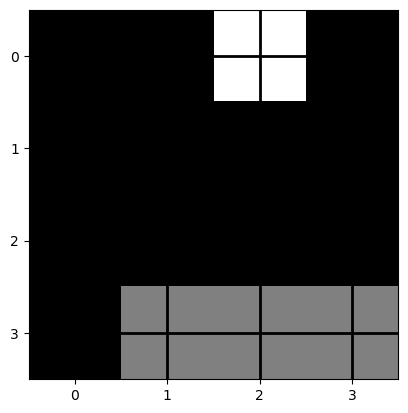

Step= 103
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


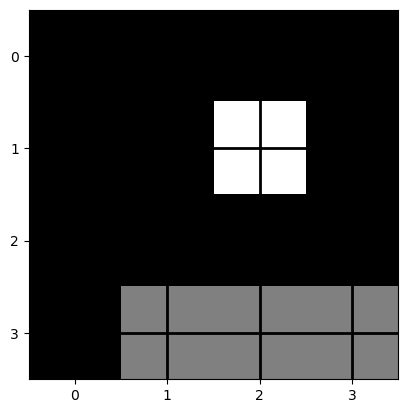

Step= 104
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


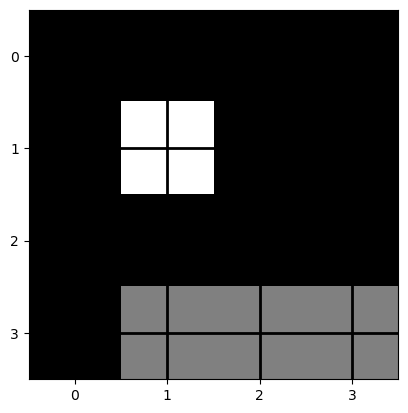

Step= 105
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


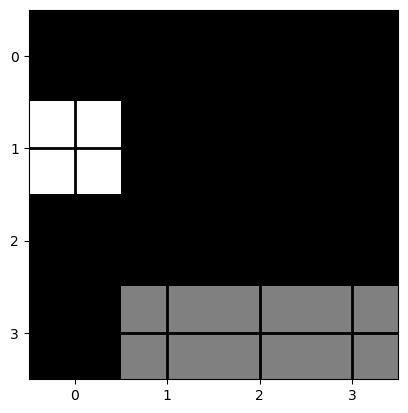

Step= 106
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


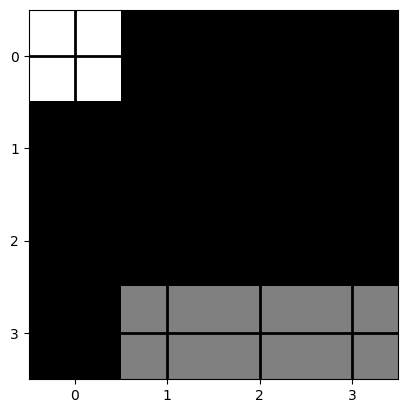

Step= 107
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


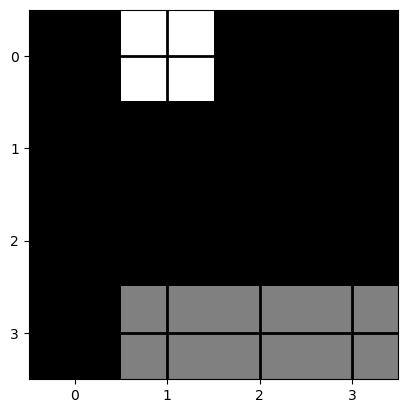

Step= 108
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


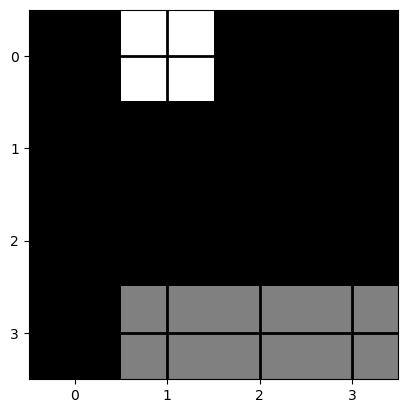

Step= 109
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


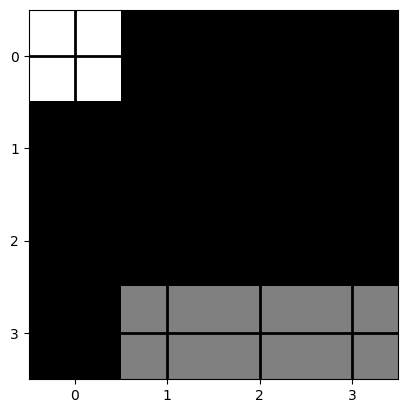

Step= 110
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


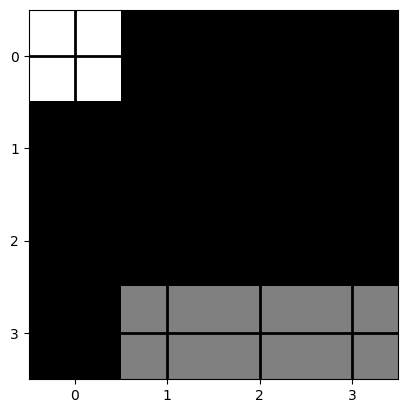

Step= 111
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


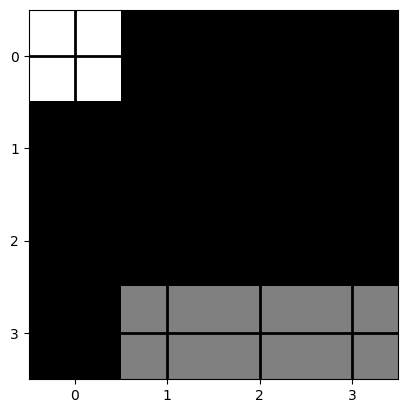

Step= 112
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


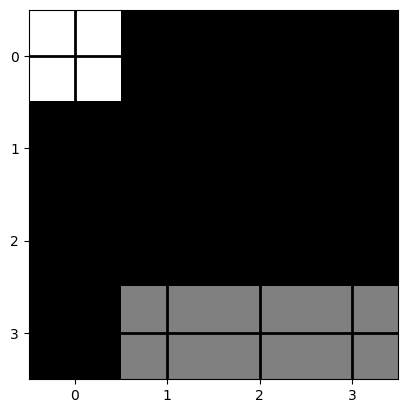

Step= 113
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


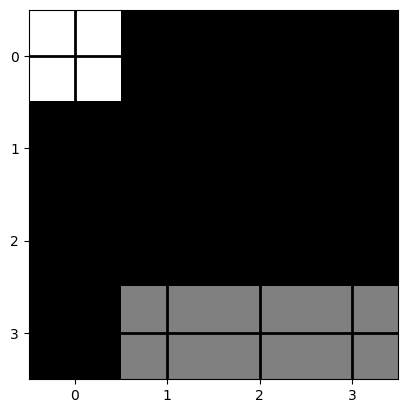

Step= 114
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


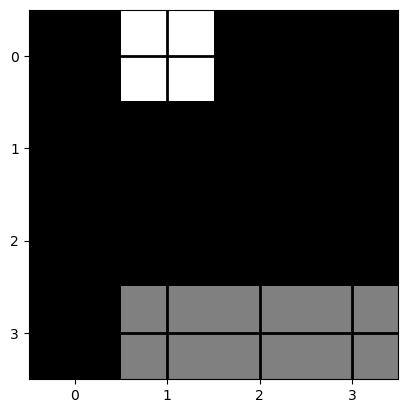

Step= 115
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


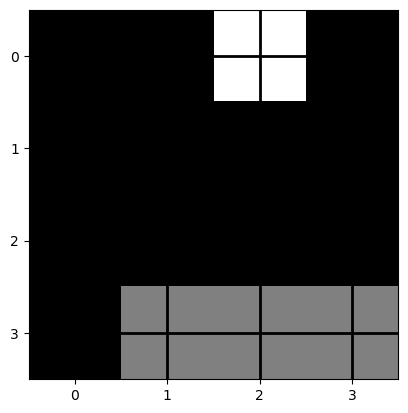

Step= 116
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


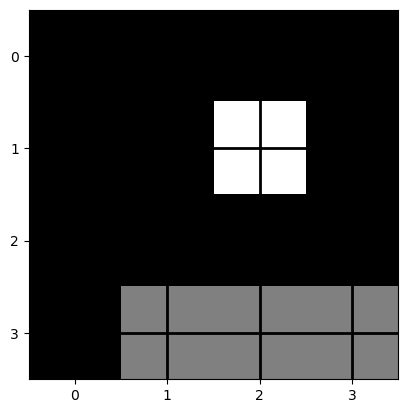

Step= 117
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


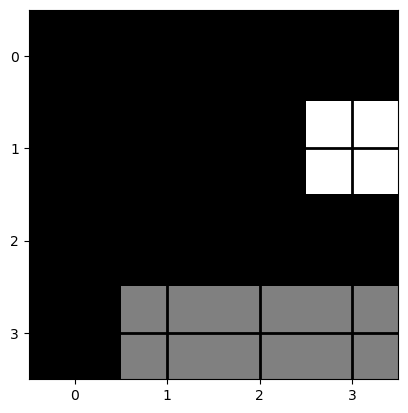

Step= 118
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


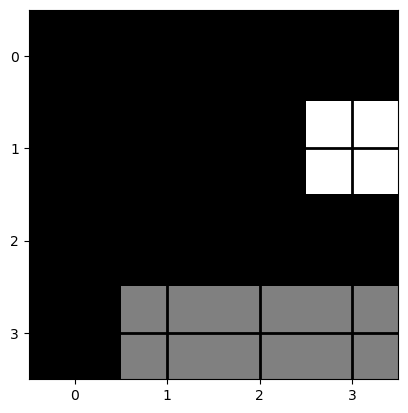

Step= 119
Current state= (1, 3)
Chosen action= 3
Reward= -5
Next state= (1, 2)


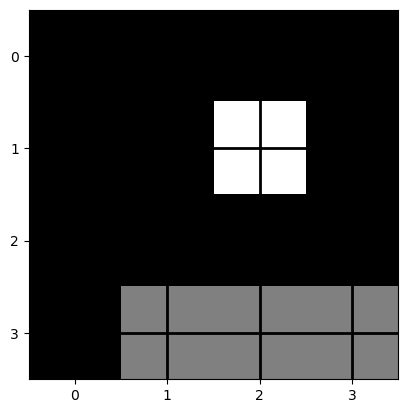

Step= 120
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


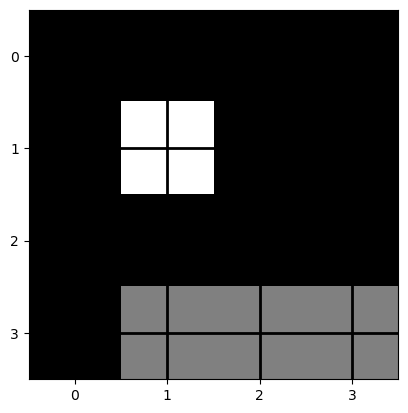

Step= 121
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


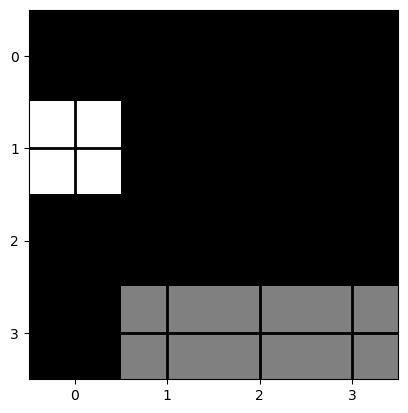

Step= 122
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


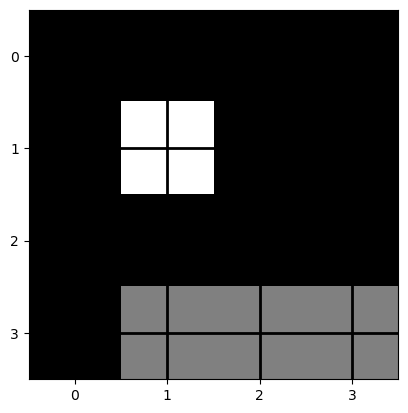

Step= 123
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


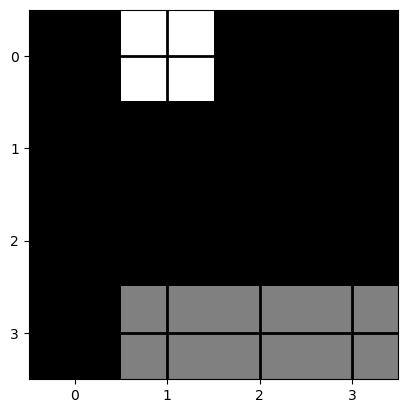

Step= 124
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


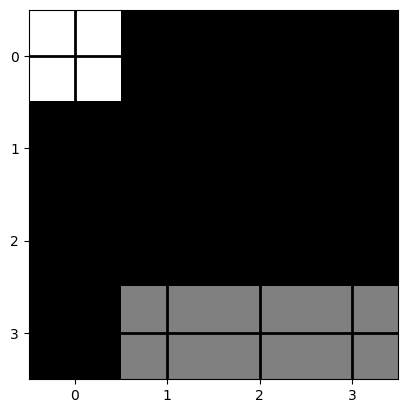

Step= 125
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


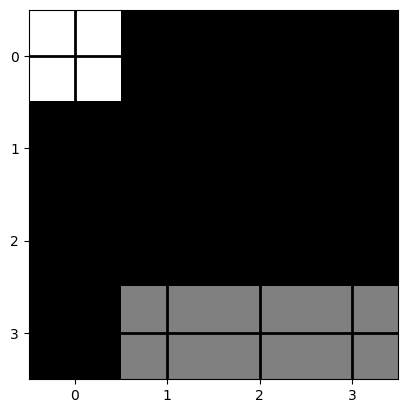

Step= 126
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


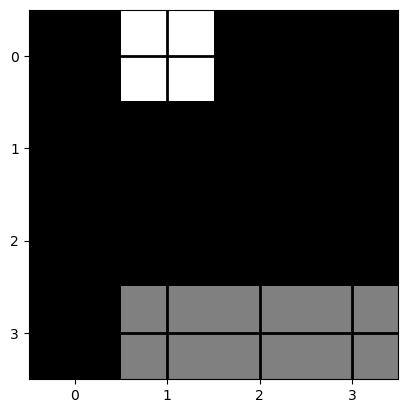

Step= 127
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


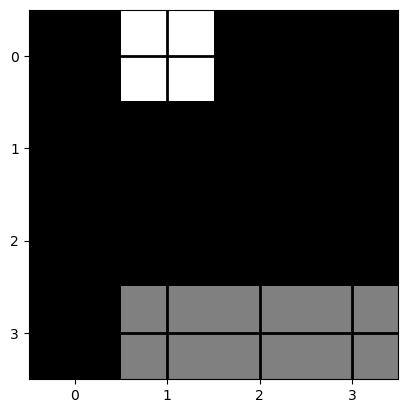

Step= 128
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


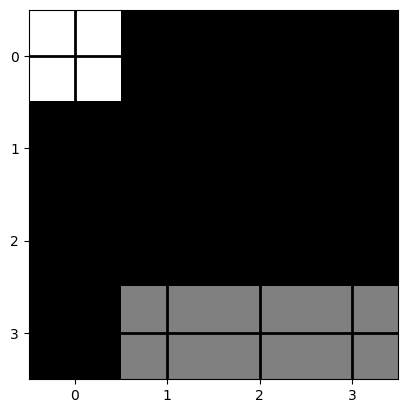

Step= 129
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


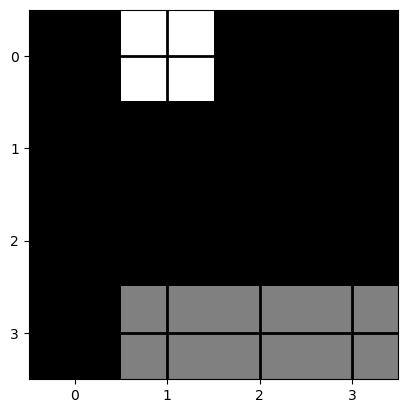

Step= 130
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


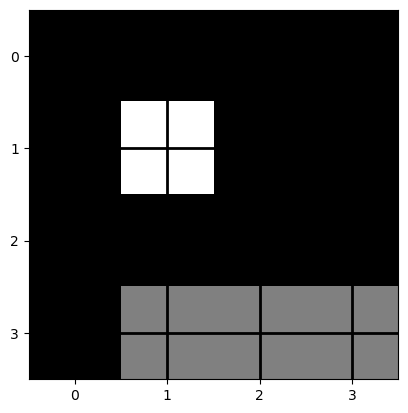

Step= 131
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


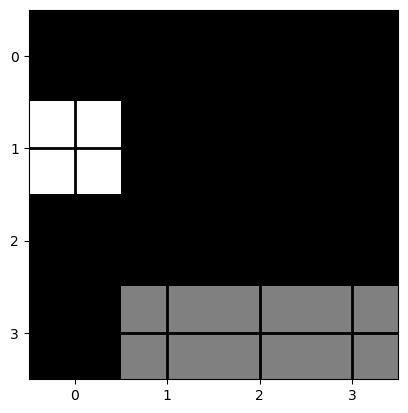

Step= 132
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


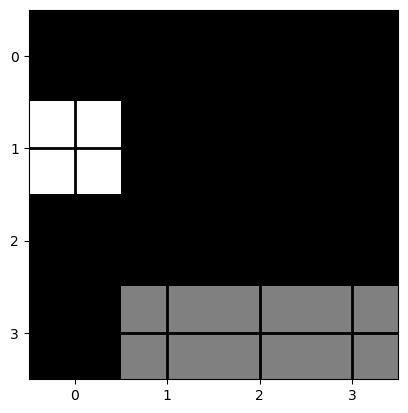

Step= 133
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


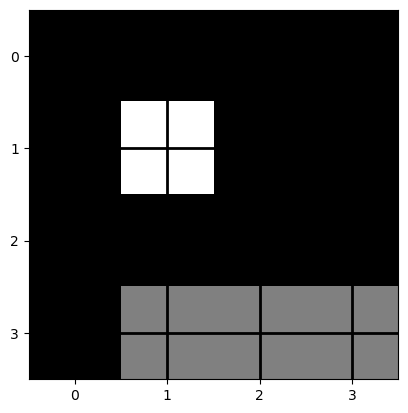

Step= 134
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


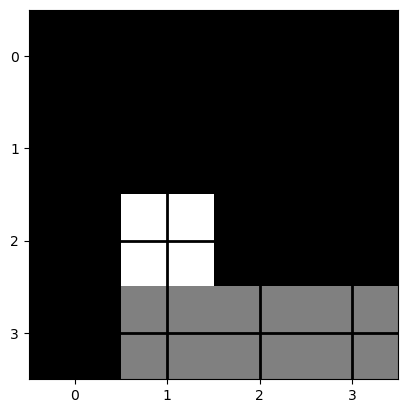

Step= 135
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


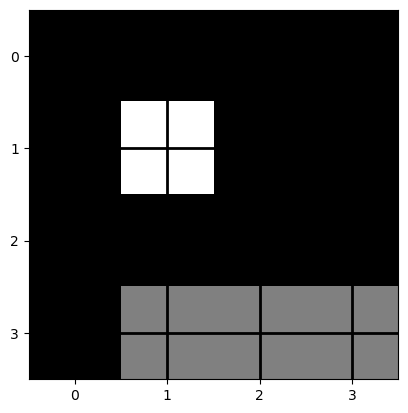

Step= 136
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


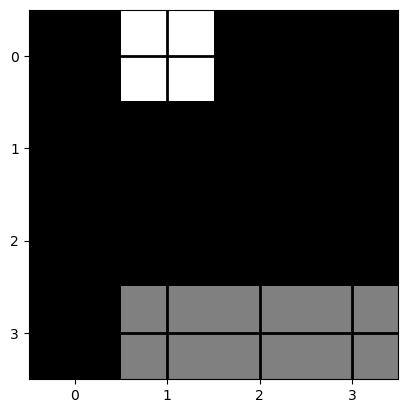

Step= 137
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


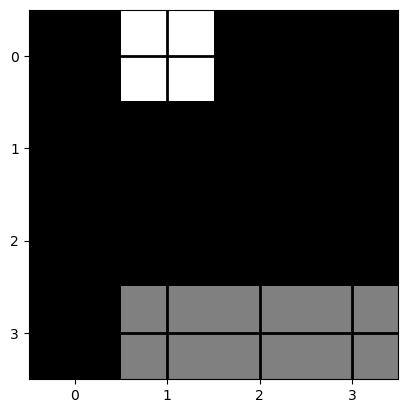

Step= 138
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


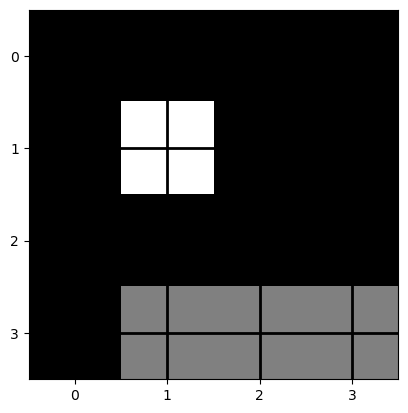

Step= 139
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


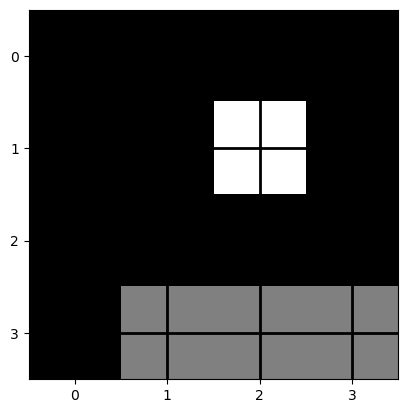

Step= 140
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


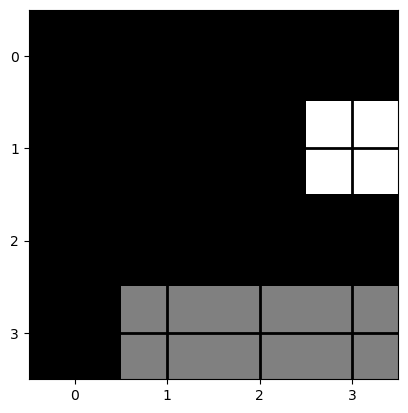

Step= 141
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


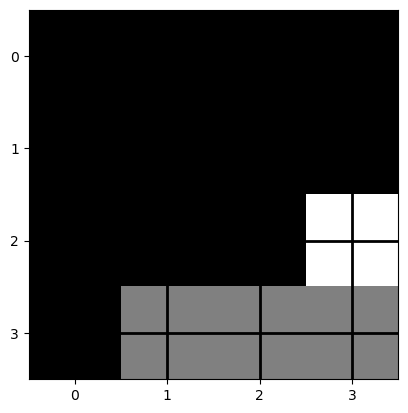

Step= 142
Current state= (2, 3)
Chosen action= 2
Reward= -5
Next state= (2, 3)


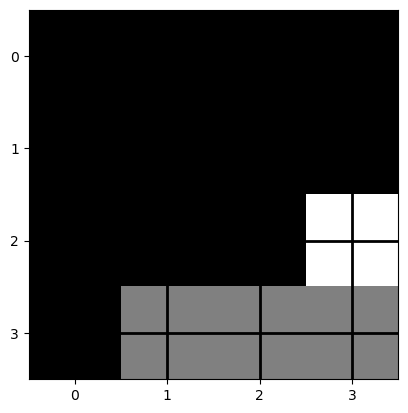

Step= 143
Current state= (2, 3)
Chosen action= 0
Reward= -5
Next state= (1, 3)


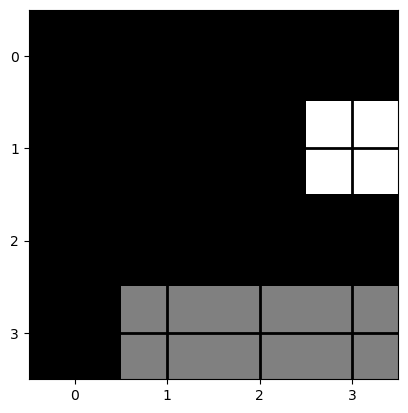

Step= 144
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


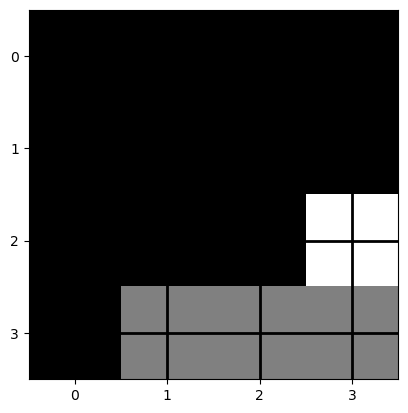

Step= 145
Current state= (2, 3)
Chosen action= 1
Reward= 0
Next state= (3, 3)


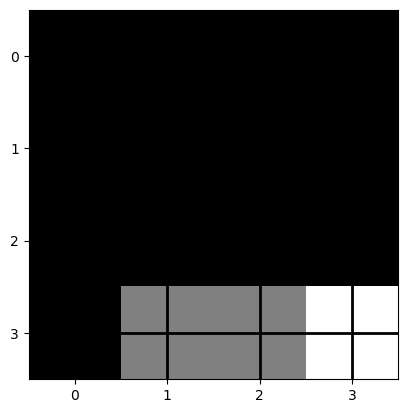

Episode ended in 145 timesteps
This episode's reward is = -720
Step= 2
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


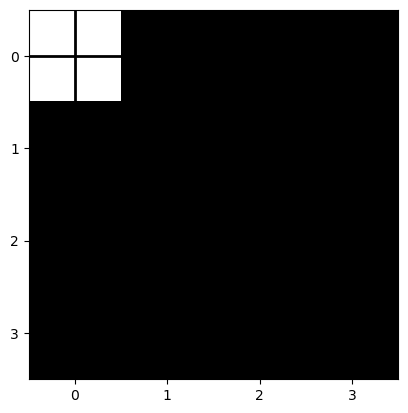

Step= 3
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


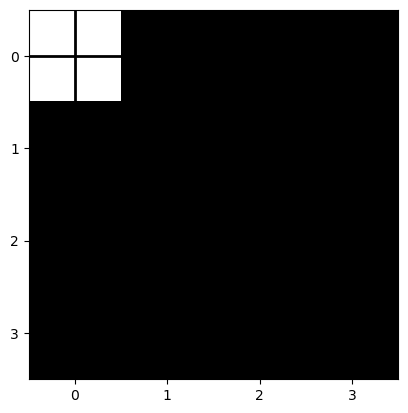

Step= 4
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


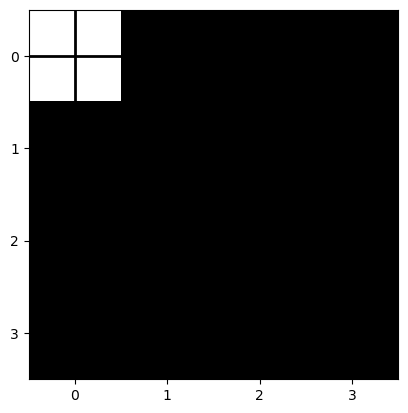

Step= 5
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


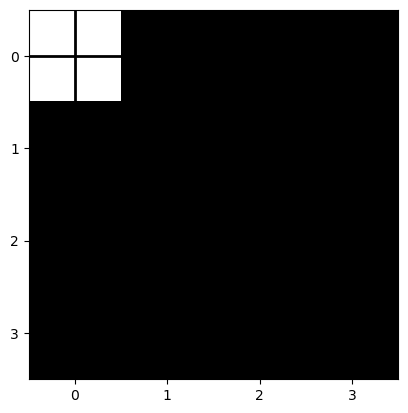

Step= 6
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


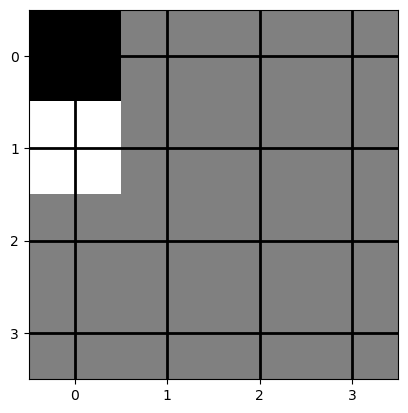

Step= 7
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


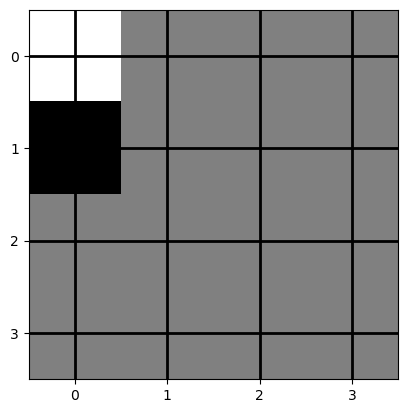

Step= 8
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


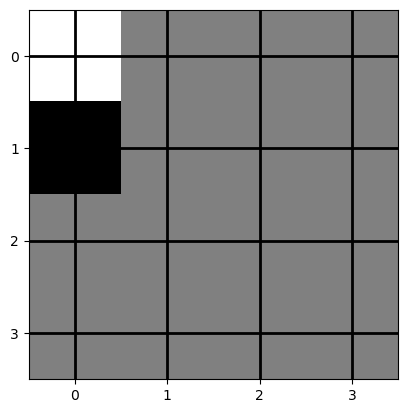

Step= 9
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


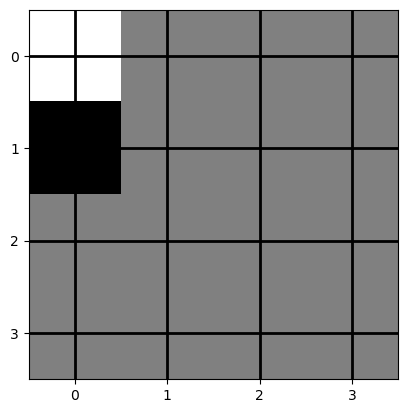

Step= 10
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


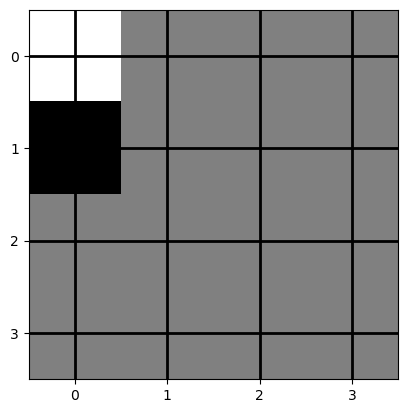

Step= 11
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


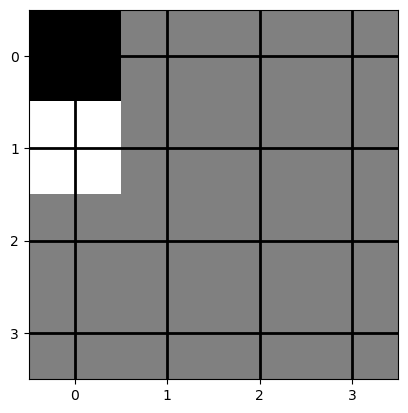

Step= 12
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


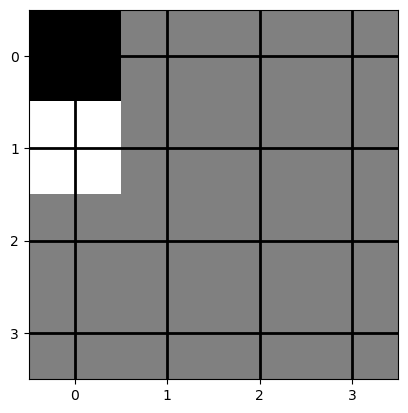

Step= 13
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


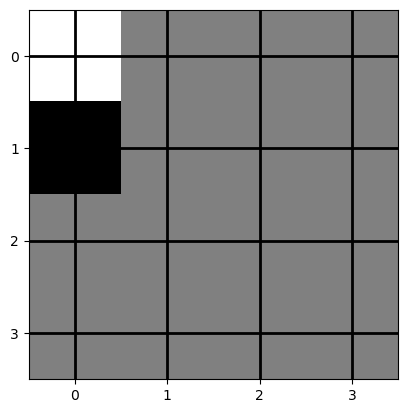

Step= 14
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


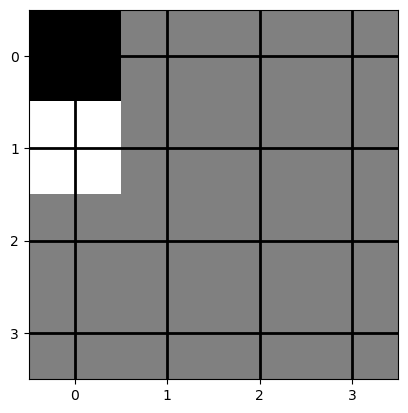

Step= 15
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


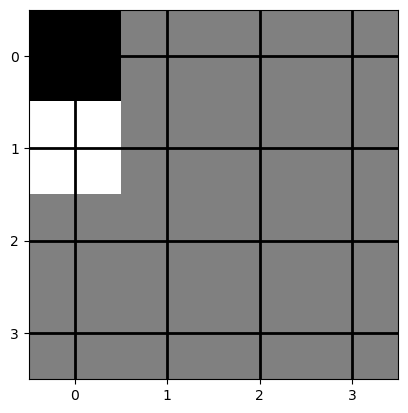

Step= 16
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


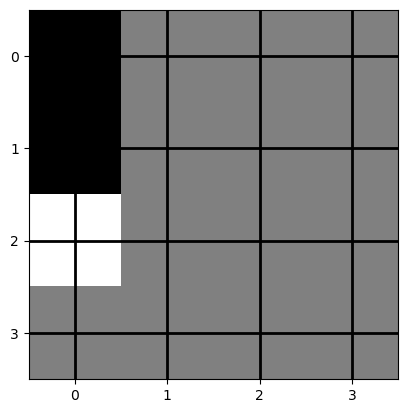

Step= 17
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


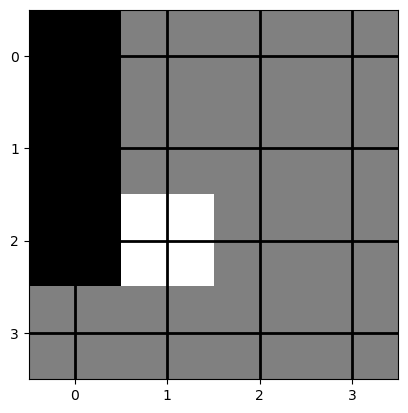

Step= 18
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


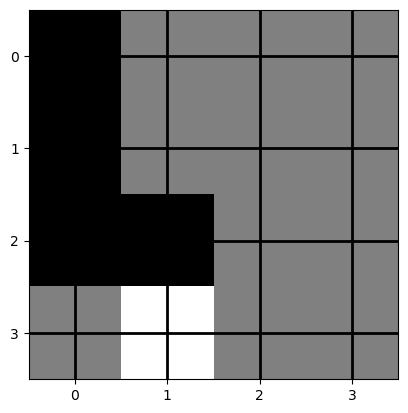

Step= 19
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


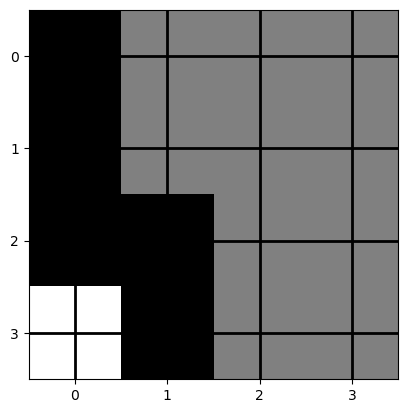

Step= 20
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


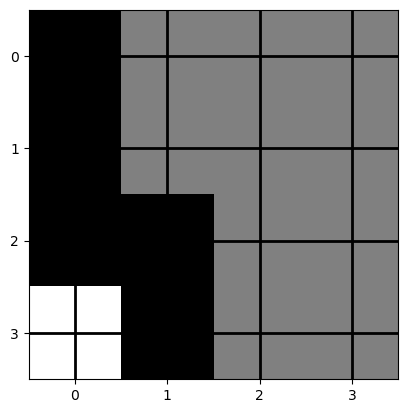

Step= 21
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


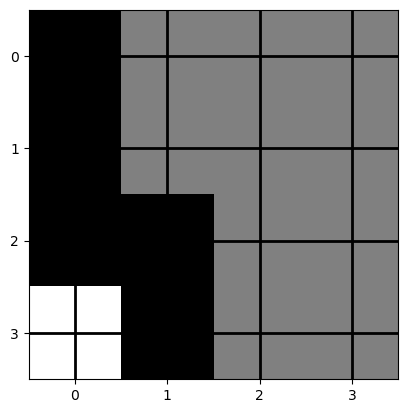

Step= 22
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


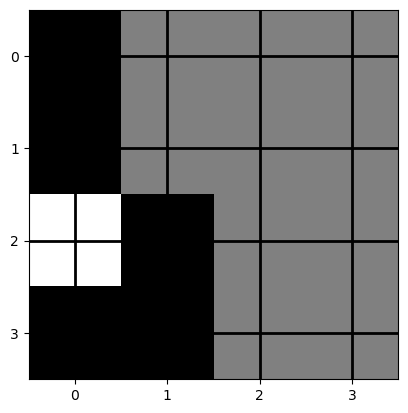

Step= 23
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


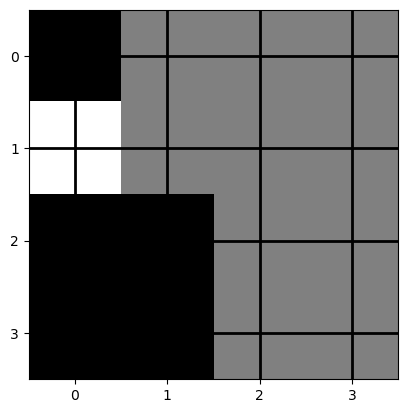

Step= 24
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


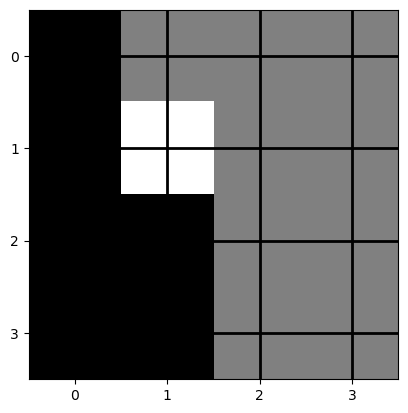

Step= 25
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


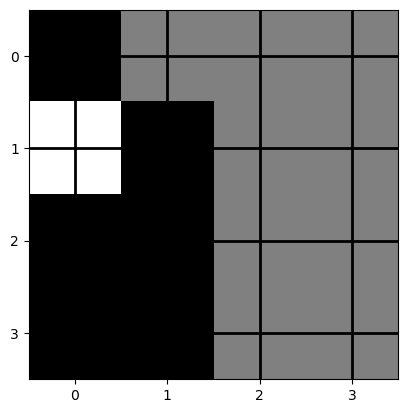

Step= 26
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


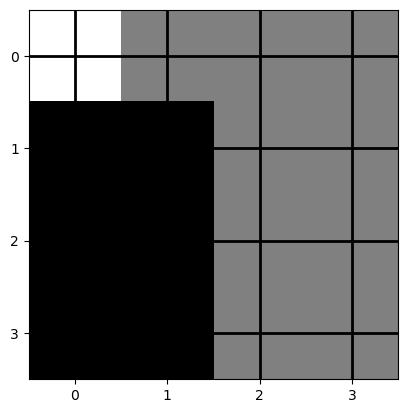

Step= 27
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


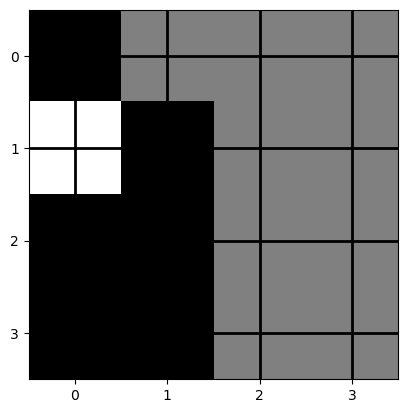

Step= 28
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


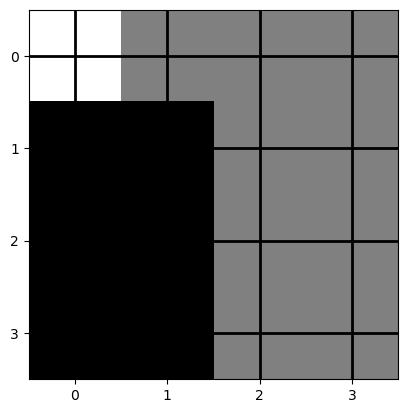

Step= 29
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


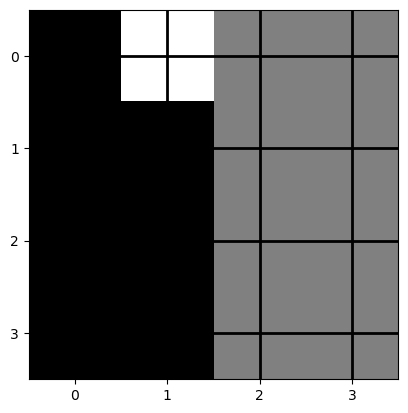

Step= 30
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


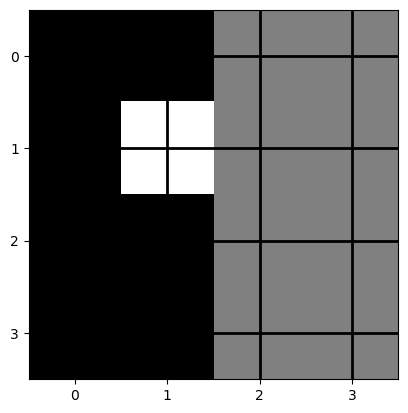

Step= 31
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


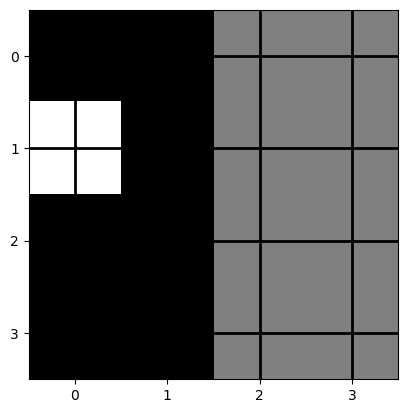

Step= 32
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


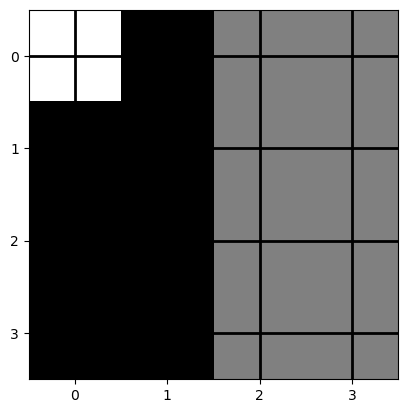

Step= 33
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


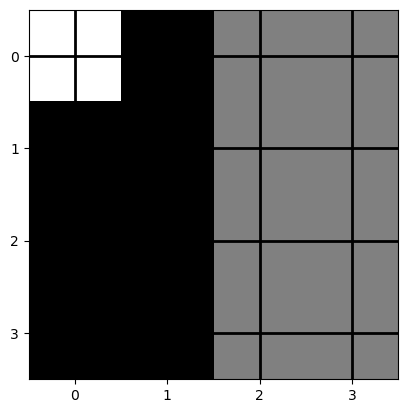

Step= 34
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


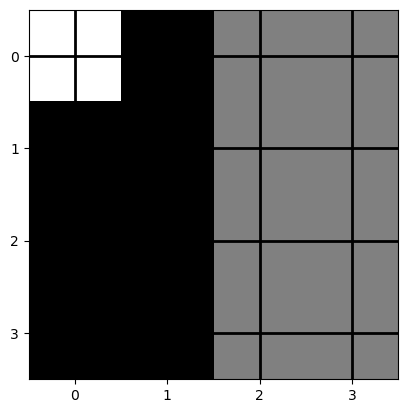

Step= 35
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


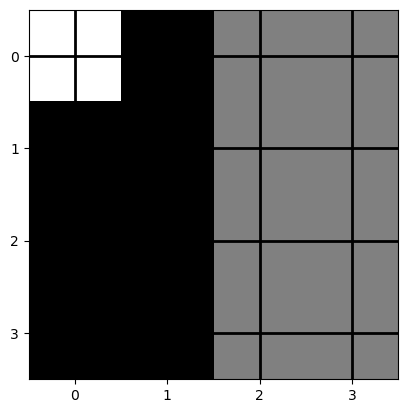

Step= 36
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


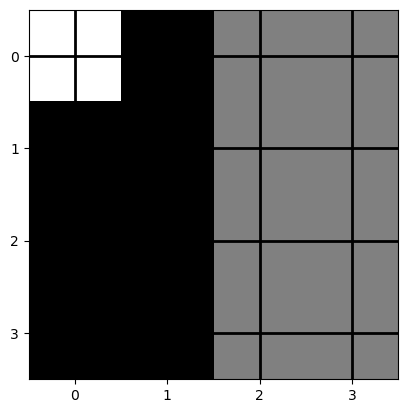

Step= 37
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


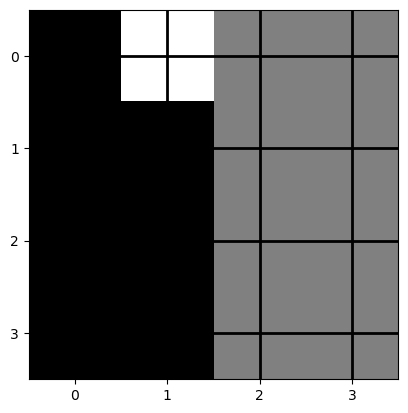

Step= 38
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


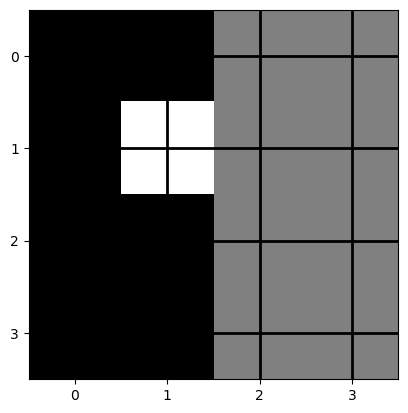

Step= 39
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


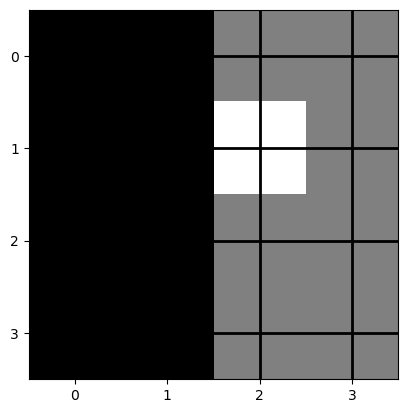

Step= 40
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


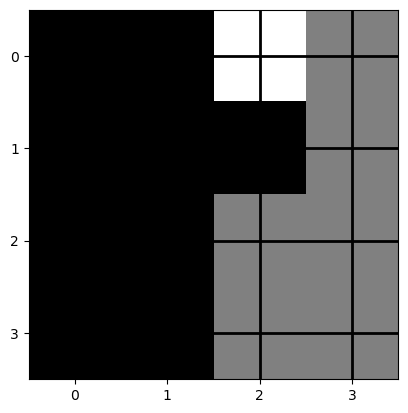

Step= 41
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


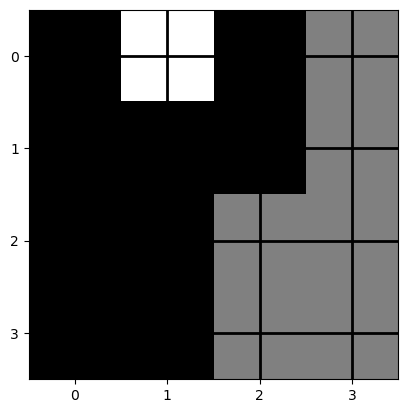

Step= 42
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


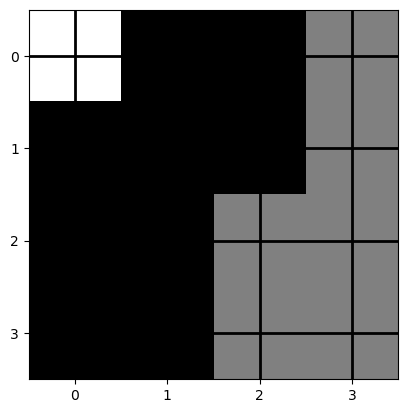

Step= 43
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


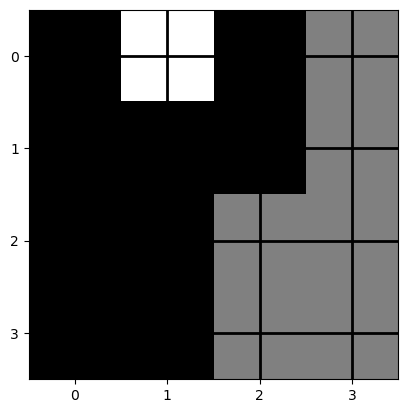

Step= 44
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


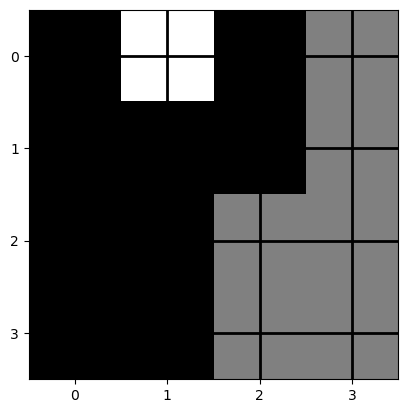

Step= 45
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


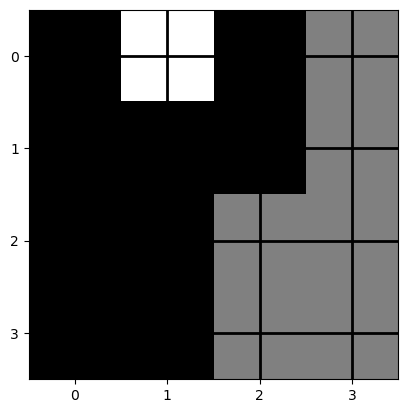

Step= 46
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


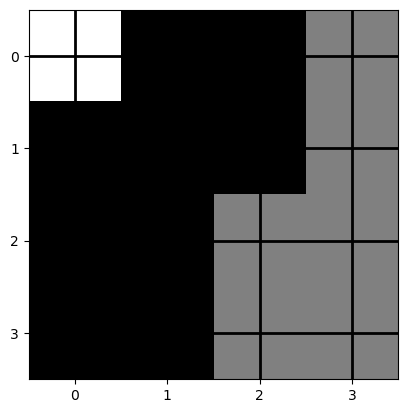

Step= 47
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


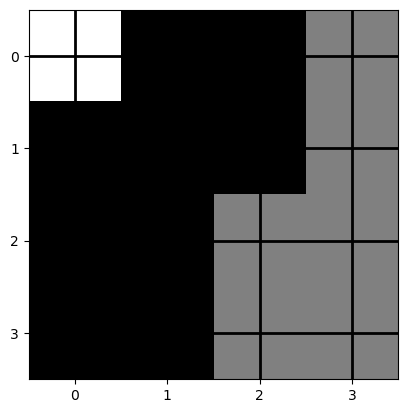

Step= 48
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


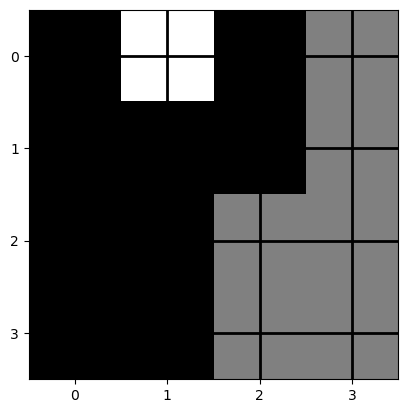

Step= 49
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


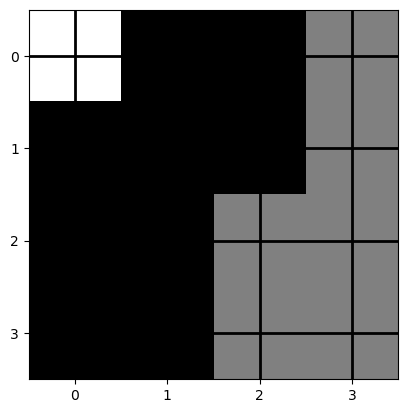

Step= 50
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


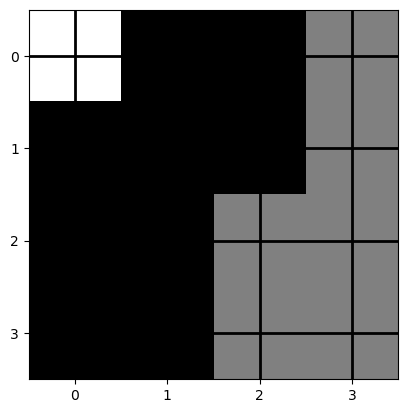

Step= 51
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


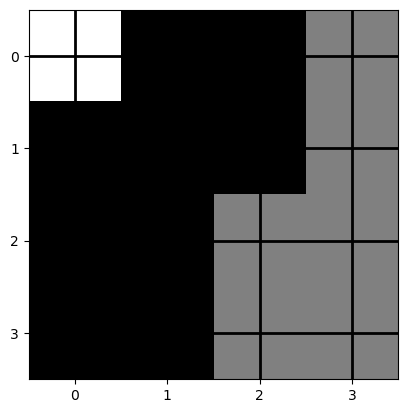

Step= 52
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


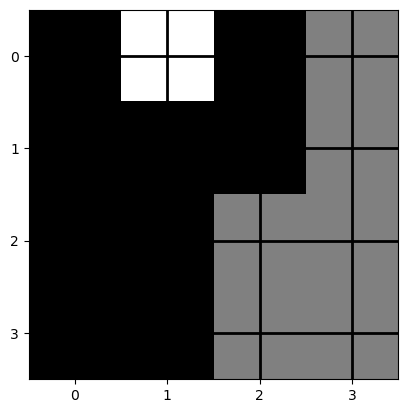

Step= 53
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


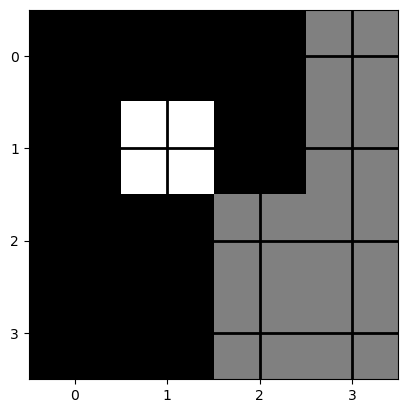

Step= 54
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


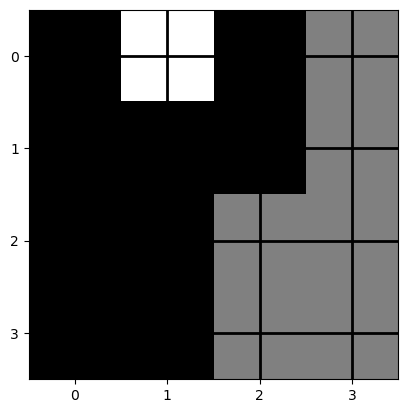

Step= 55
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


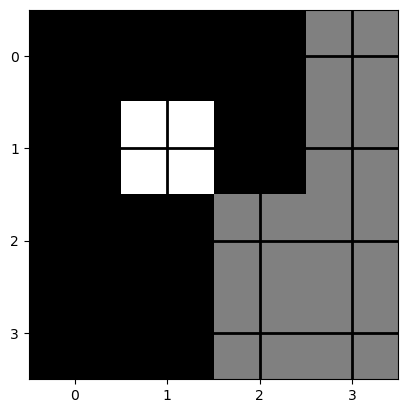

Step= 56
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


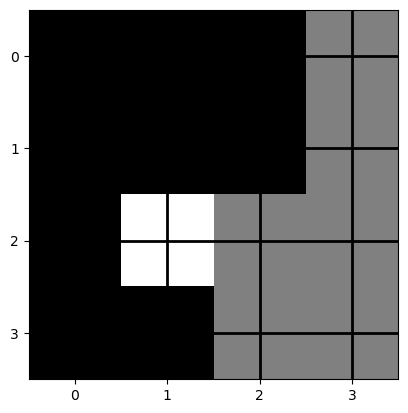

Step= 57
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


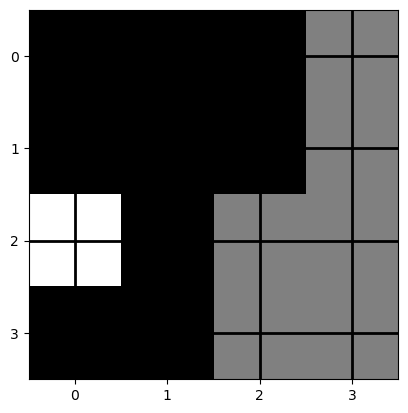

Step= 58
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


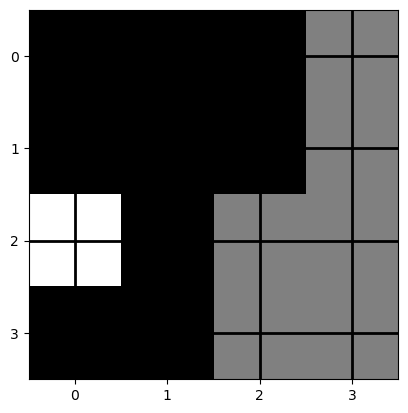

Step= 59
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


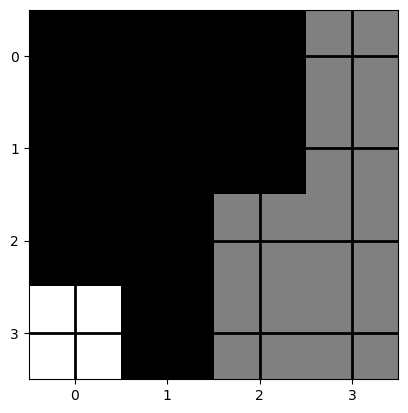

Step= 60
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


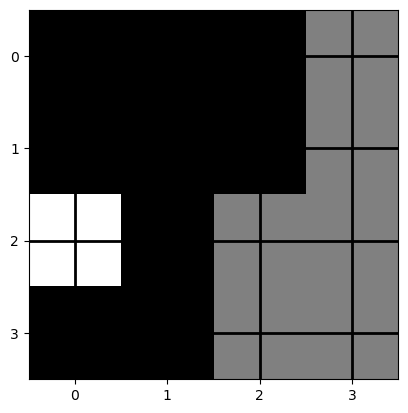

Step= 61
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


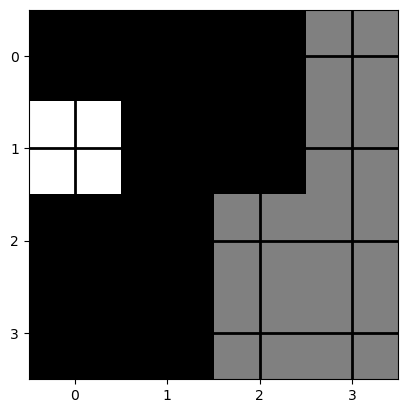

Step= 62
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


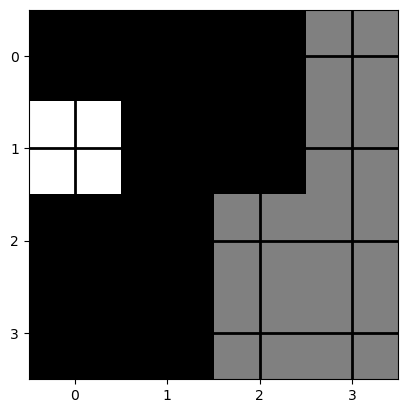

Step= 63
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


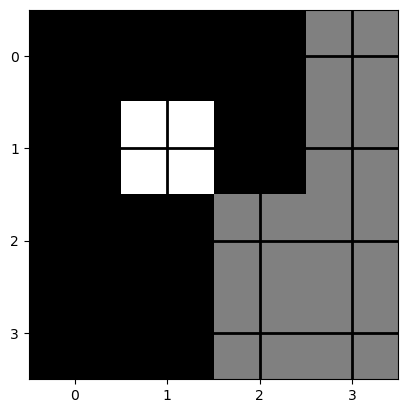

Step= 64
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


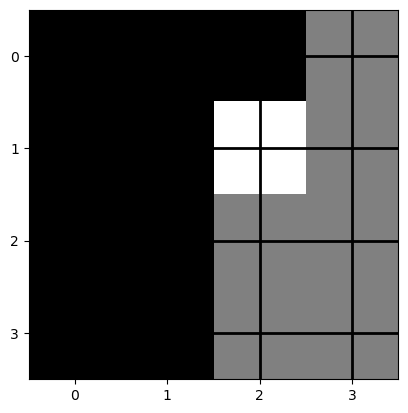

Step= 65
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


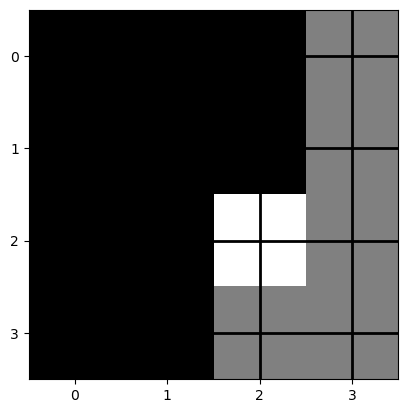

Step= 66
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


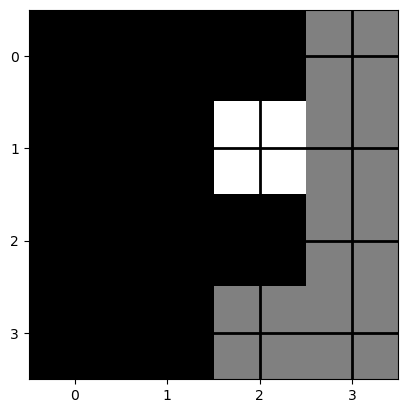

Step= 67
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


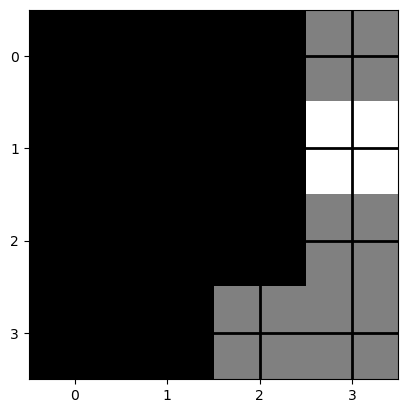

Step= 68
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


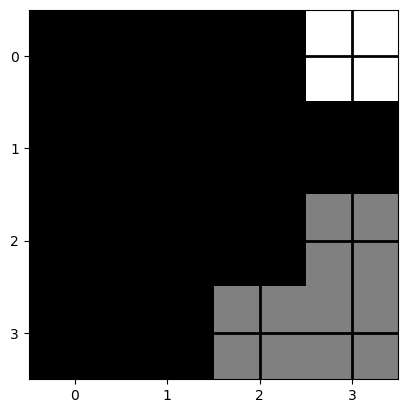

Step= 69
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


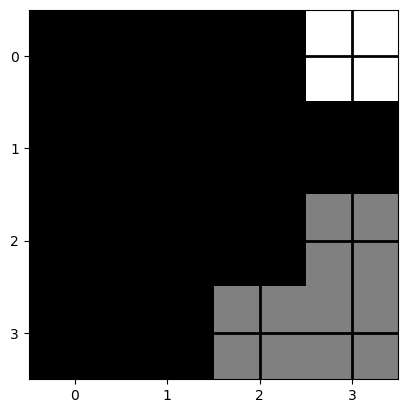

Step= 70
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


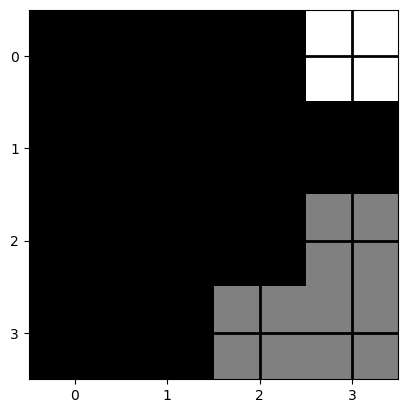

Step= 71
Current state= (0, 3)
Chosen action= 1
Reward= -5
Next state= (1, 3)


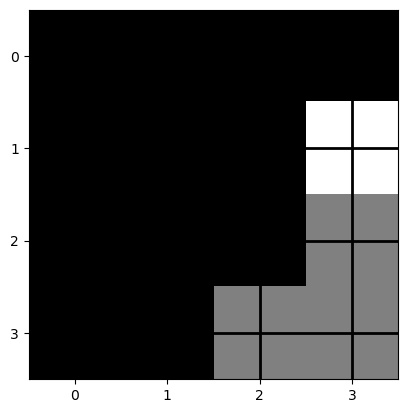

Step= 72
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


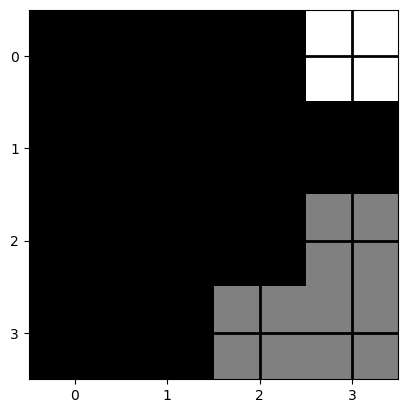

Step= 73
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


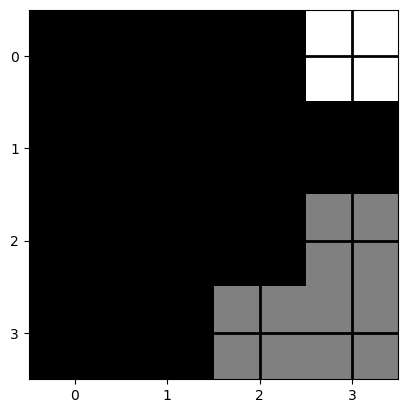

Step= 74
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


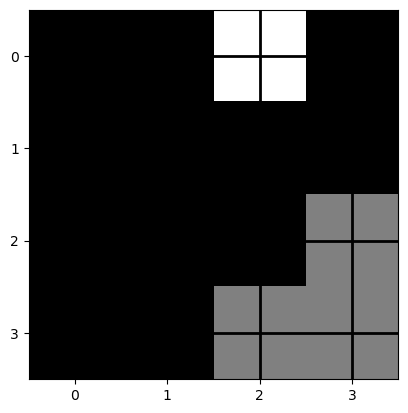

Step= 75
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


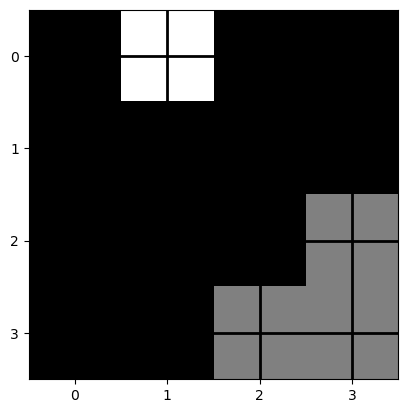

Step= 76
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


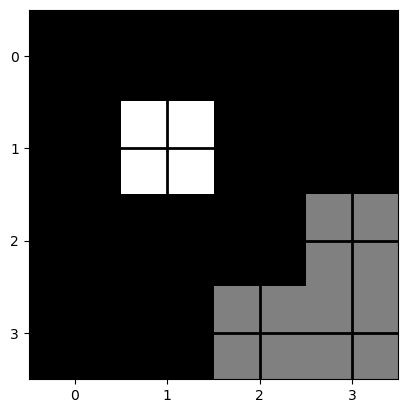

Step= 77
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


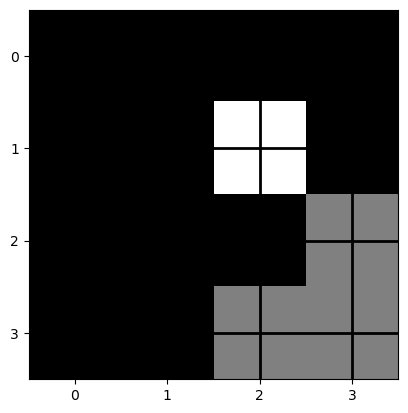

Step= 78
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


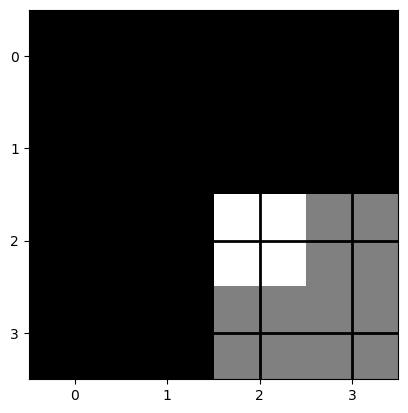

Step= 79
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


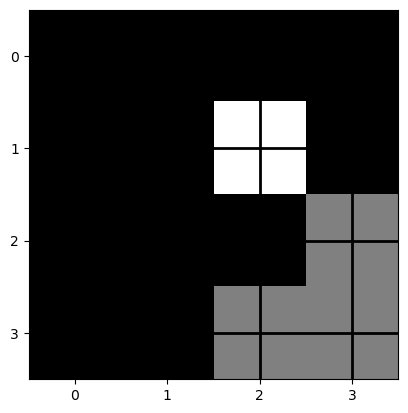

Step= 80
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


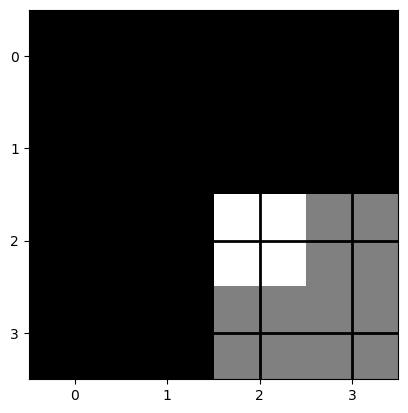

Step= 81
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


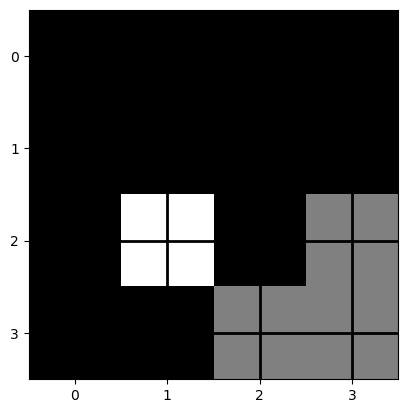

Step= 82
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


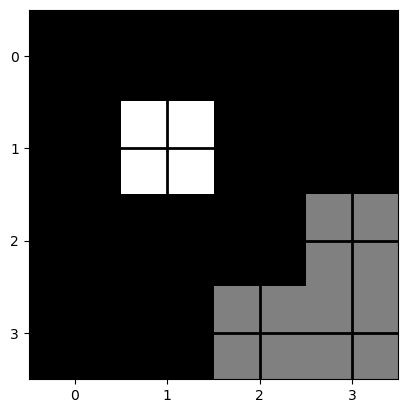

Step= 83
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


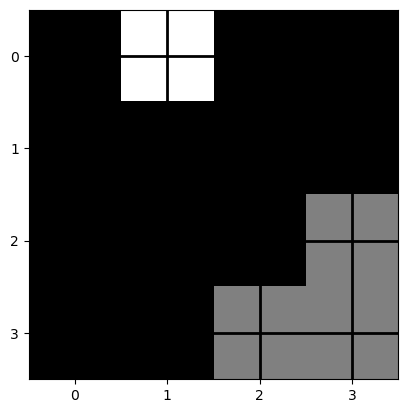

Step= 84
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


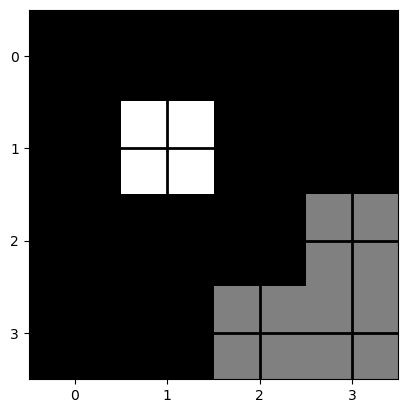

Step= 85
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


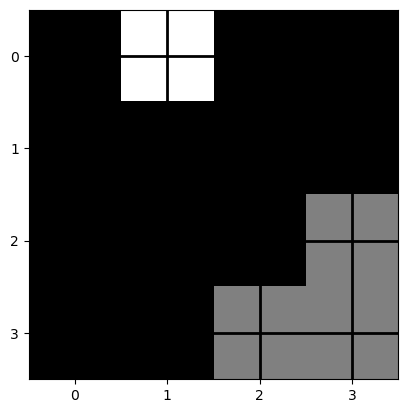

Step= 86
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


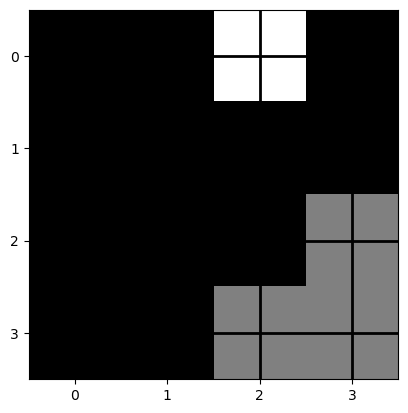

Step= 87
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


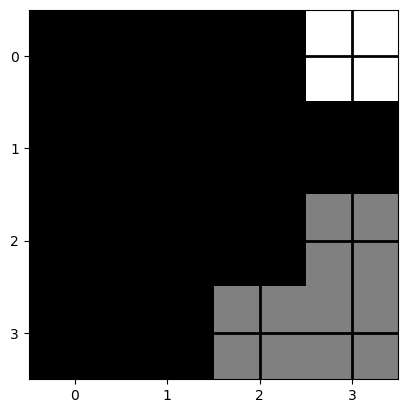

Step= 88
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


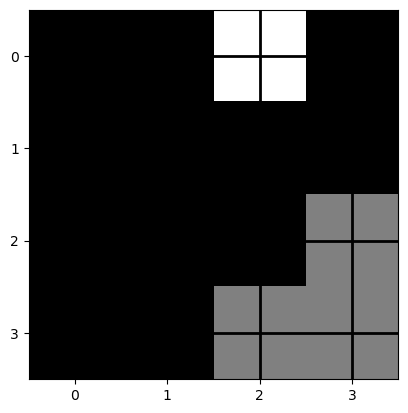

Step= 89
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


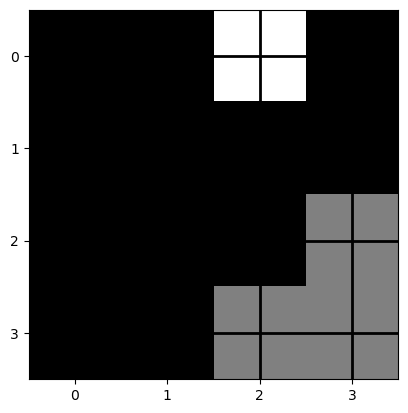

Step= 90
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


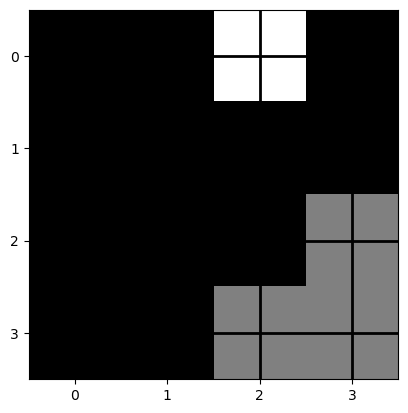

Step= 91
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


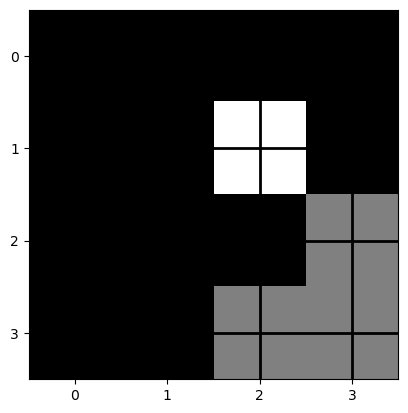

Step= 92
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


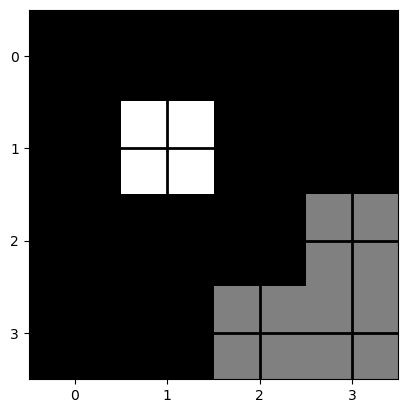

Step= 93
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


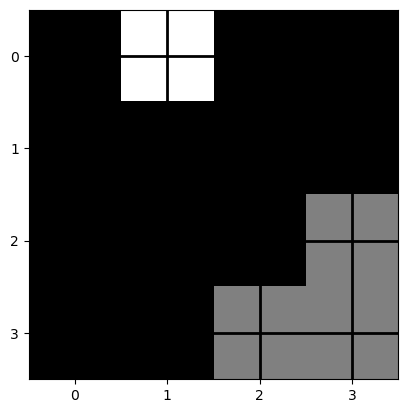

Step= 94
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


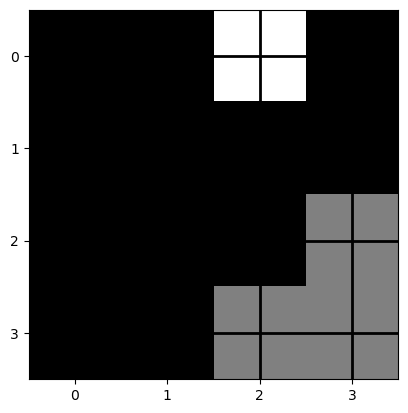

Step= 95
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


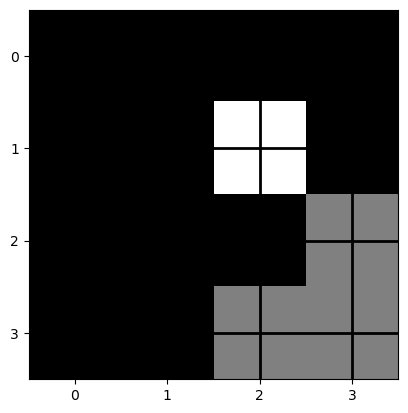

Step= 96
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


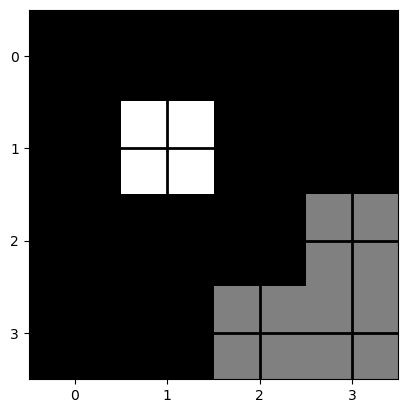

Step= 97
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


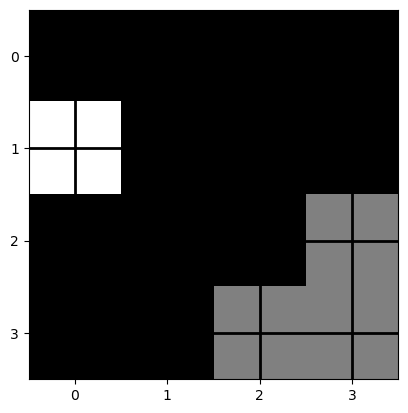

Step= 98
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


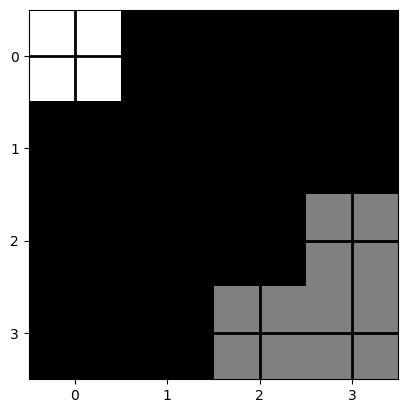

Step= 99
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


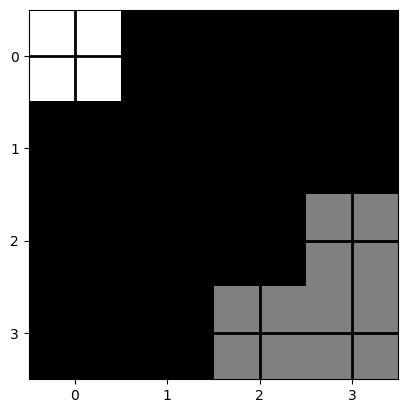

Step= 100
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


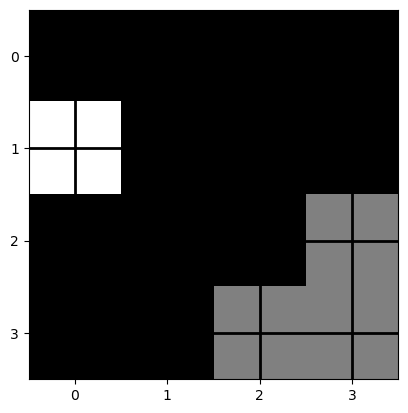

Step= 101
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


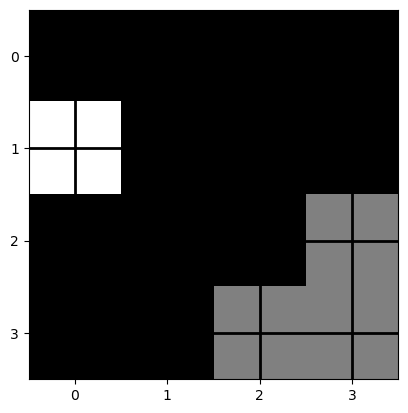

Step= 102
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


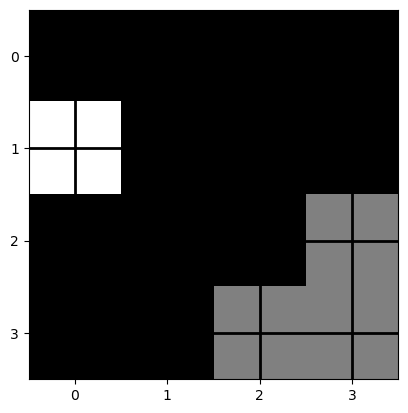

Step= 103
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


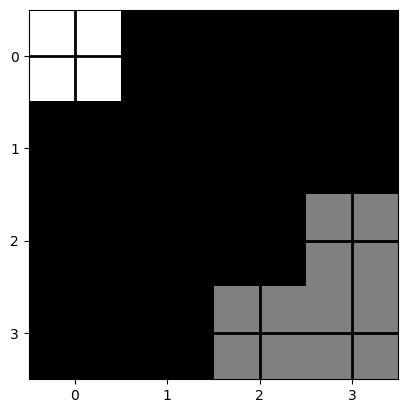

Step= 104
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


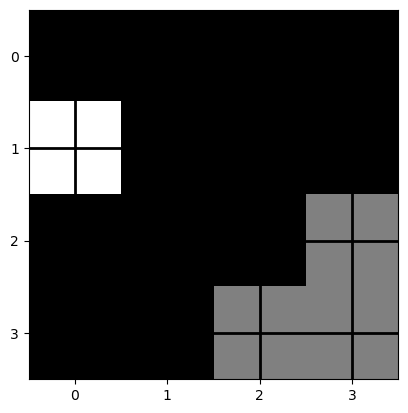

Step= 105
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


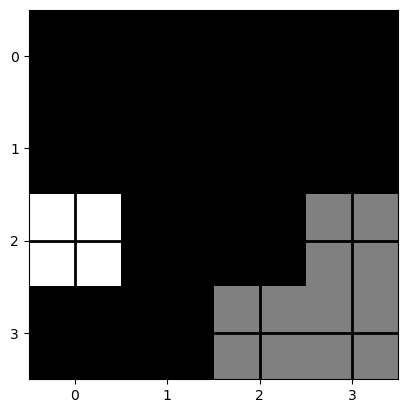

Step= 106
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


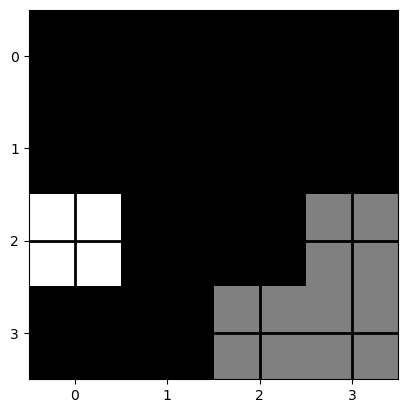

Step= 107
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


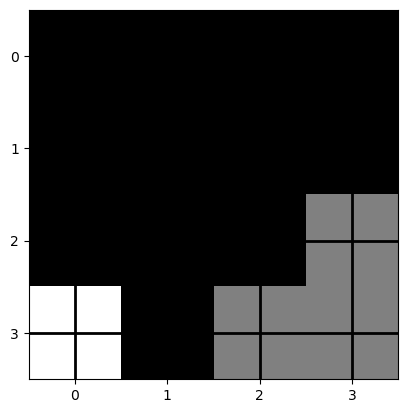

Step= 108
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


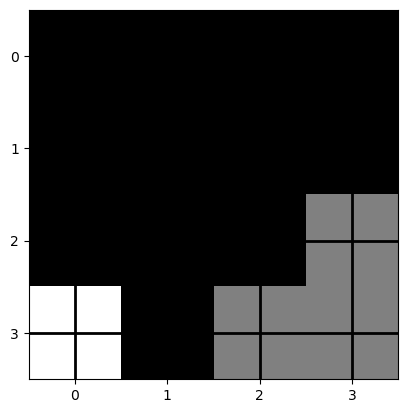

Step= 109
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


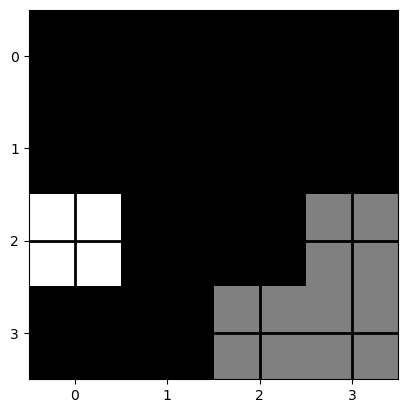

Step= 110
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


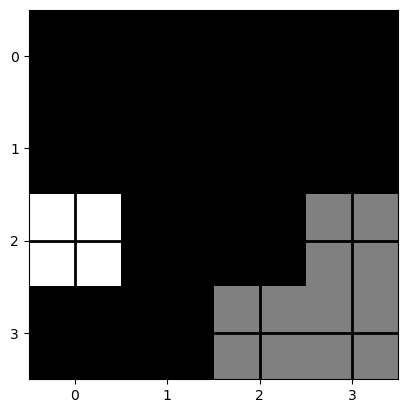

Step= 111
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


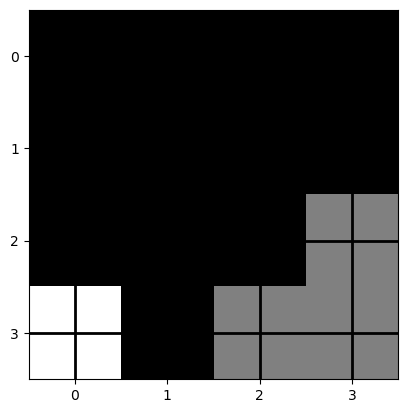

Step= 112
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


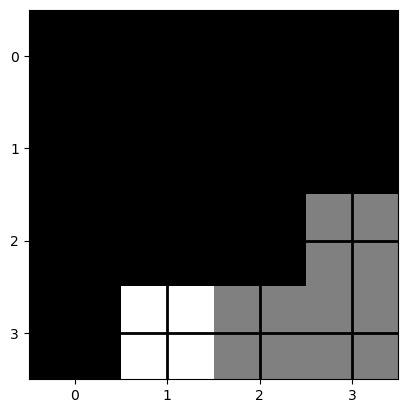

Step= 113
Current state= (3, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


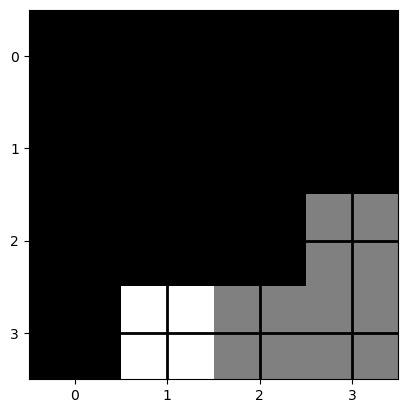

Step= 114
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


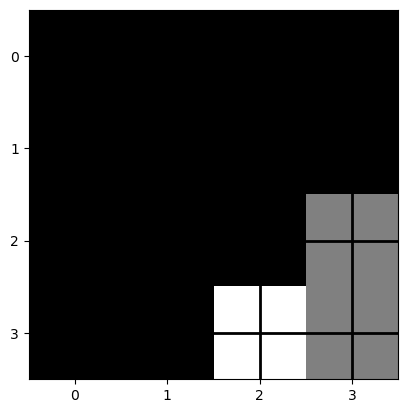

Step= 115
Current state= (3, 2)
Chosen action= 2
Reward= 0
Next state= (3, 3)


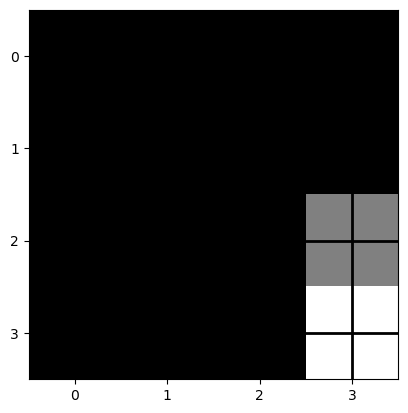

Episode ended in 115 timesteps
This episode's reward is = -570
Step= 2
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


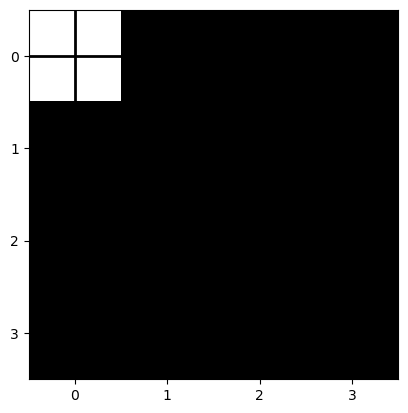

Step= 3
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


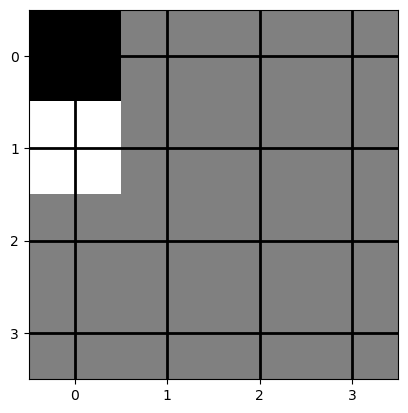

Step= 4
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


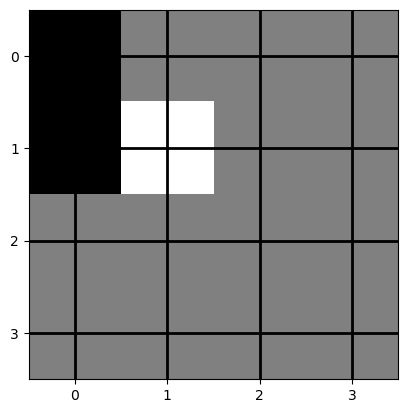

Step= 5
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


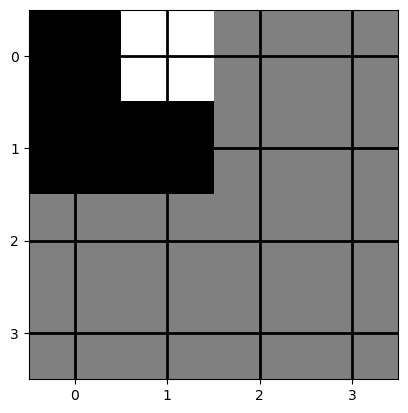

Step= 6
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


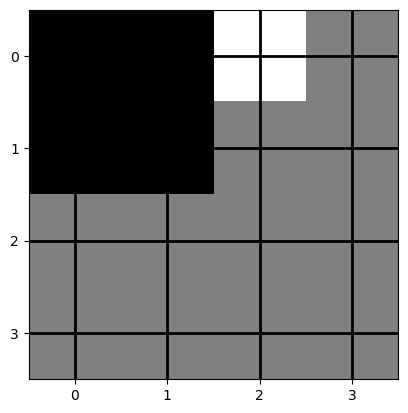

Step= 7
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


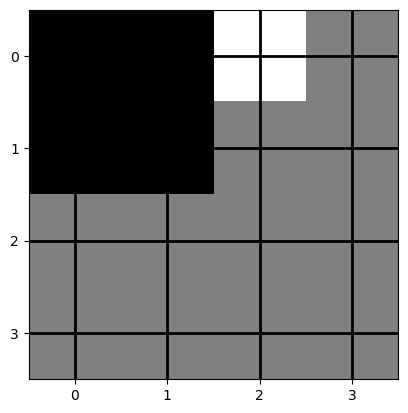

Step= 8
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


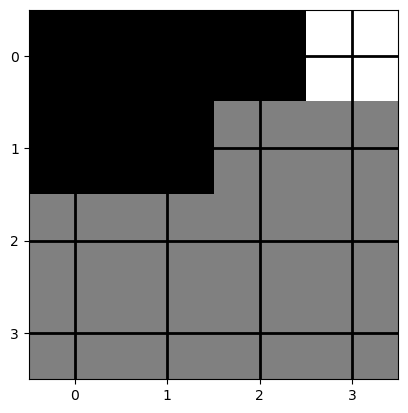

Step= 9
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


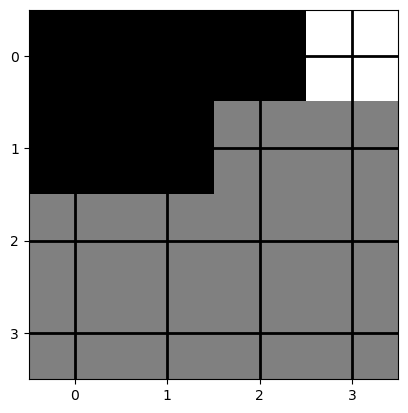

Step= 10
Current state= (0, 3)
Chosen action= 1
Reward= -5
Next state= (1, 3)


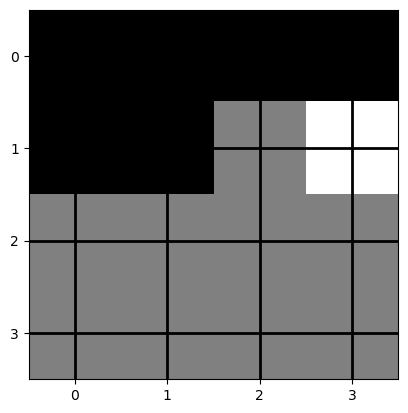

Step= 11
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


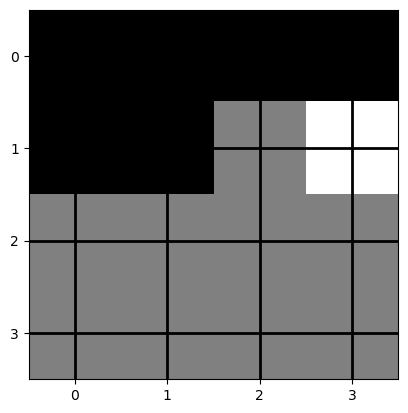

Step= 12
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


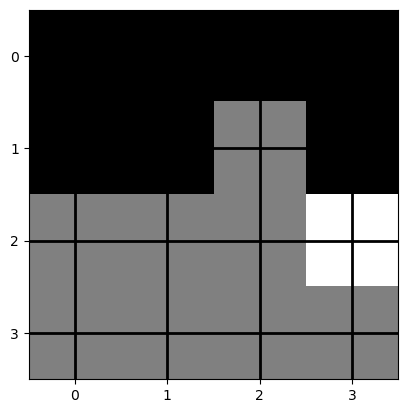

Step= 13
Current state= (2, 3)
Chosen action= 3
Reward= -5
Next state= (2, 2)


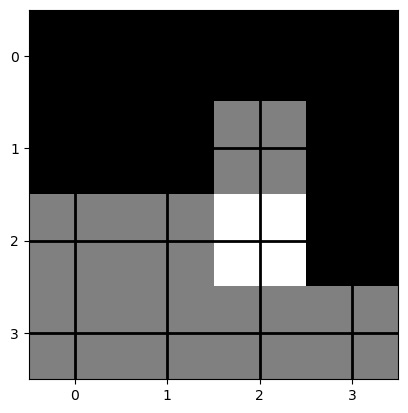

Step= 14
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


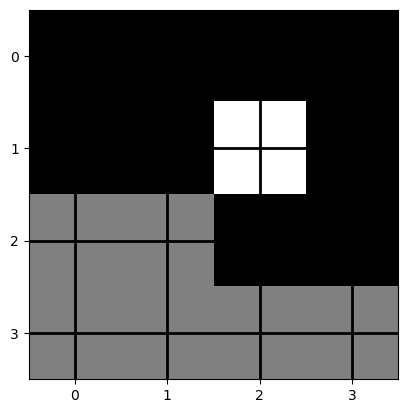

Step= 15
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


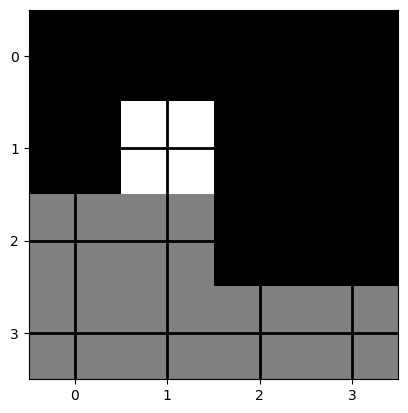

Step= 16
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


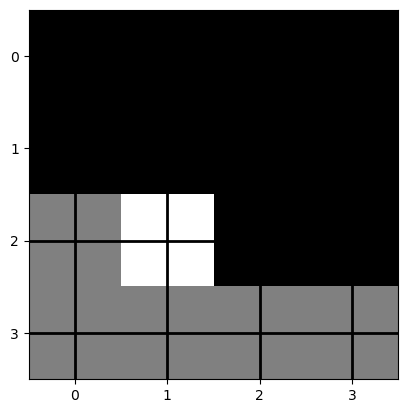

Step= 17
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


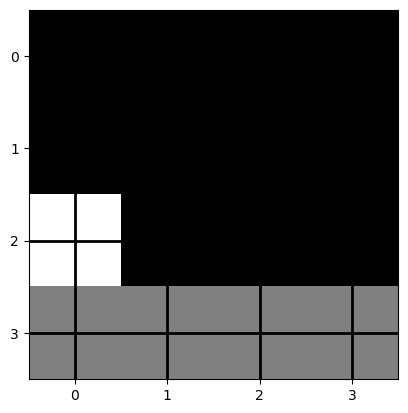

Step= 18
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


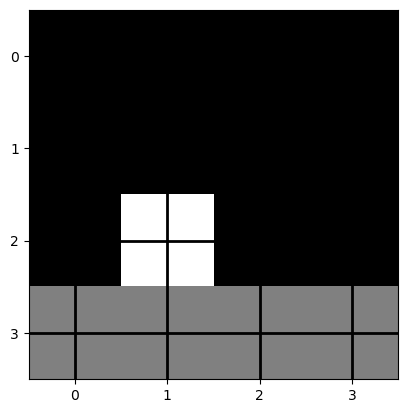

Step= 19
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


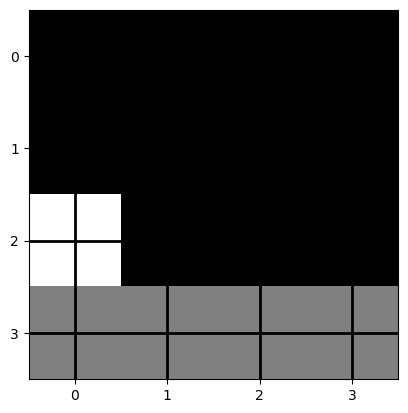

Step= 20
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


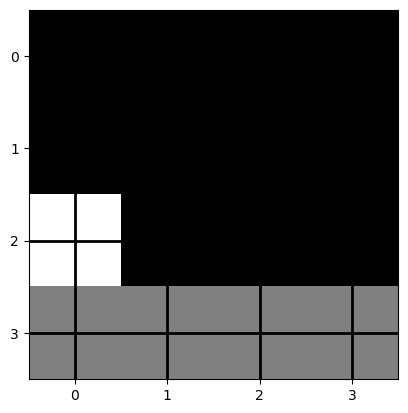

Step= 21
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


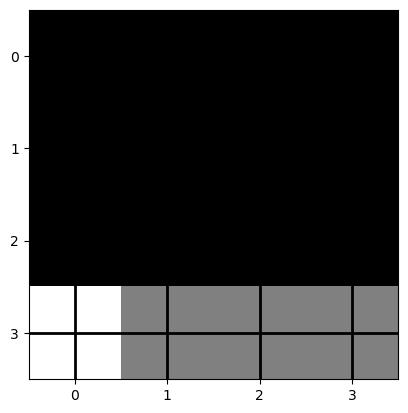

Step= 22
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


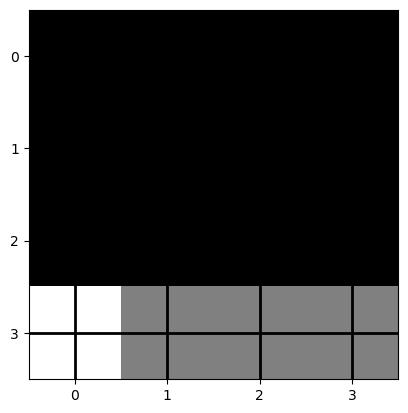

Step= 23
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


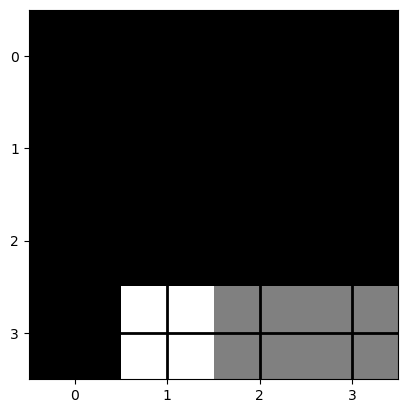

Step= 24
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


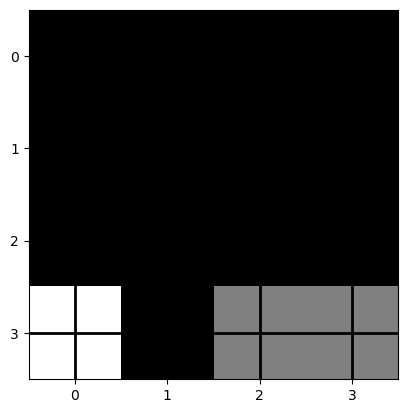

Step= 25
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


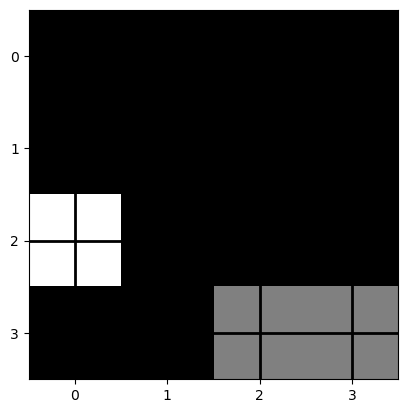

Step= 26
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


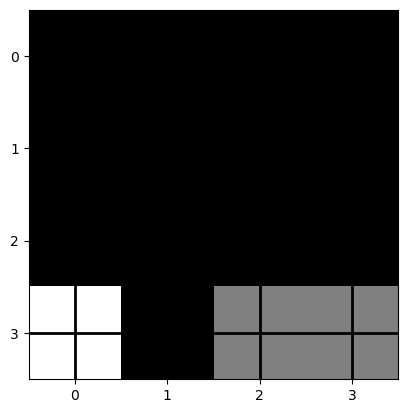

Step= 27
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


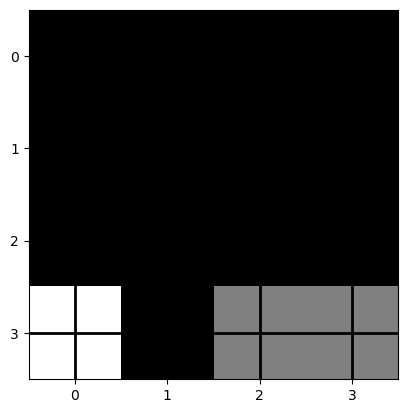

Step= 28
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


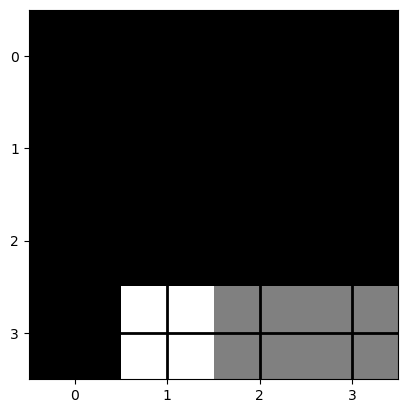

Step= 29
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


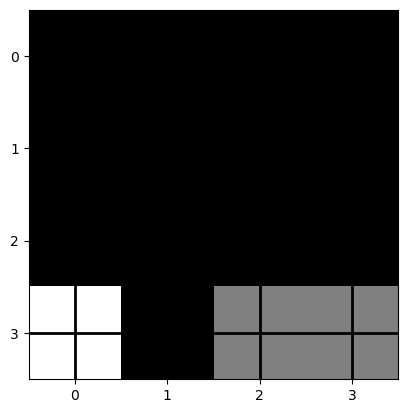

Step= 30
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


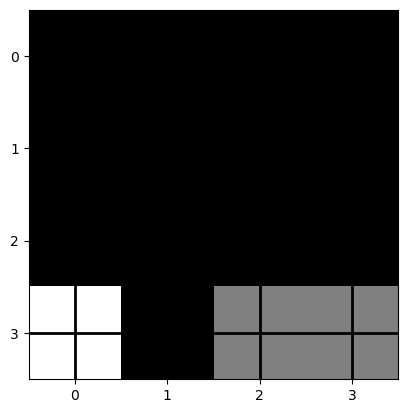

Step= 31
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


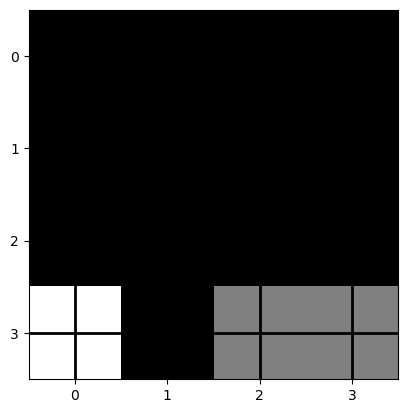

Step= 32
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


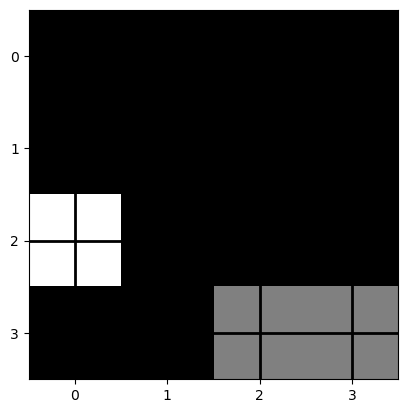

Step= 33
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


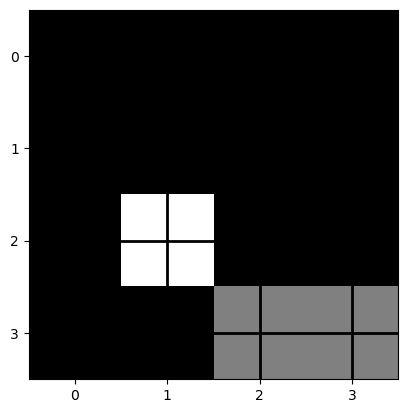

Step= 34
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


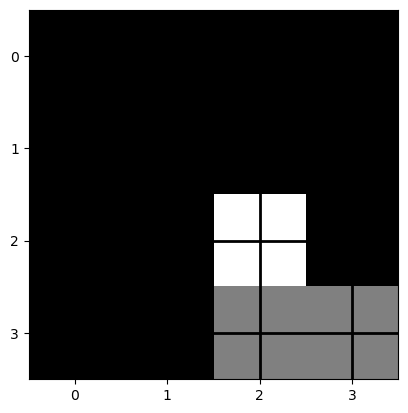

Step= 35
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


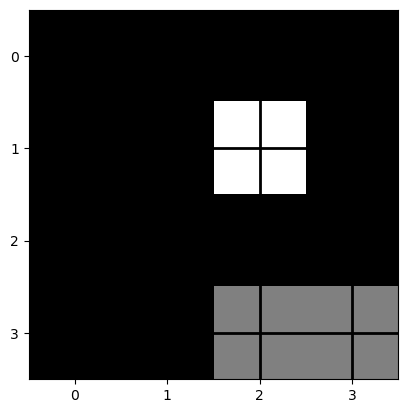

Step= 36
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


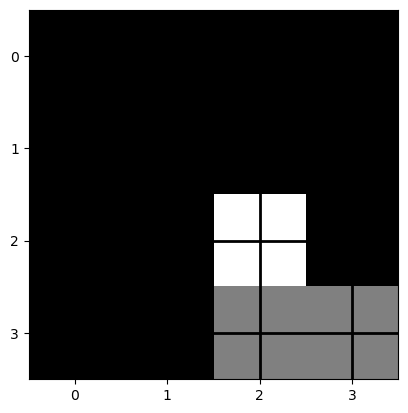

Step= 37
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


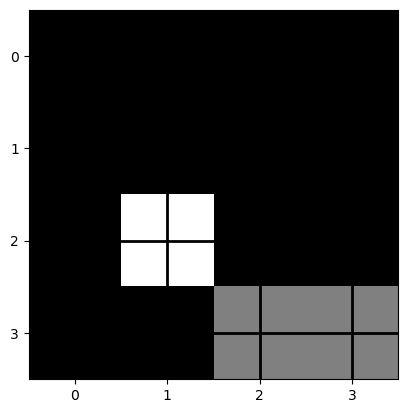

Step= 38
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


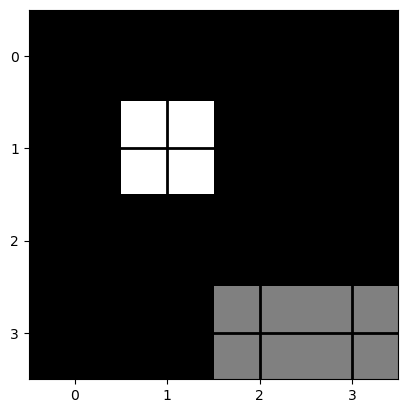

Step= 39
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


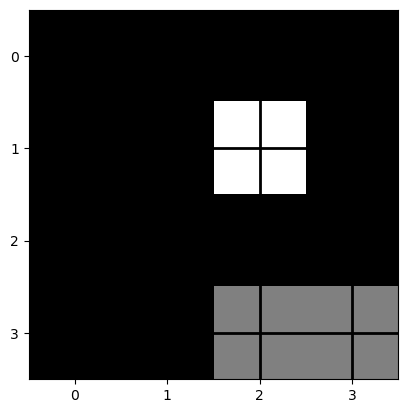

Step= 40
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


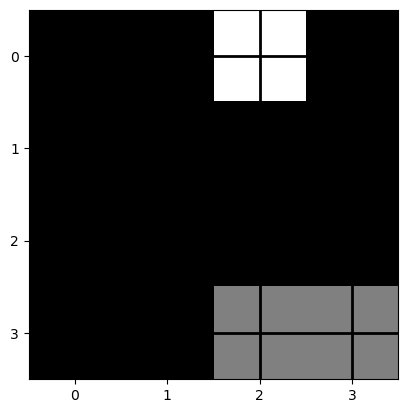

Step= 41
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


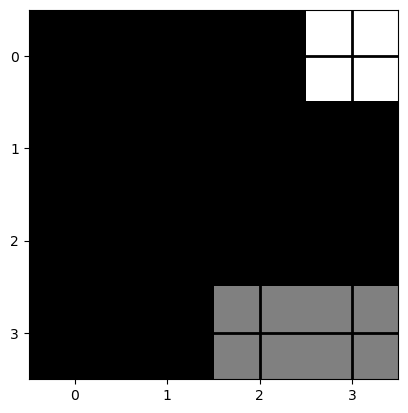

Step= 42
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


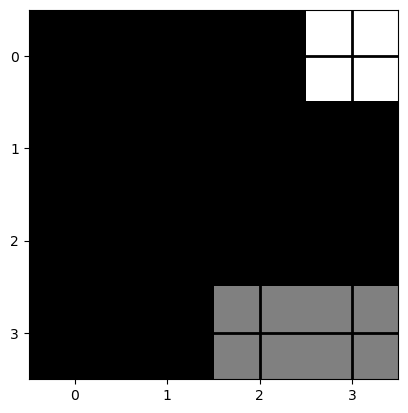

Step= 43
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


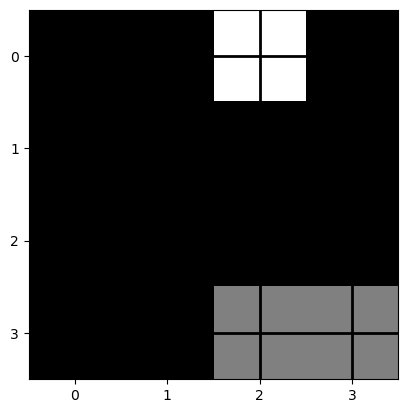

Step= 44
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


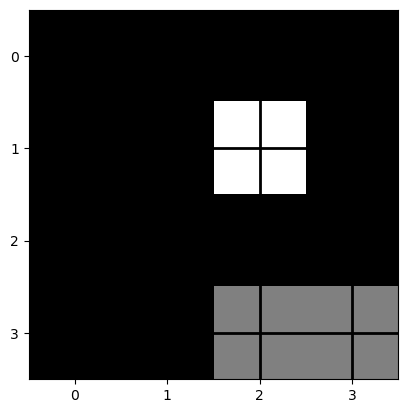

Step= 45
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


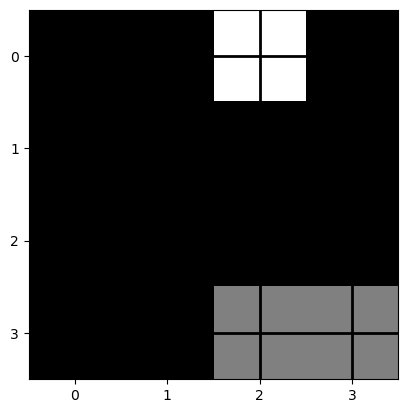

Step= 46
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


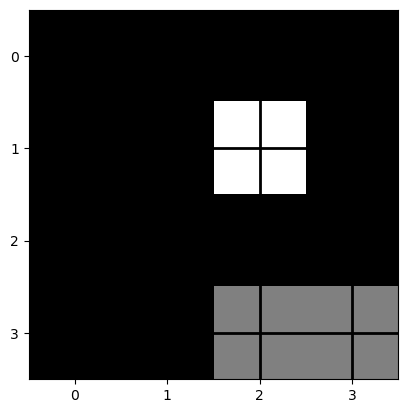

Step= 47
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


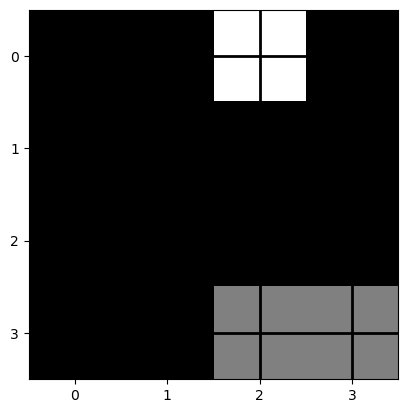

Step= 48
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


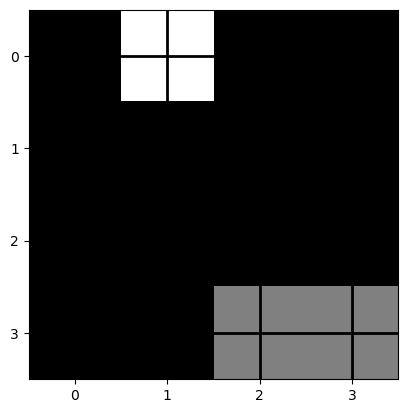

Step= 49
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


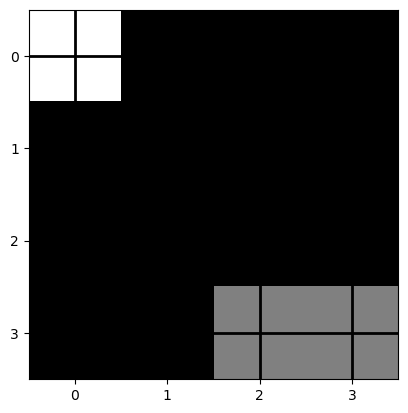

Step= 50
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


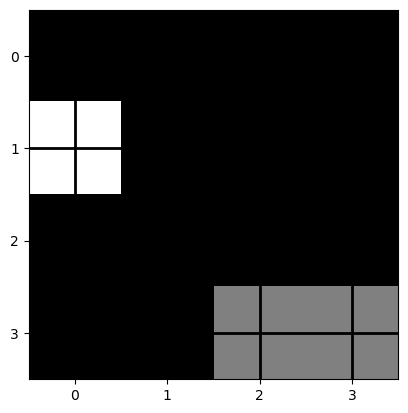

Step= 51
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


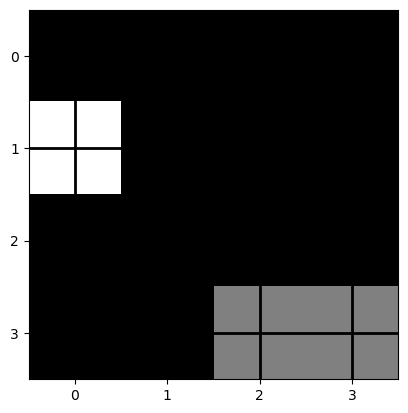

Step= 52
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


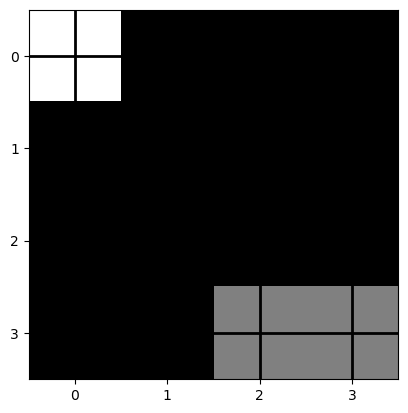

Step= 53
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


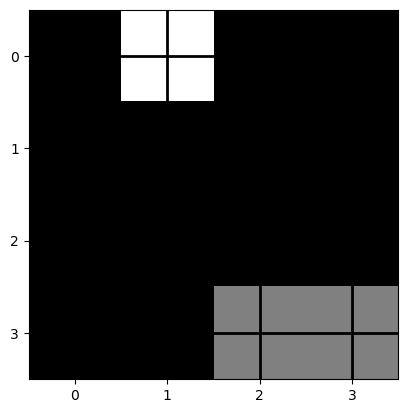

Step= 54
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


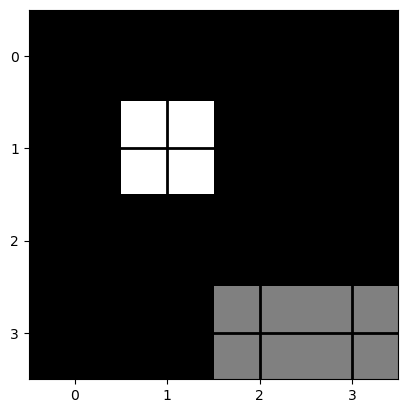

Step= 55
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


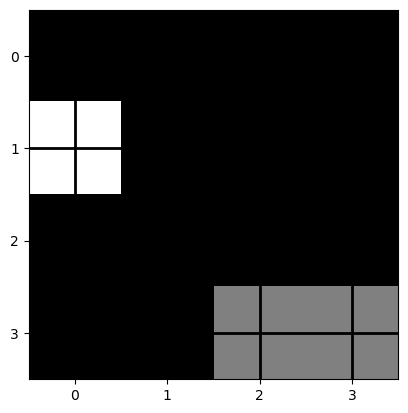

Step= 56
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


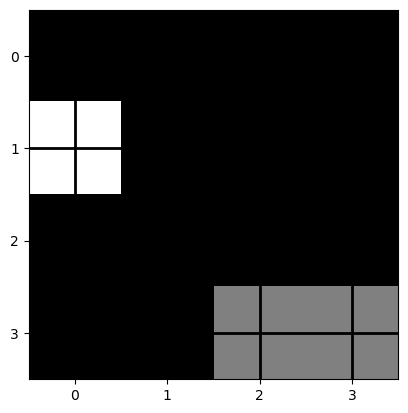

Step= 57
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


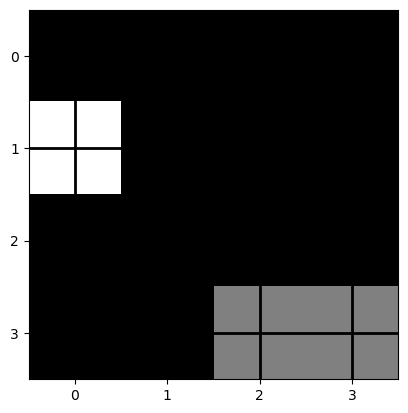

Step= 58
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


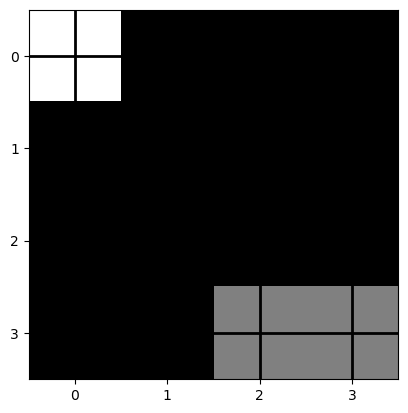

Step= 59
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


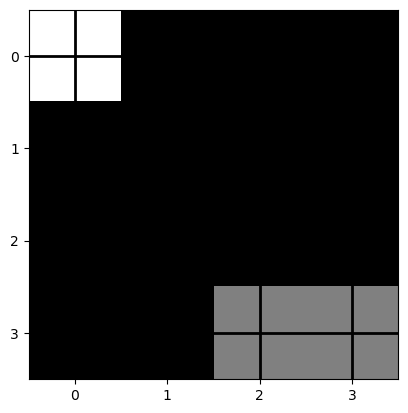

Step= 60
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


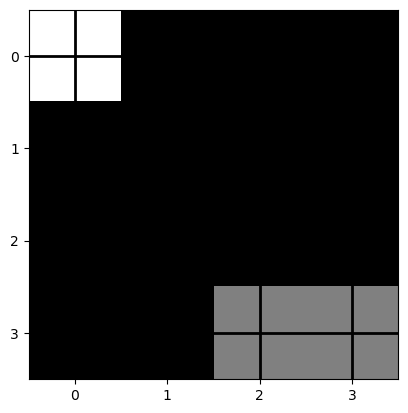

Step= 61
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


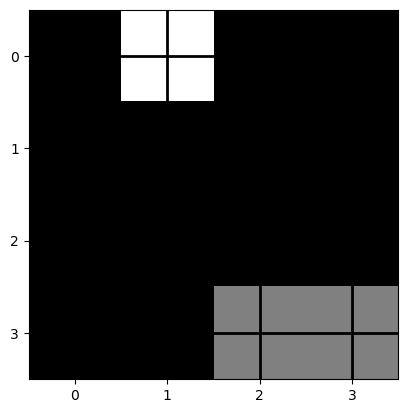

Step= 62
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


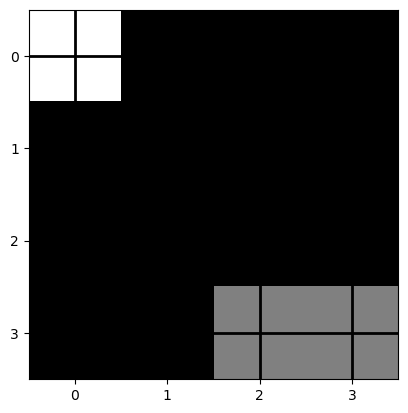

Step= 63
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


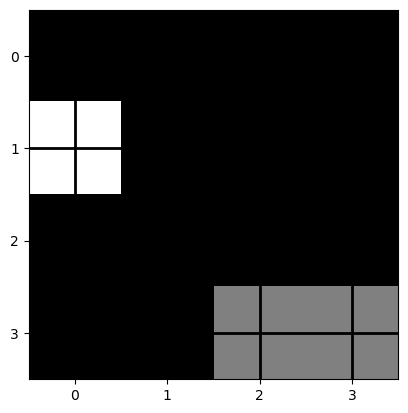

Step= 64
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


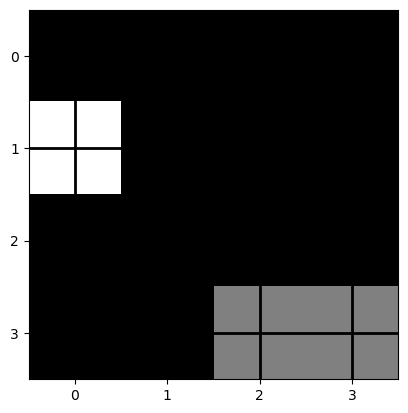

Step= 65
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


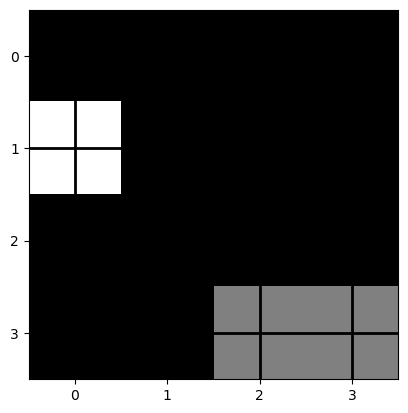

Step= 66
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


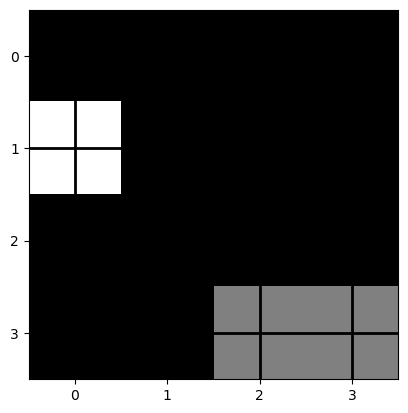

Step= 67
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


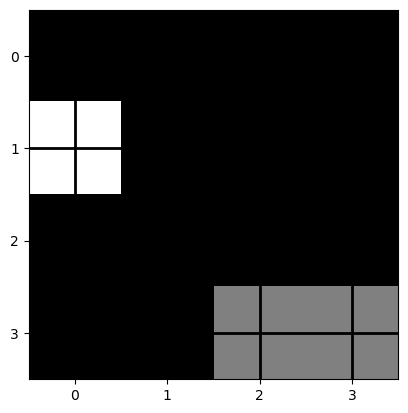

Step= 68
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


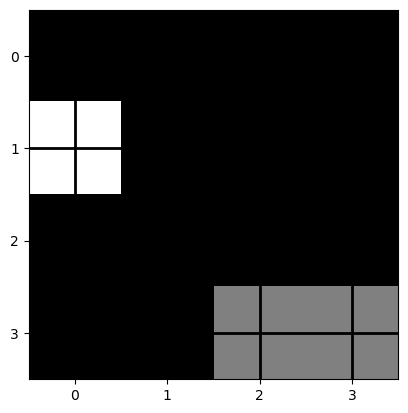

Step= 69
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


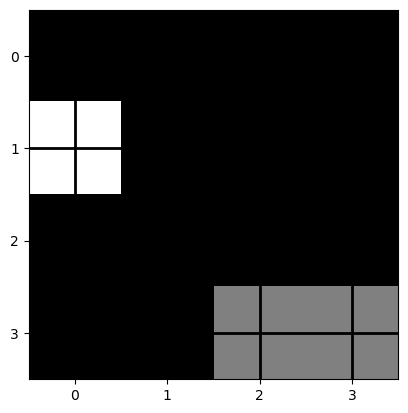

Step= 70
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


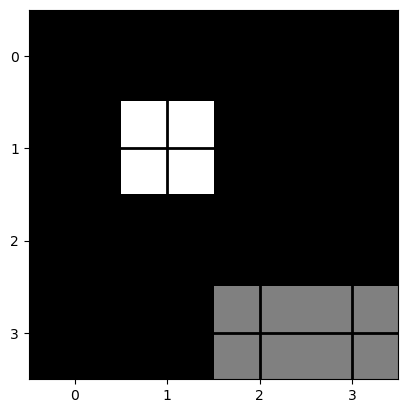

Step= 71
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


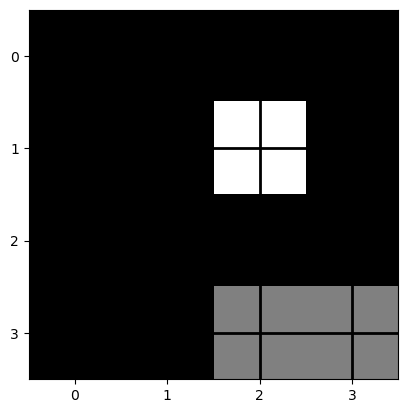

Step= 72
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


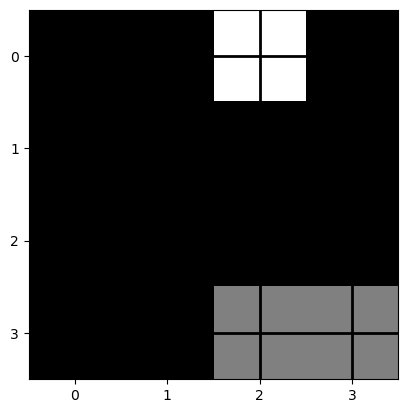

Step= 73
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


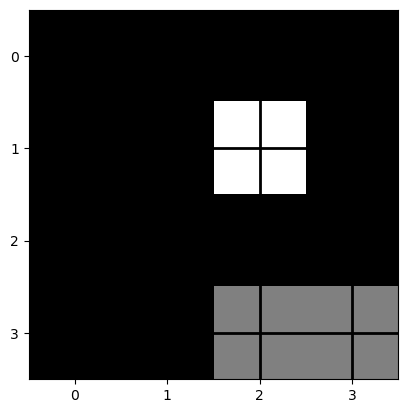

Step= 74
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


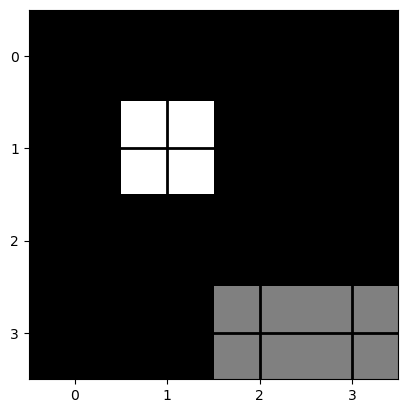

Step= 75
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


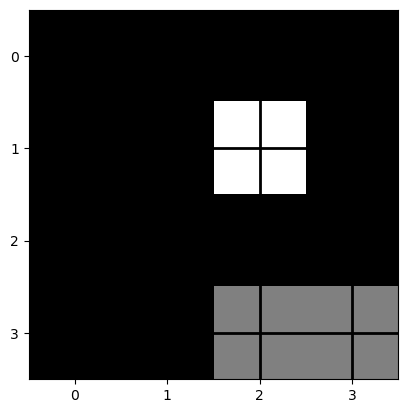

Step= 76
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


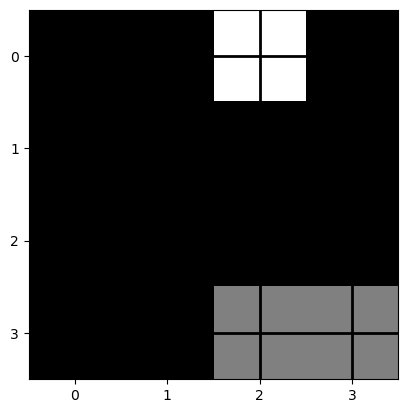

Step= 77
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


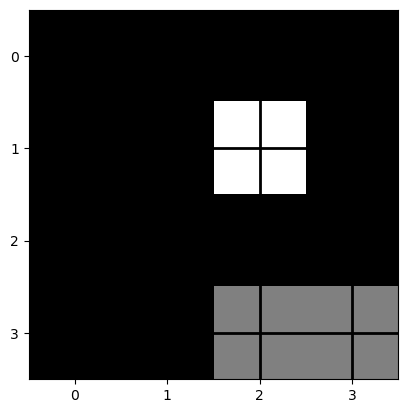

Step= 78
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


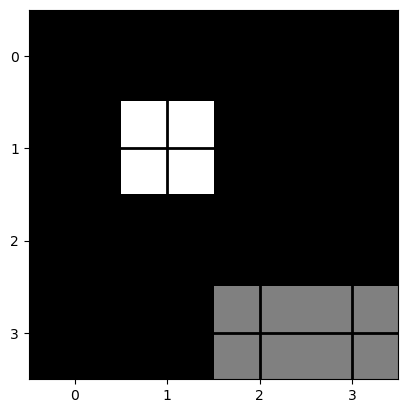

Step= 79
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


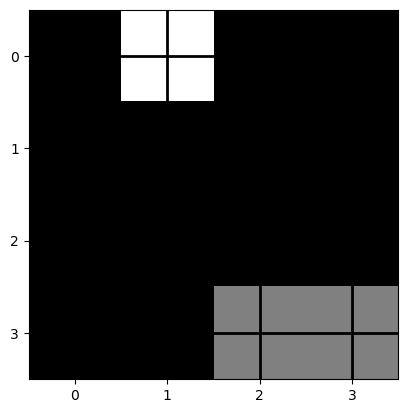

Step= 80
Current state= (0, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


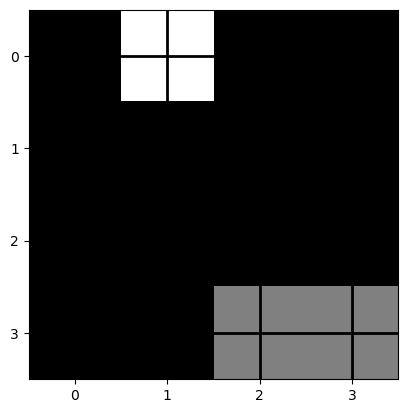

Step= 81
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


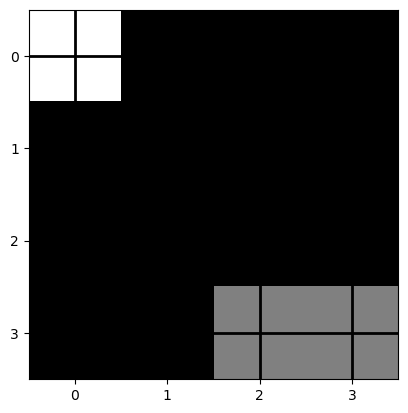

Step= 82
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


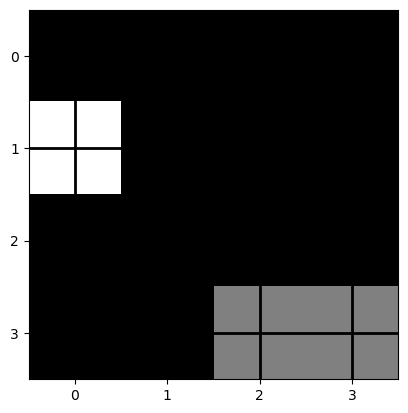

Step= 83
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


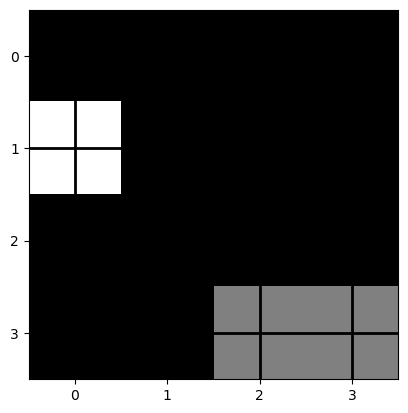

Step= 84
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


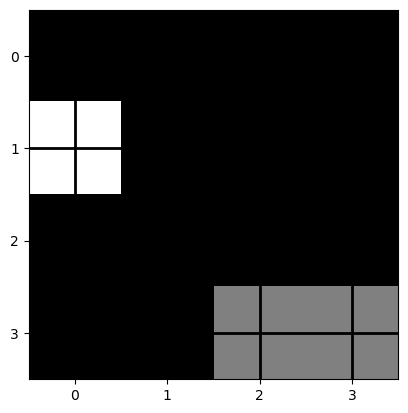

Step= 85
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


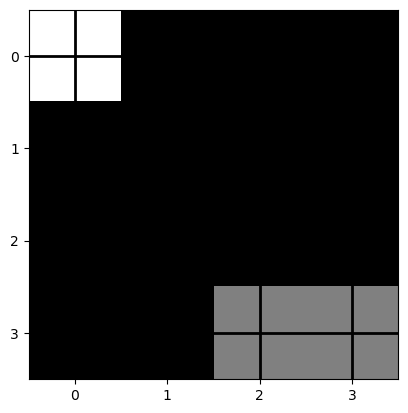

Step= 86
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


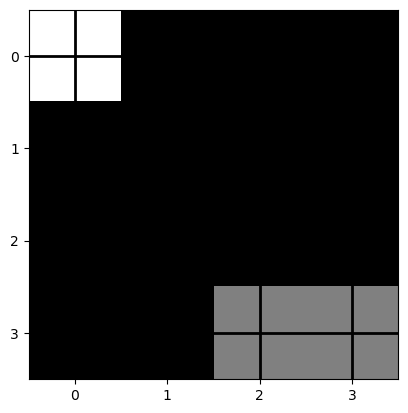

Step= 87
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


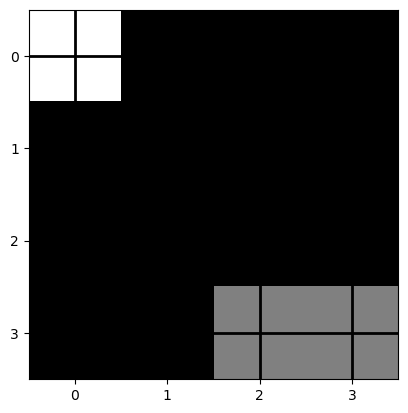

Step= 88
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


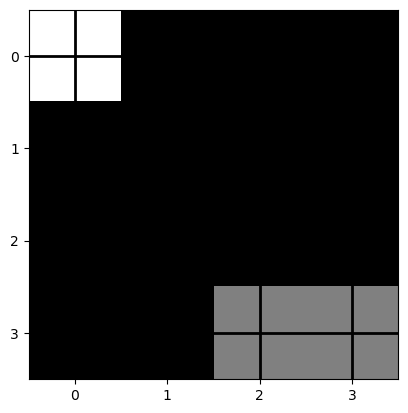

Step= 89
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


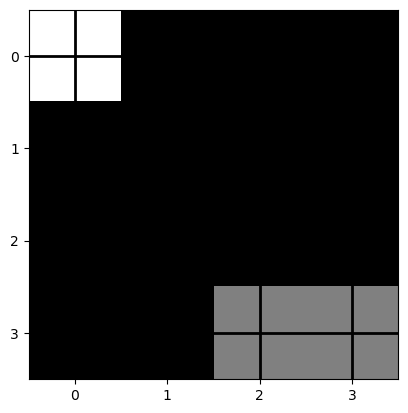

Step= 90
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


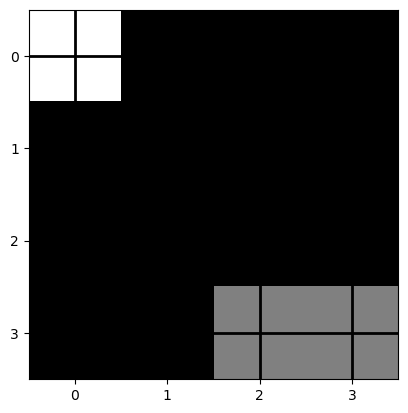

Step= 91
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


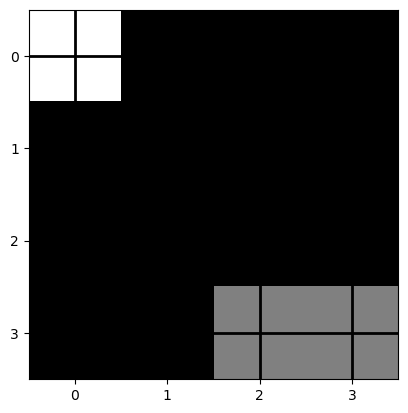

Step= 92
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


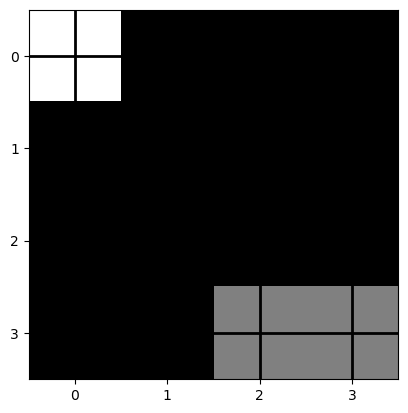

Step= 93
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


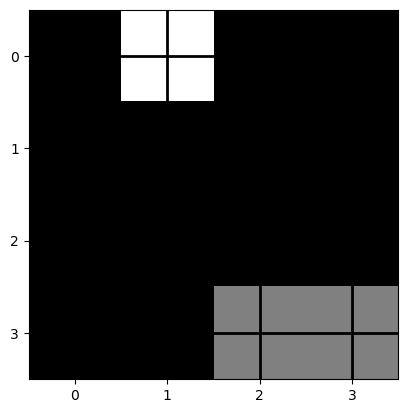

Step= 94
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


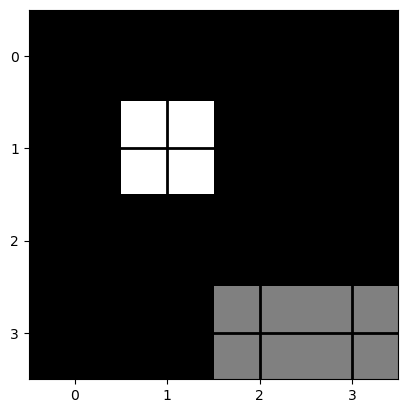

Step= 95
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


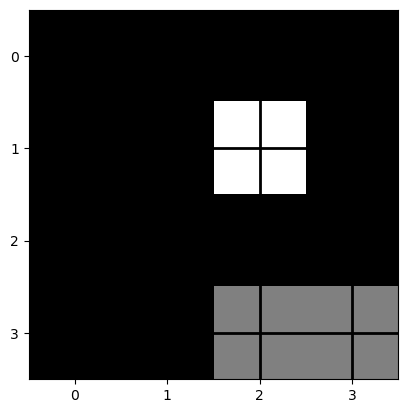

Step= 96
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


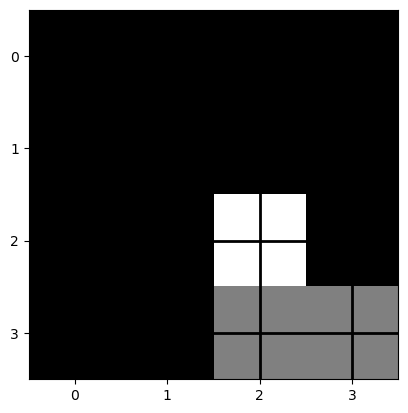

Step= 97
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


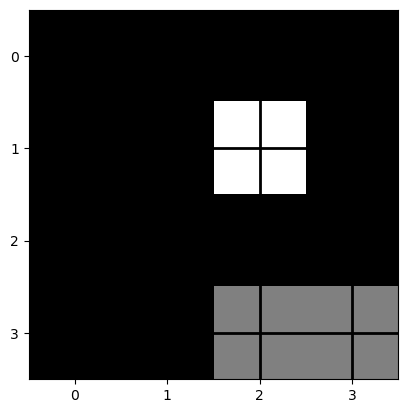

Step= 98
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


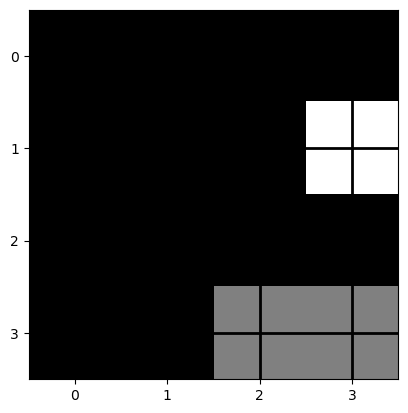

Step= 99
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


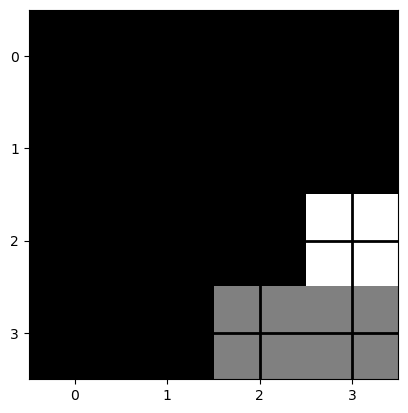

Step= 100
Current state= (2, 3)
Chosen action= 1
Reward= 0
Next state= (3, 3)


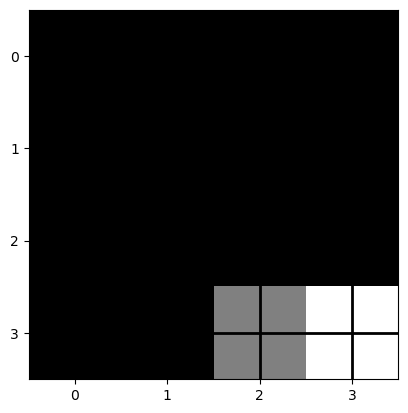

Episode ended in 100 timesteps
This episode's reward is = -495
Step= 2
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


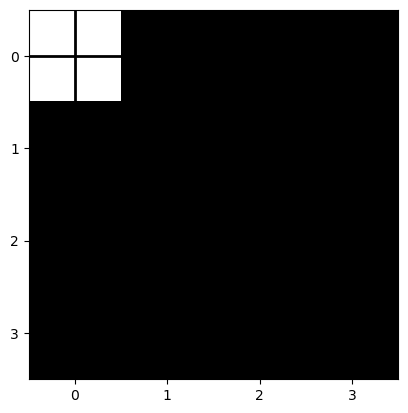

Step= 3
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


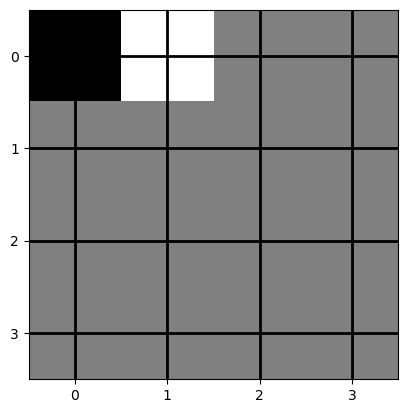

Step= 4
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


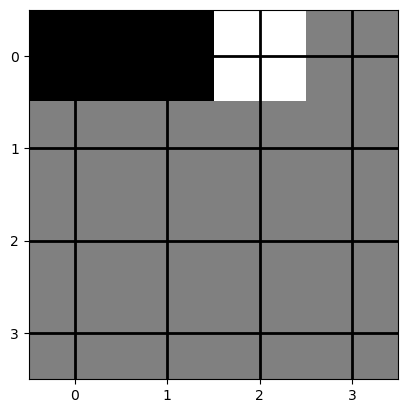

Step= 5
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


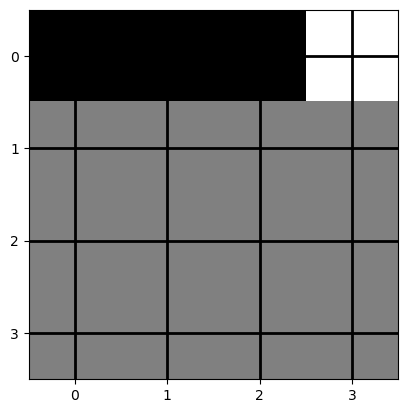

Step= 6
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


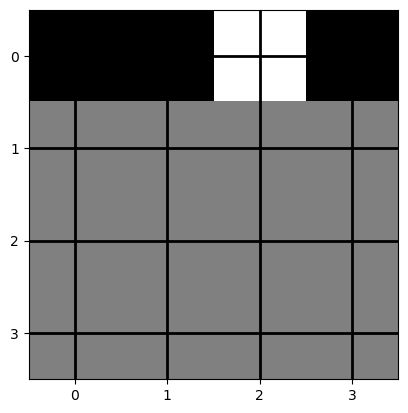

Step= 7
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


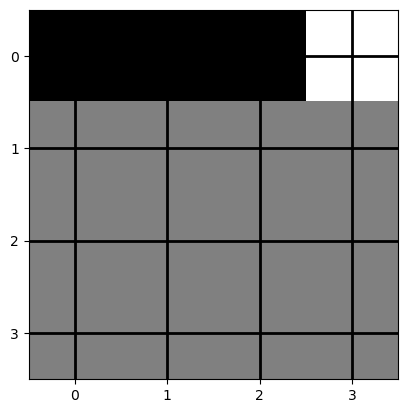

Step= 8
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


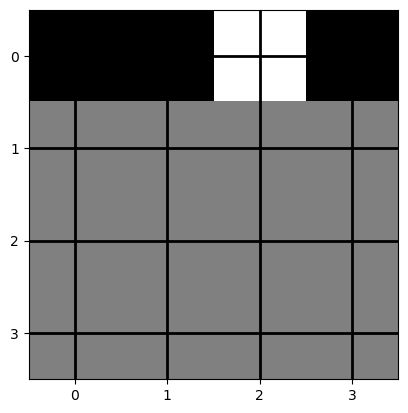

Step= 9
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


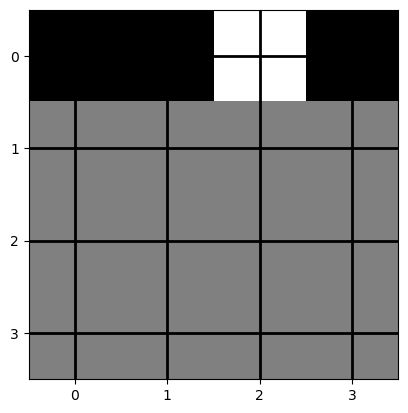

Step= 10
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


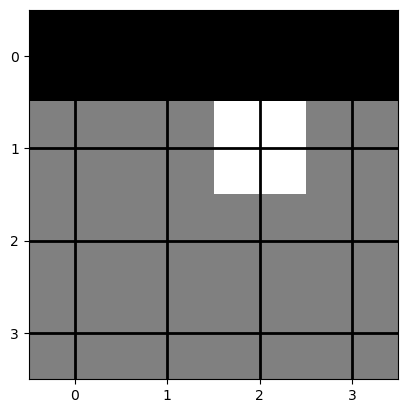

Step= 11
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


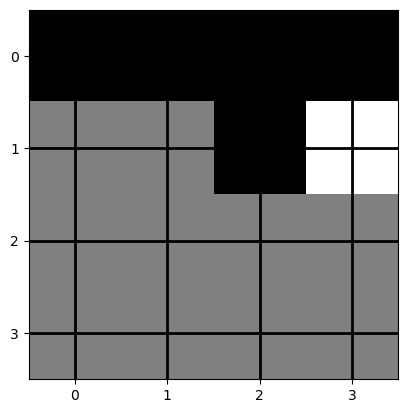

Step= 12
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


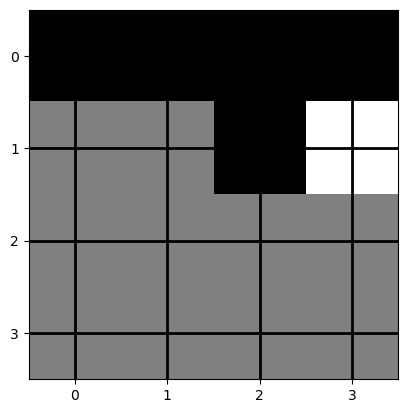

Step= 13
Current state= (1, 3)
Chosen action= 3
Reward= -5
Next state= (1, 2)


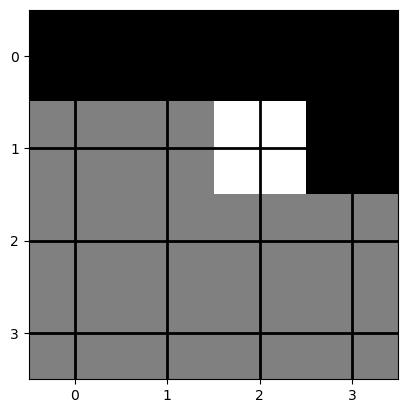

Step= 14
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


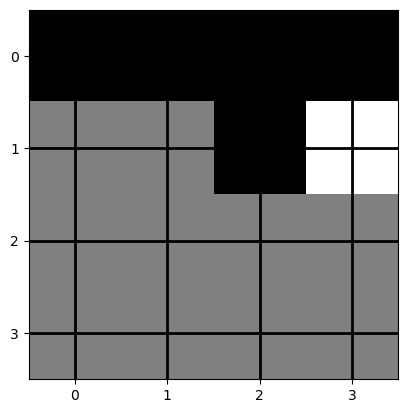

Step= 15
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


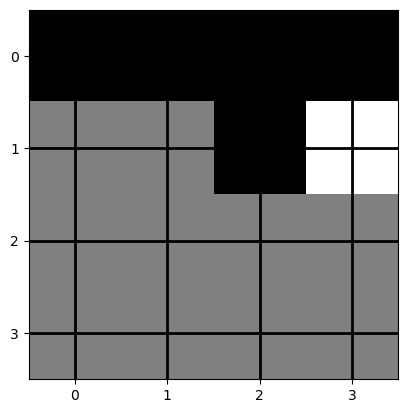

Step= 16
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


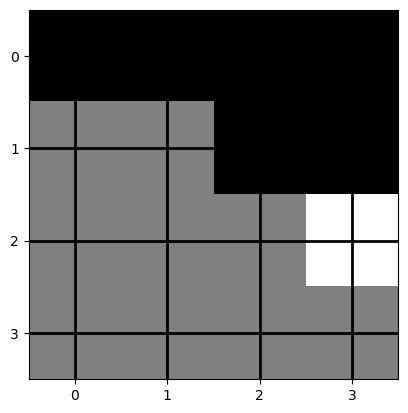

Step= 17
Current state= (2, 3)
Chosen action= 3
Reward= -5
Next state= (2, 2)


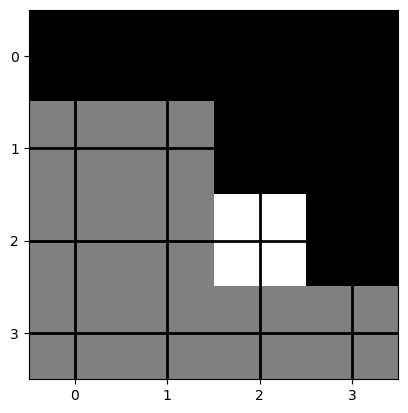

Step= 18
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


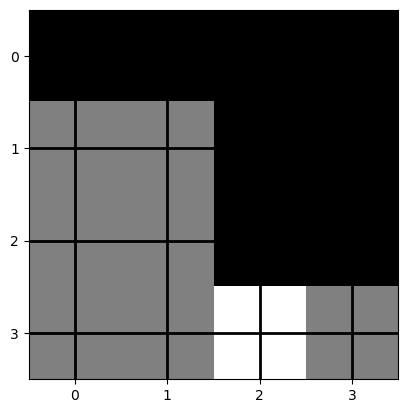

Step= 19
Current state= (3, 2)
Chosen action= 0
Reward= -5
Next state= (2, 2)


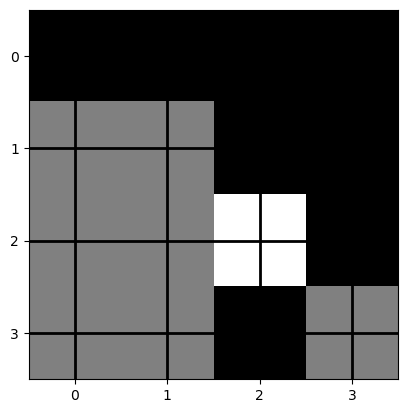

Step= 20
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


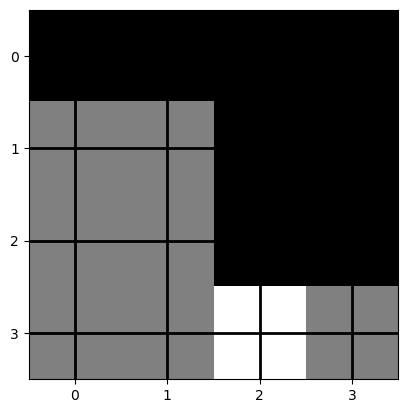

Step= 21
Current state= (3, 2)
Chosen action= 2
Reward= 0
Next state= (3, 3)


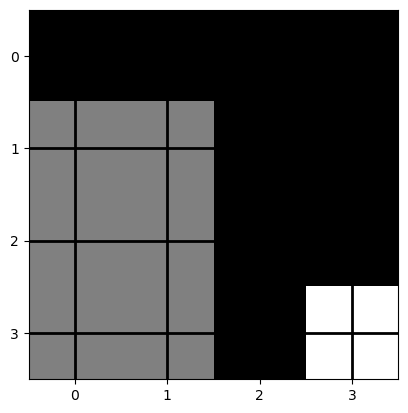

Episode ended in 21 timesteps
This episode's reward is = -100
Step= 2
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


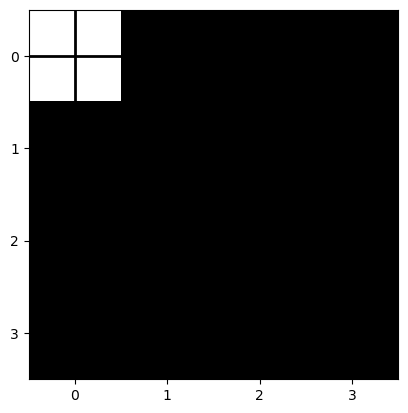

Step= 3
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


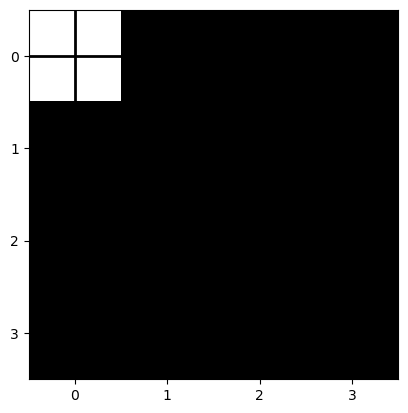

Step= 4
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


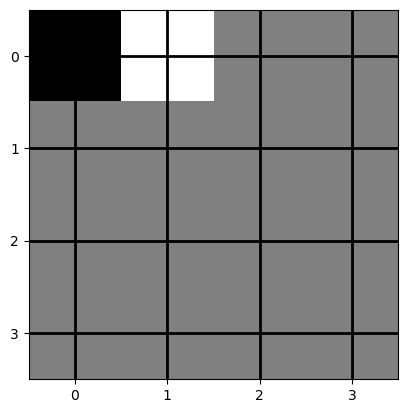

Step= 5
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


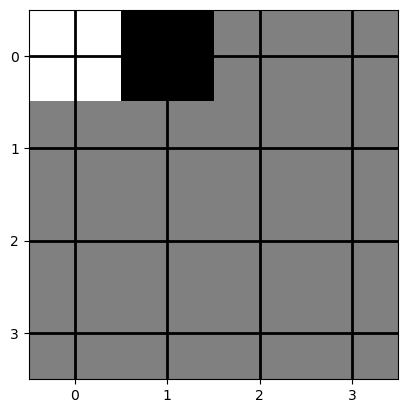

Step= 6
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


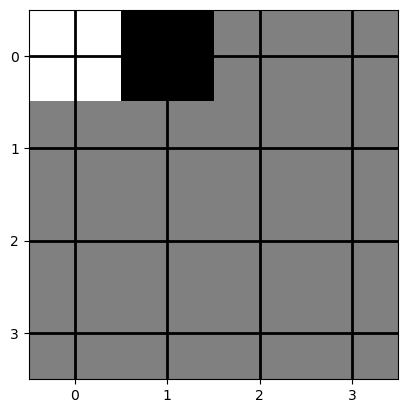

Step= 7
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


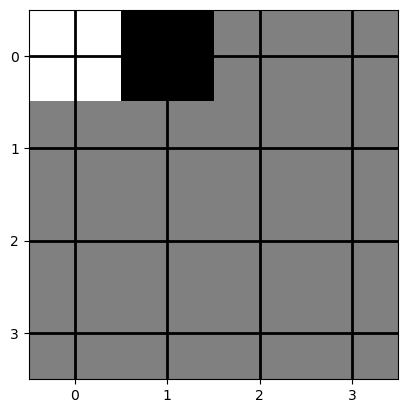

Step= 8
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


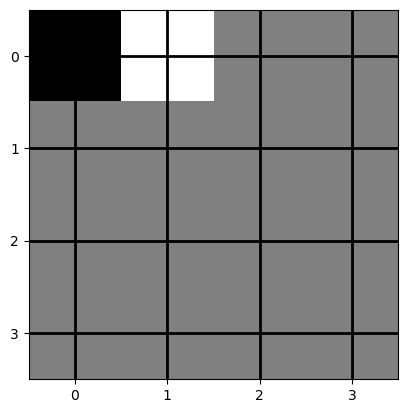

Step= 9
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


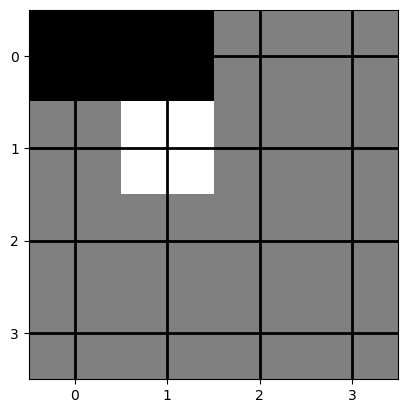

Step= 10
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


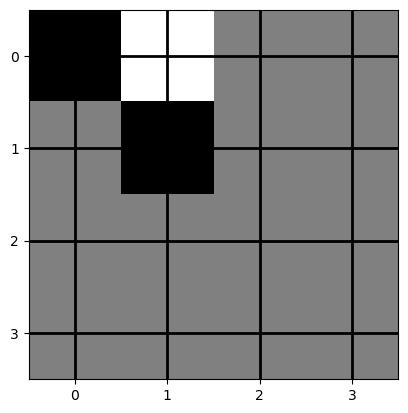

Step= 11
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


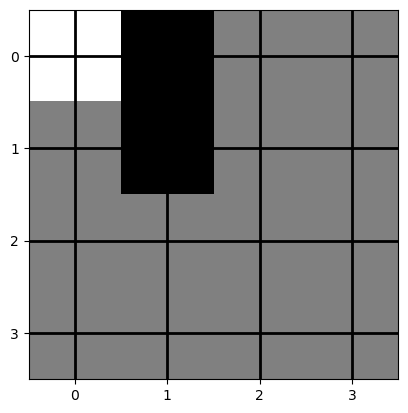

Step= 12
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


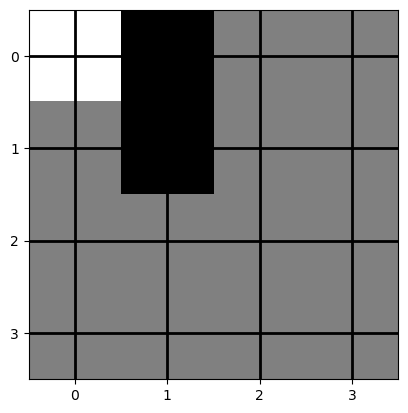

Step= 13
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


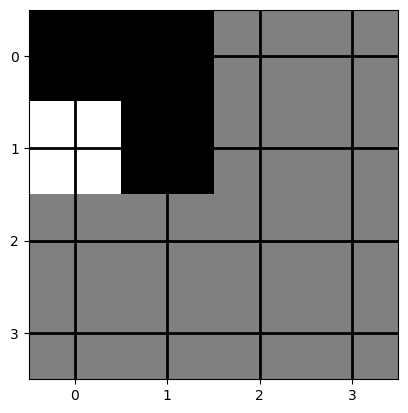

Step= 14
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


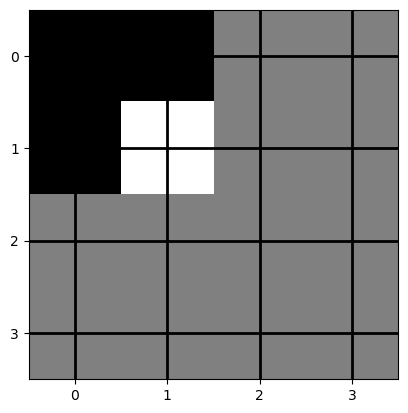

Step= 15
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


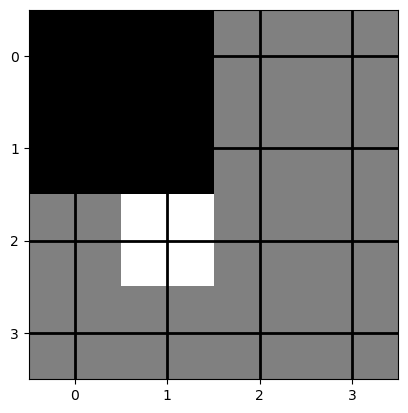

Step= 16
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


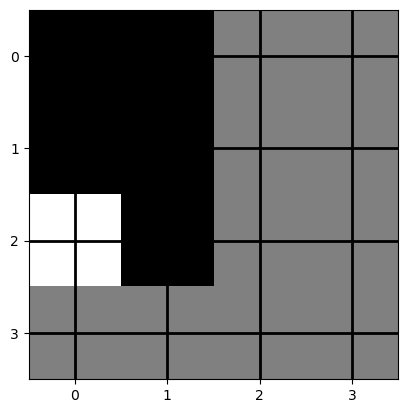

Step= 17
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


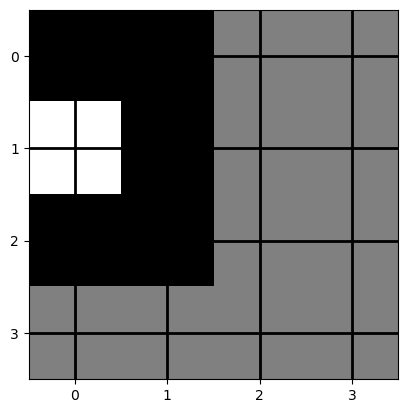

Step= 18
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


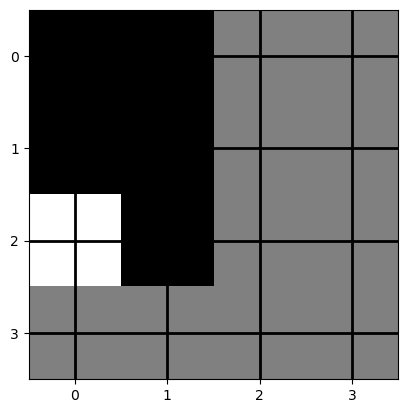

Step= 19
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


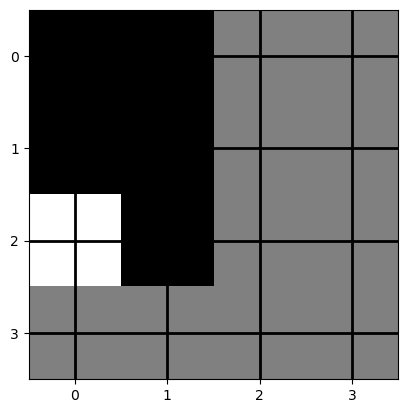

Step= 20
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


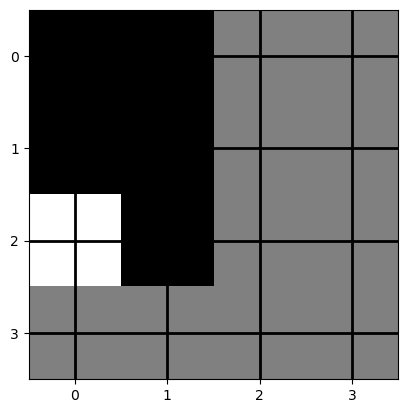

Step= 21
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


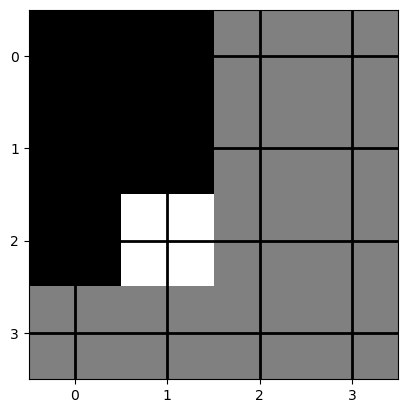

Step= 22
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


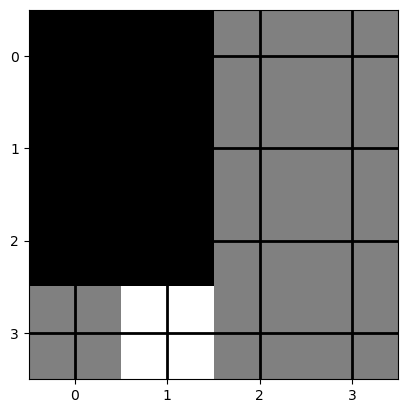

Step= 23
Current state= (3, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


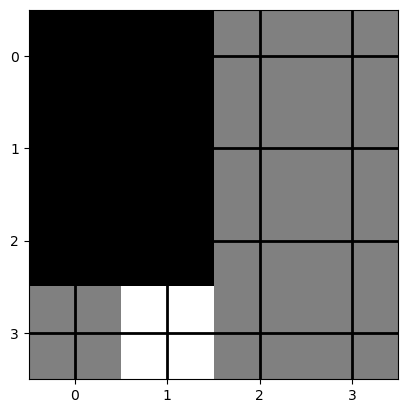

Step= 24
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


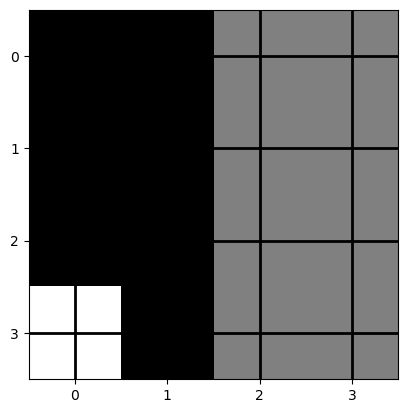

Step= 25
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


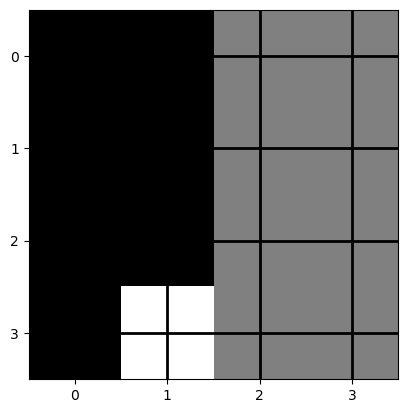

Step= 26
Current state= (3, 1)
Chosen action= 0
Reward= -5
Next state= (2, 1)


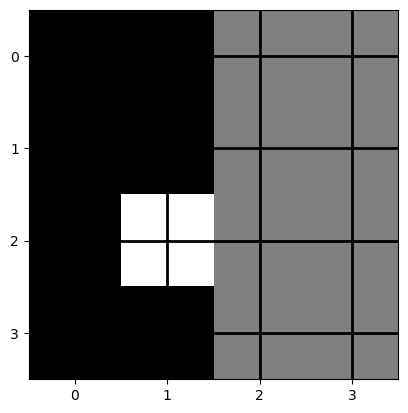

Step= 27
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


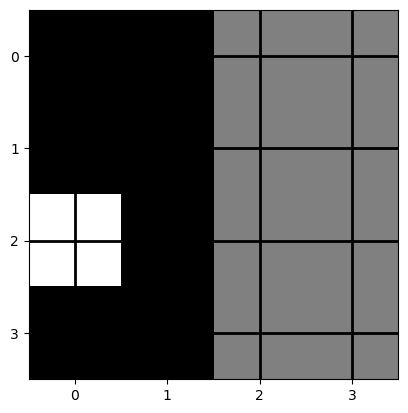

Step= 28
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


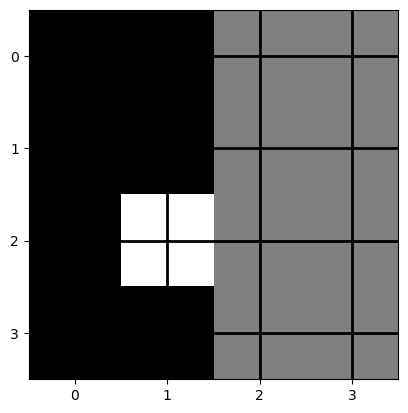

Step= 29
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


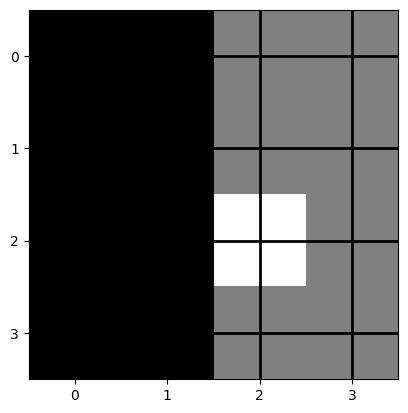

Step= 30
Current state= (2, 2)
Chosen action= 2
Reward= -5
Next state= (2, 3)


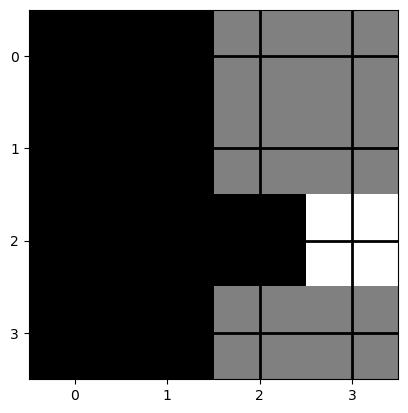

Step= 31
Current state= (2, 3)
Chosen action= 0
Reward= -5
Next state= (1, 3)


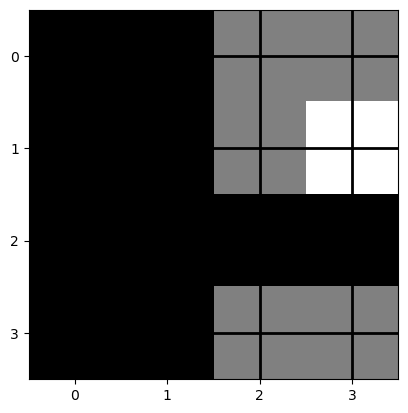

Step= 32
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


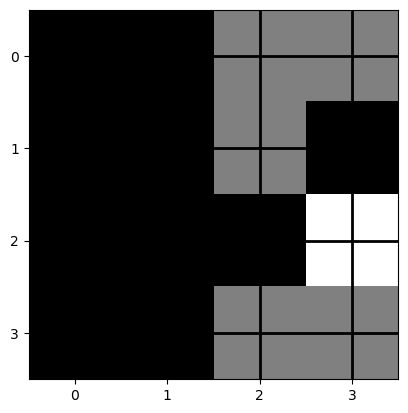

Step= 33
Current state= (2, 3)
Chosen action= 3
Reward= -5
Next state= (2, 2)


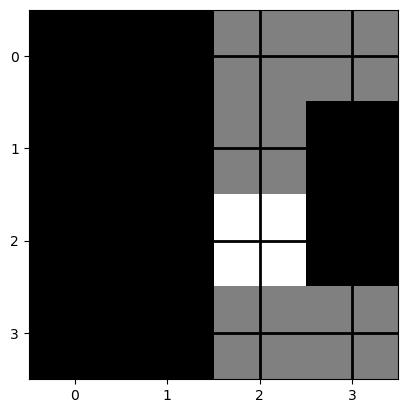

Step= 34
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


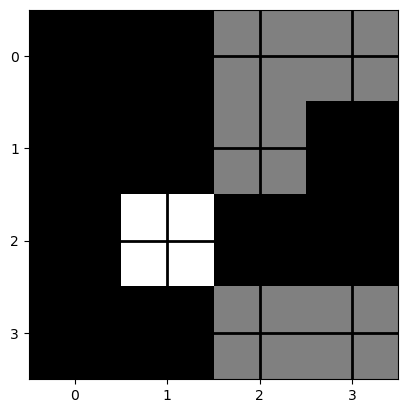

Step= 35
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


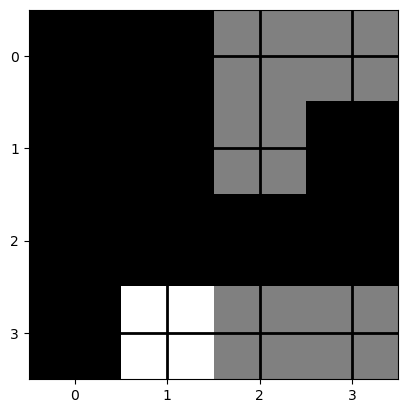

Step= 36
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


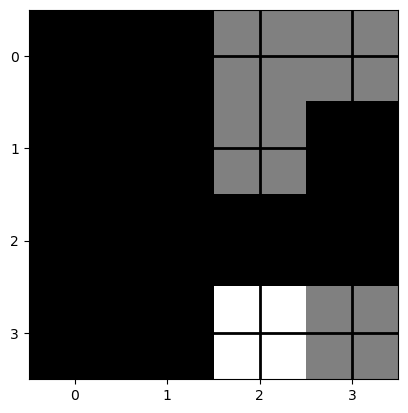

Step= 37
Current state= (3, 2)
Chosen action= 2
Reward= 0
Next state= (3, 3)


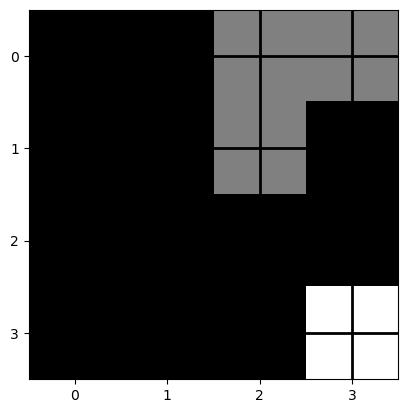

Episode ended in 37 timesteps
This episode's reward is = -180
Step= 2
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


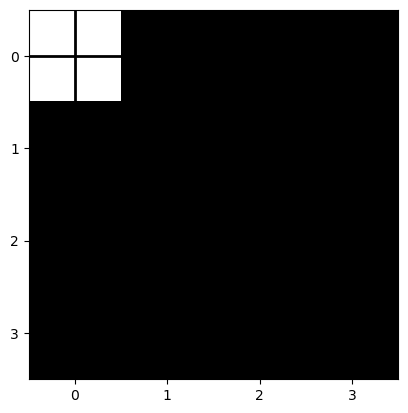

Step= 3
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


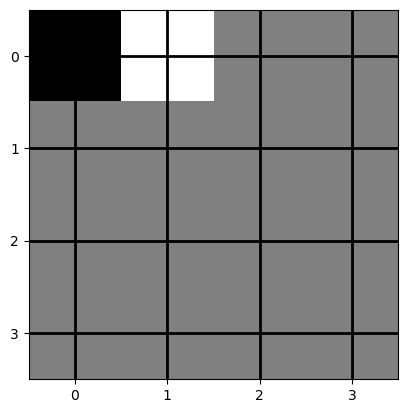

Step= 4
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


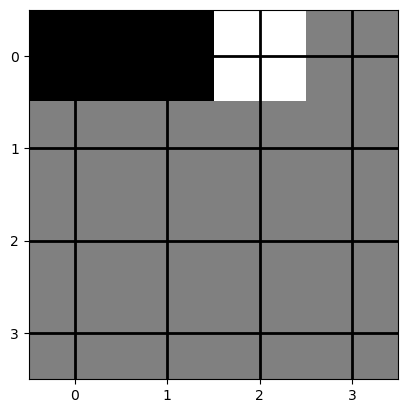

Step= 5
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


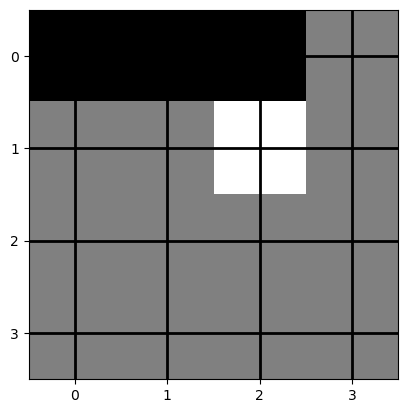

Step= 6
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


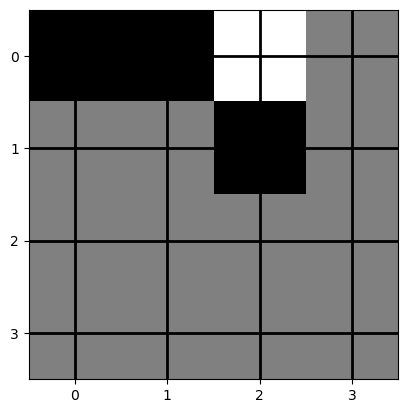

Step= 7
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


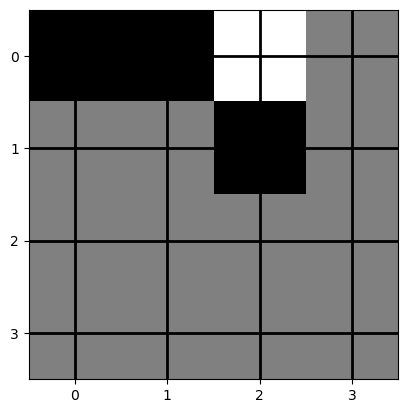

Step= 8
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


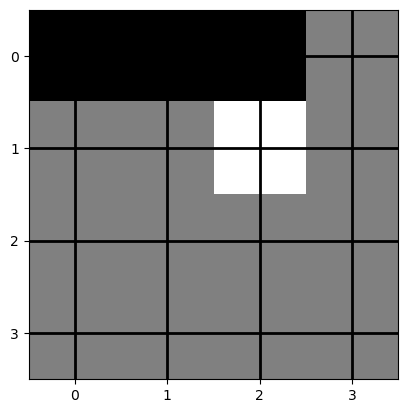

Step= 9
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


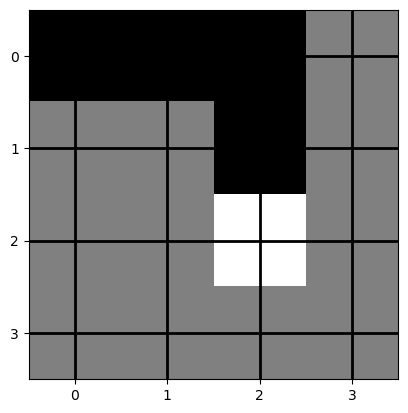

Step= 10
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


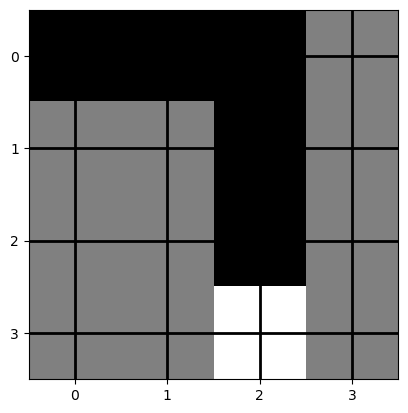

Step= 11
Current state= (3, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


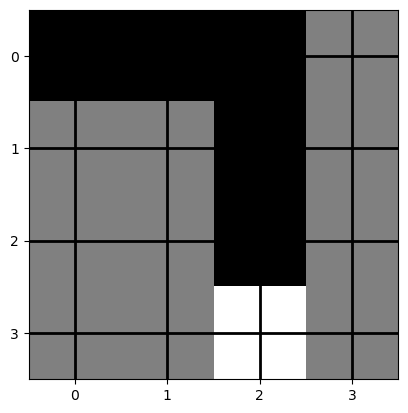

Step= 12
Current state= (3, 2)
Chosen action= 0
Reward= -5
Next state= (2, 2)


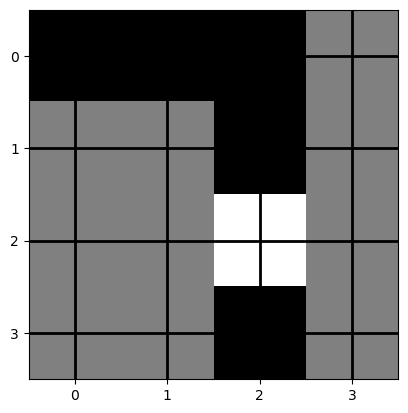

Step= 13
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


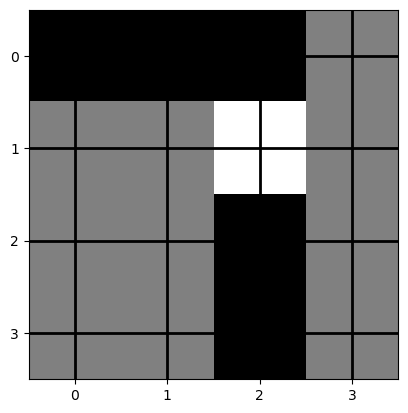

Step= 14
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


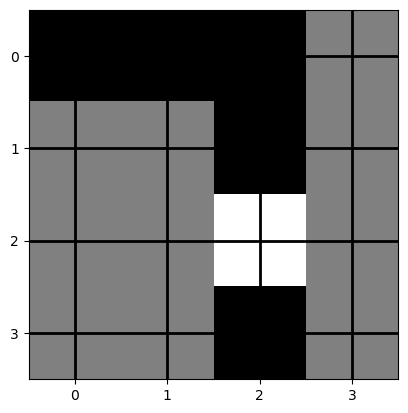

Step= 15
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


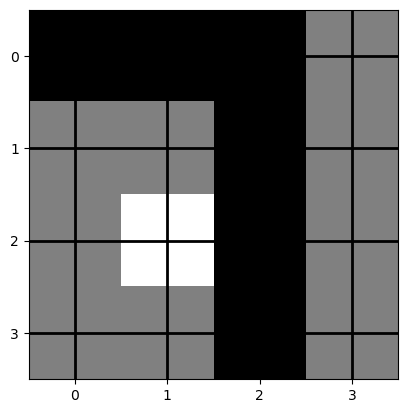

Step= 16
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


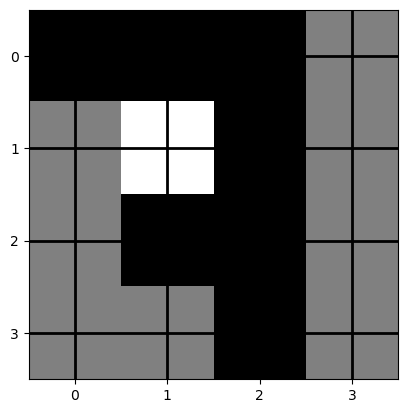

Step= 17
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


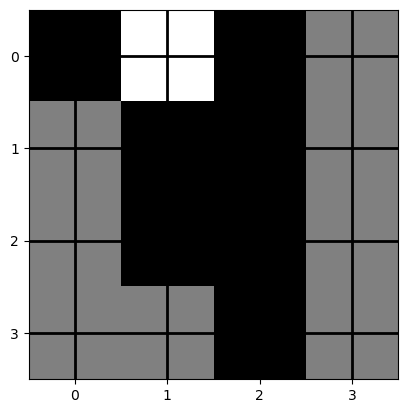

Step= 18
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


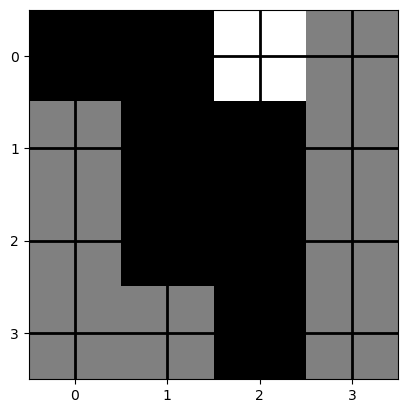

Step= 19
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


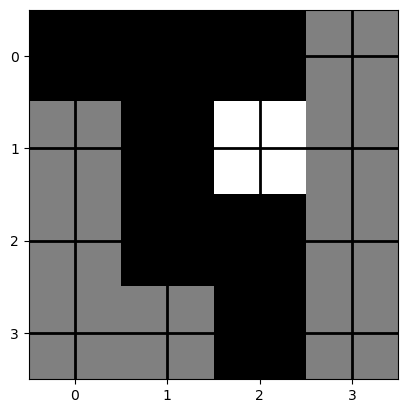

Step= 20
Current state= (1, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


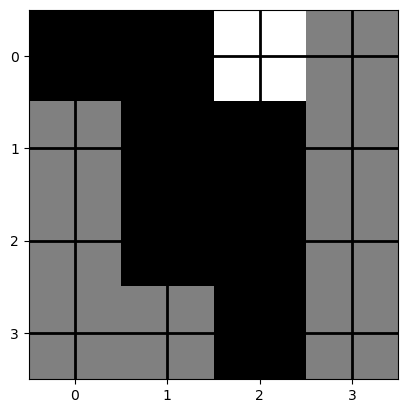

Step= 21
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


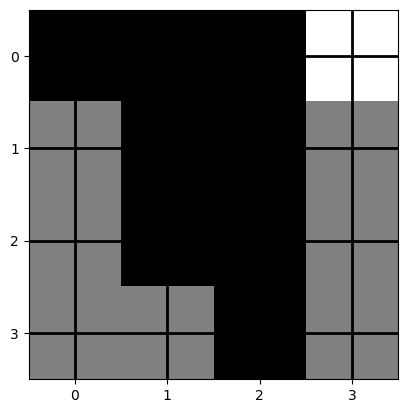

Step= 22
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


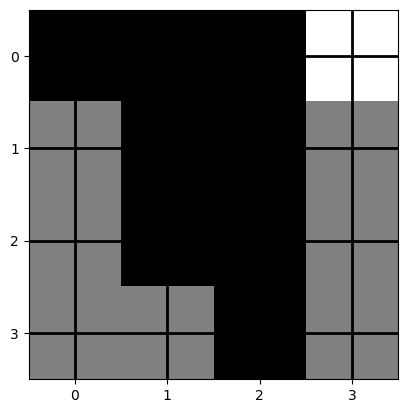

Step= 23
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


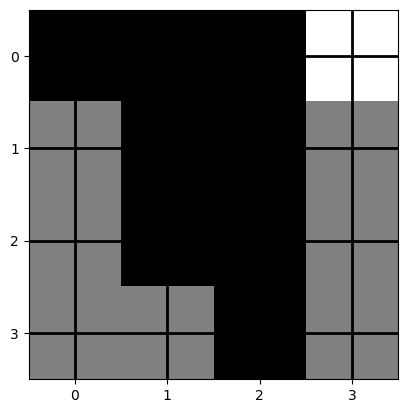

Step= 24
Current state= (0, 3)
Chosen action= 1
Reward= -5
Next state= (1, 3)


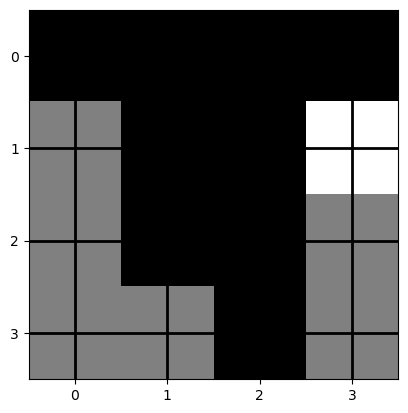

Step= 25
Current state= (1, 3)
Chosen action= 3
Reward= -5
Next state= (1, 2)


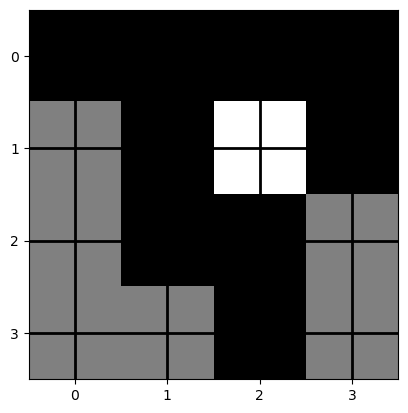

Step= 26
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


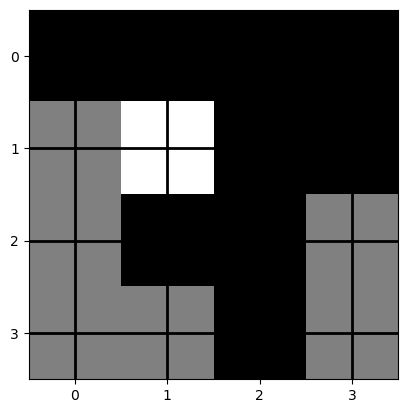

Step= 27
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


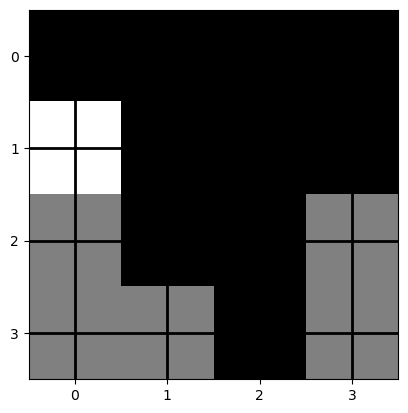

Step= 28
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


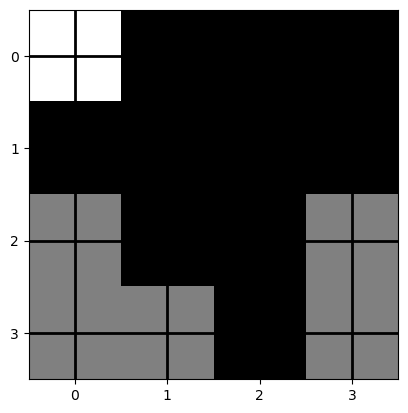

Step= 29
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


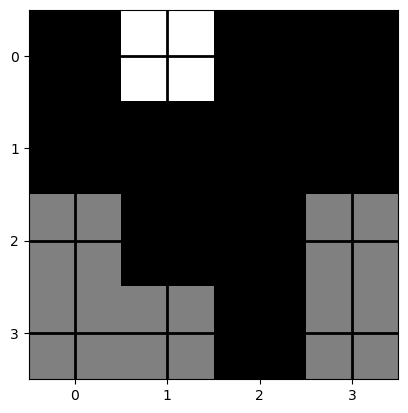

Step= 30
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


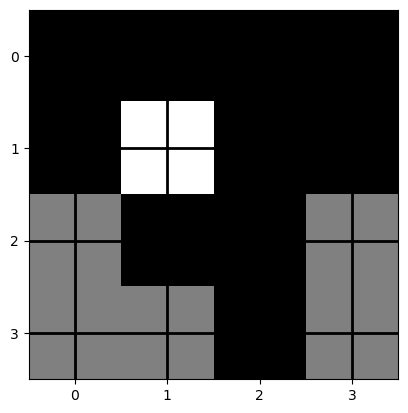

Step= 31
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


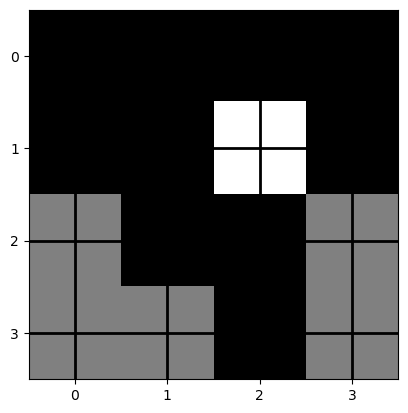

Step= 32
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


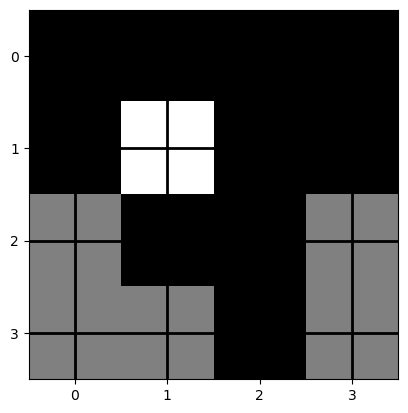

Step= 33
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


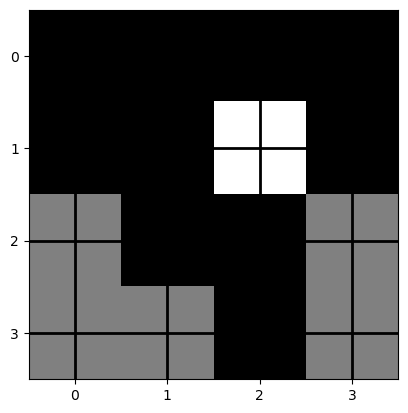

Step= 34
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


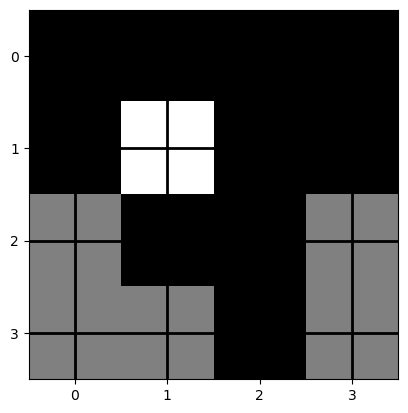

Step= 35
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


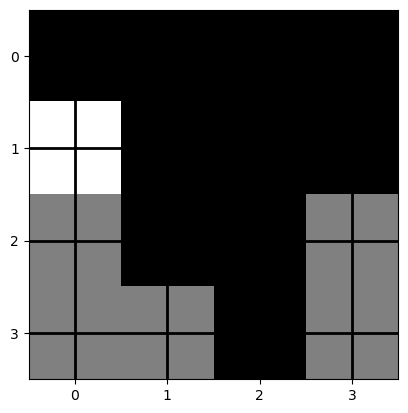

Step= 36
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


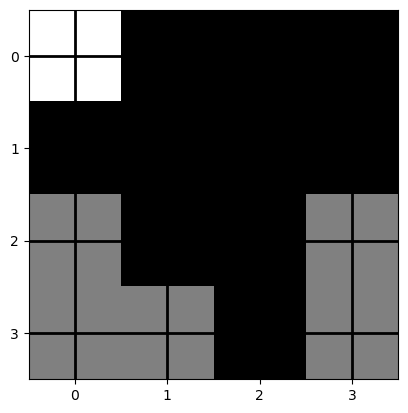

Step= 37
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


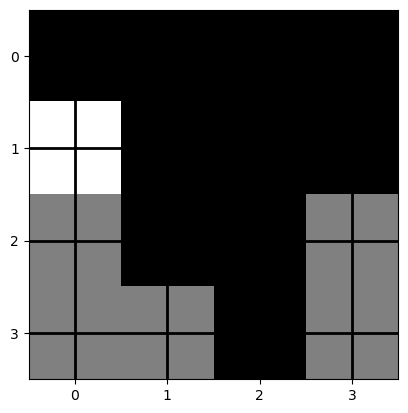

Step= 38
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


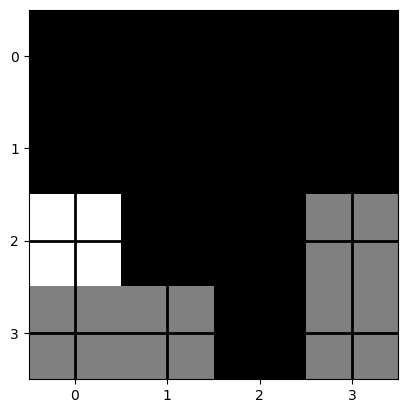

Step= 39
Current state= (2, 0)
Chosen action= 3
Reward= -5
Next state= (2, 0)


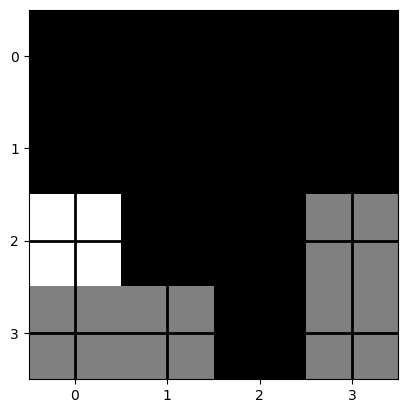

Step= 40
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


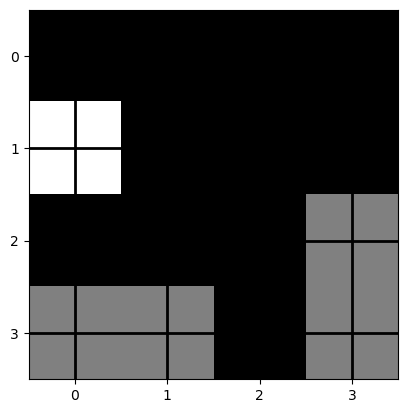

Step= 41
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


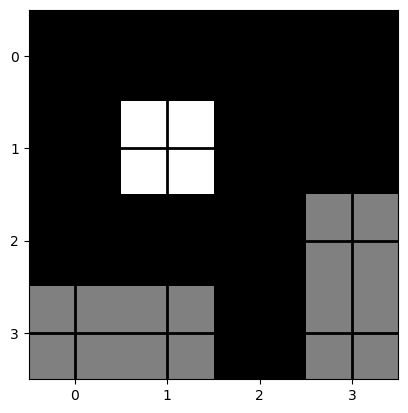

Step= 42
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


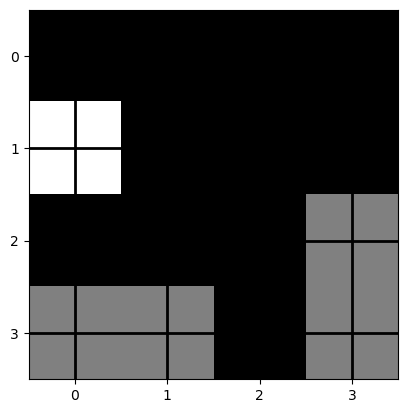

Step= 43
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


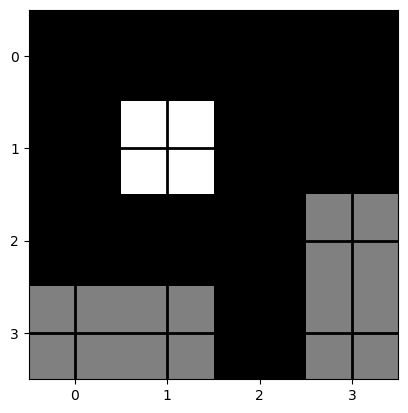

Step= 44
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


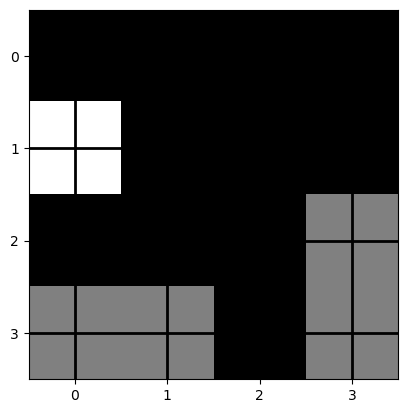

Step= 45
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


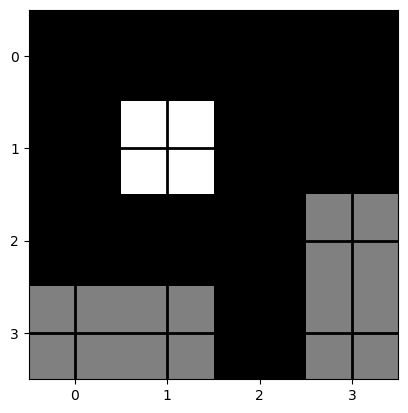

Step= 46
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


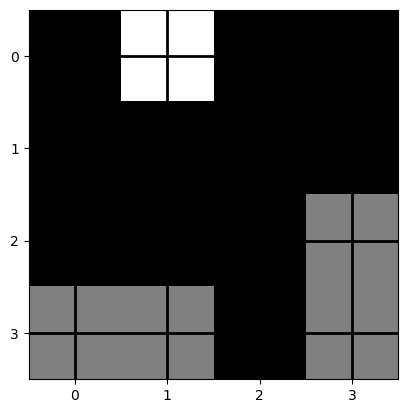

Step= 47
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


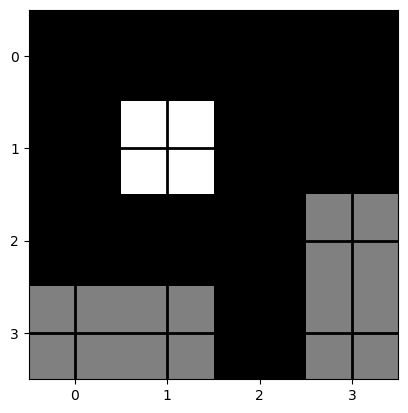

Step= 48
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


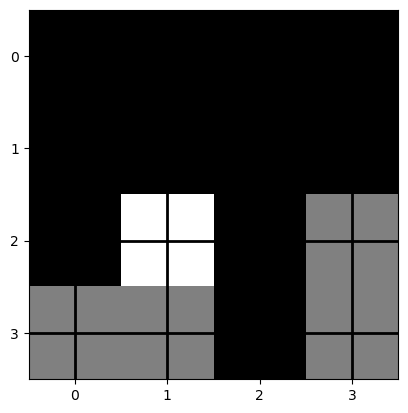

Step= 49
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


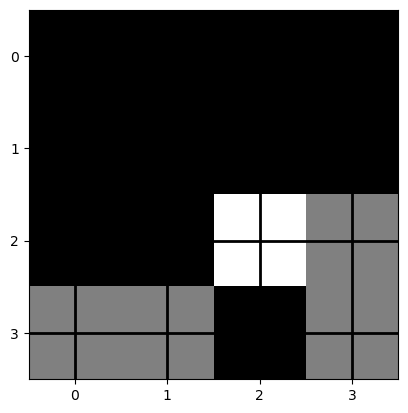

Step= 50
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


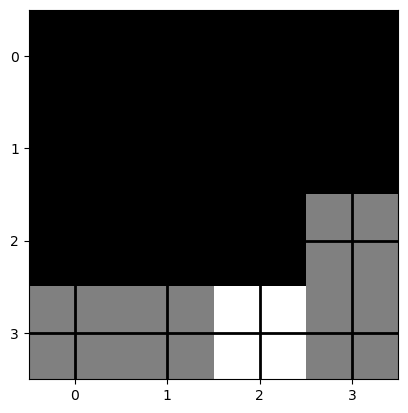

Step= 51
Current state= (3, 2)
Chosen action= 3
Reward= -5
Next state= (3, 1)


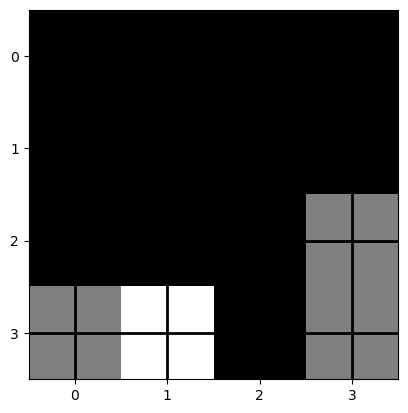

Step= 52
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


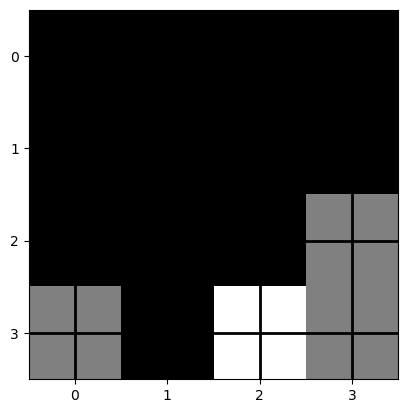

Step= 53
Current state= (3, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


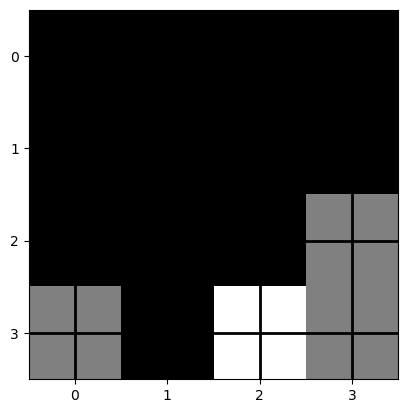

Step= 54
Current state= (3, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


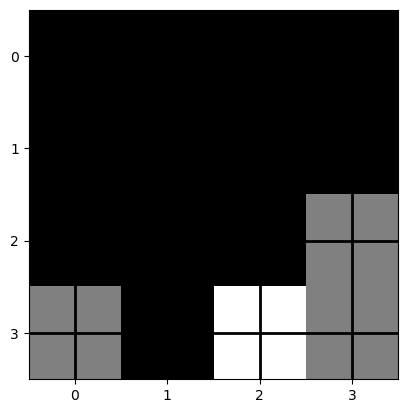

Step= 55
Current state= (3, 2)
Chosen action= 0
Reward= -5
Next state= (2, 2)


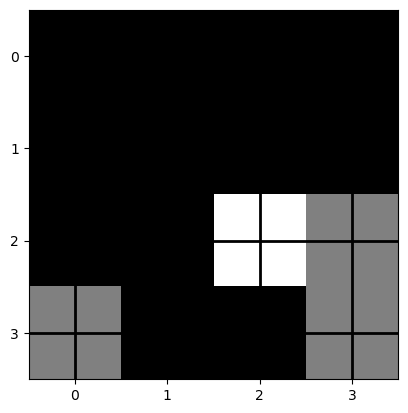

Step= 56
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


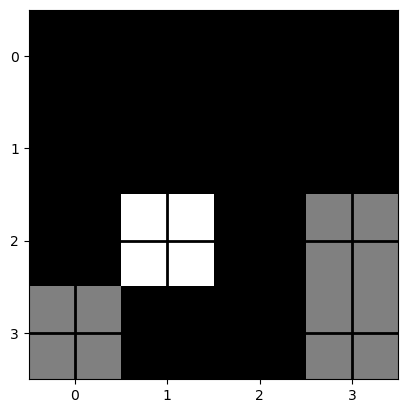

Step= 57
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


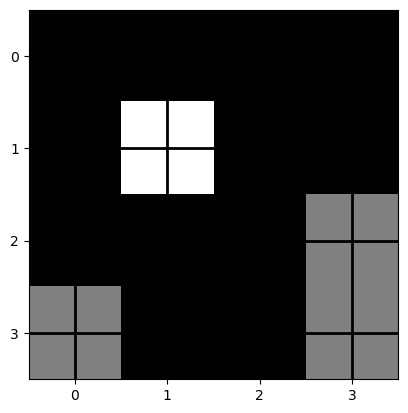

Step= 58
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


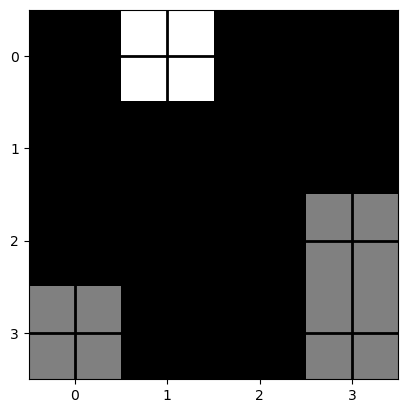

Step= 59
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


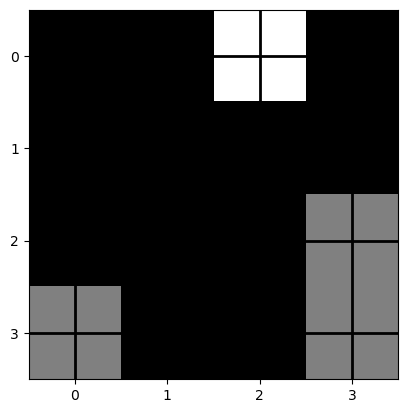

Step= 60
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


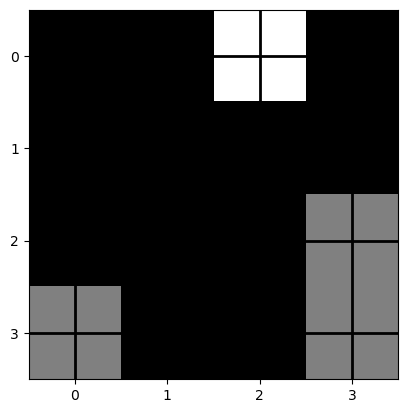

Step= 61
Current state= (0, 2)
Chosen action= 0
Reward= -5
Next state= (0, 2)


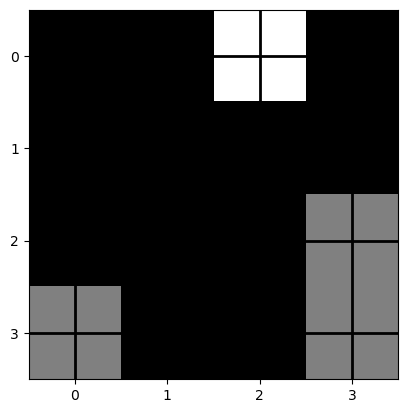

Step= 62
Current state= (0, 2)
Chosen action= 3
Reward= -5
Next state= (0, 1)


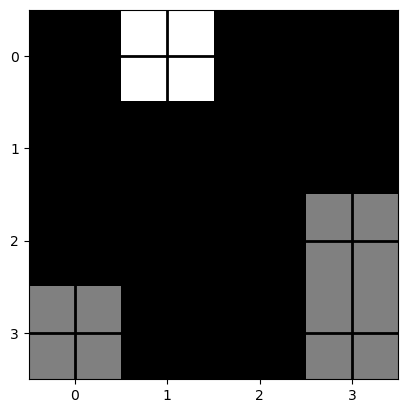

Step= 63
Current state= (0, 1)
Chosen action= 2
Reward= -5
Next state= (0, 2)


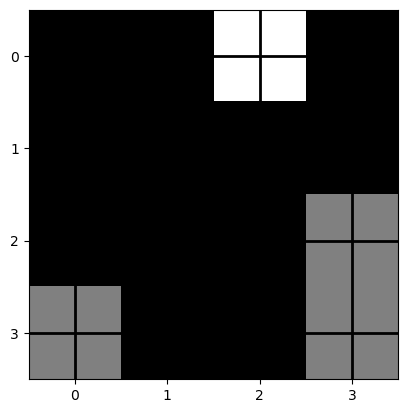

Step= 64
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


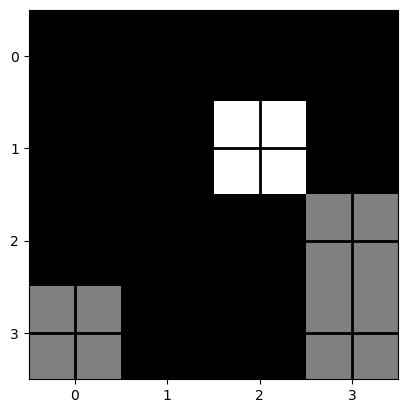

Step= 65
Current state= (1, 2)
Chosen action= 3
Reward= -5
Next state= (1, 1)


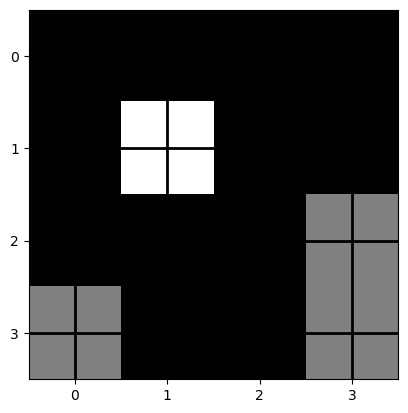

Step= 66
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


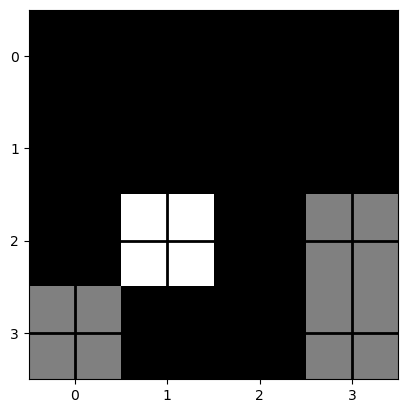

Step= 67
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


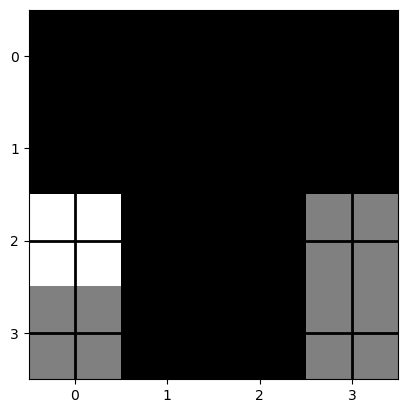

Step= 68
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


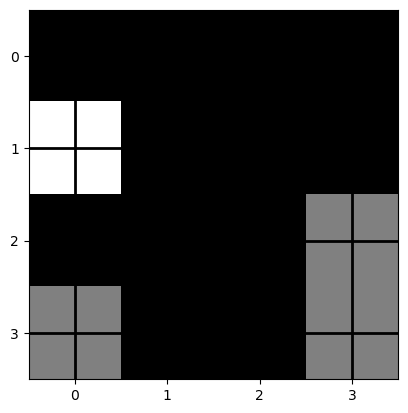

Step= 69
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


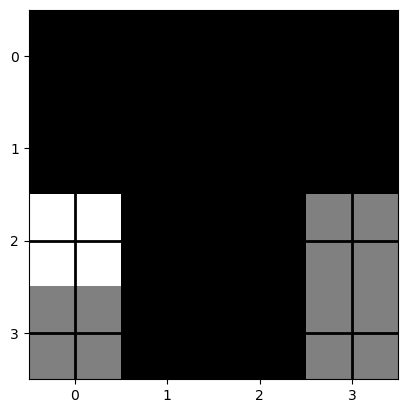

Step= 70
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


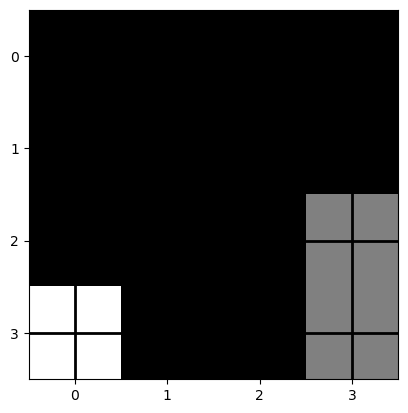

Step= 71
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


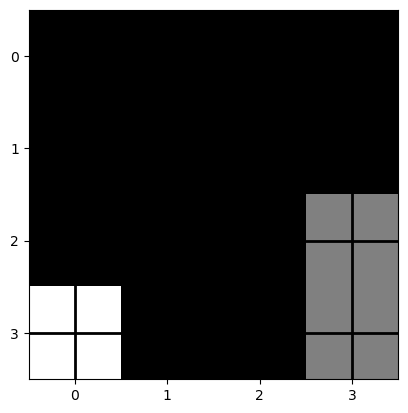

Step= 72
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


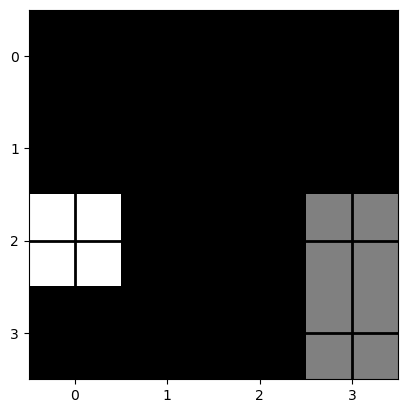

Step= 73
Current state= (2, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


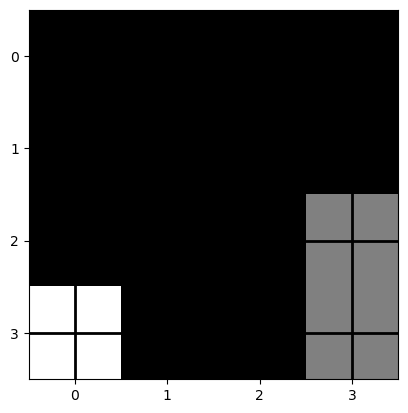

Step= 74
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


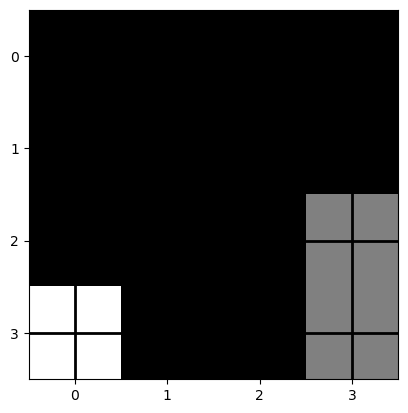

Step= 75
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


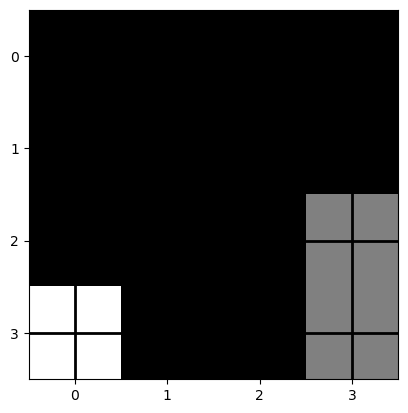

Step= 76
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


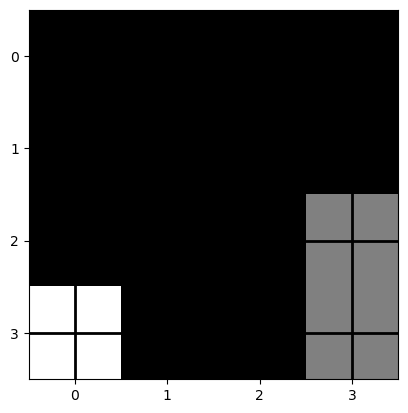

Step= 77
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


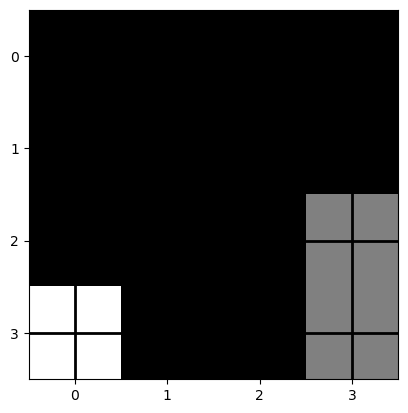

Step= 78
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


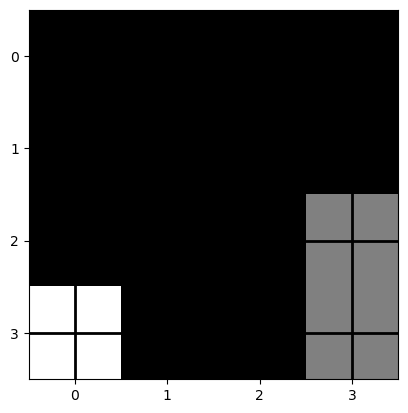

Step= 79
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


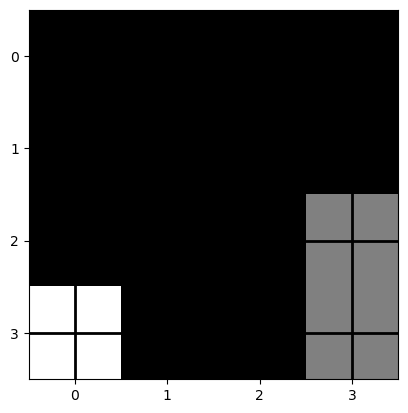

Step= 80
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


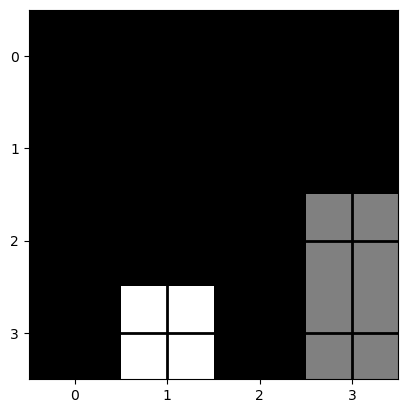

Step= 81
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


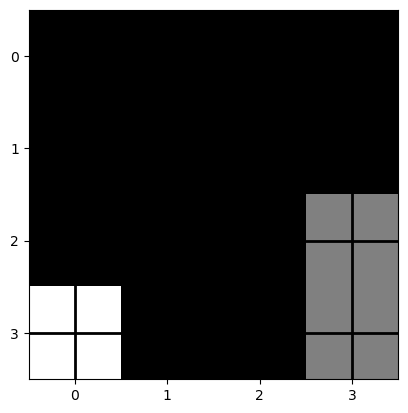

Step= 82
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


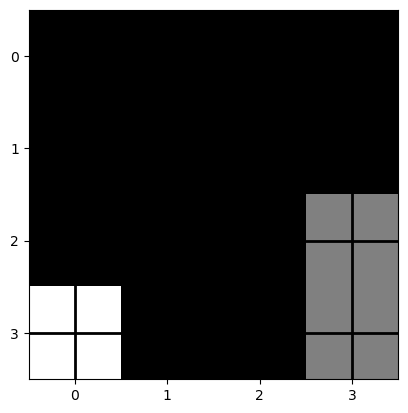

Step= 83
Current state= (3, 0)
Chosen action= 1
Reward= -5
Next state= (3, 0)


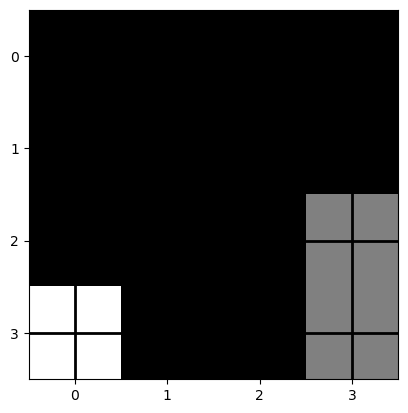

Step= 84
Current state= (3, 0)
Chosen action= 3
Reward= -5
Next state= (3, 0)


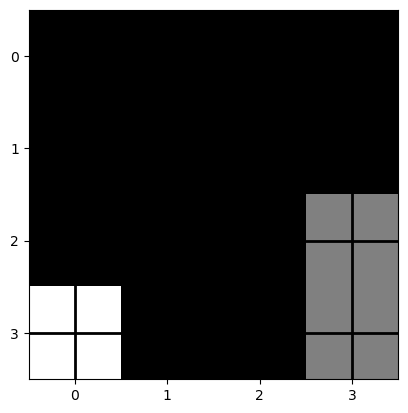

Step= 85
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


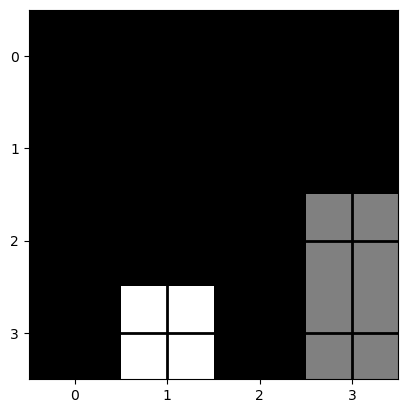

Step= 86
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


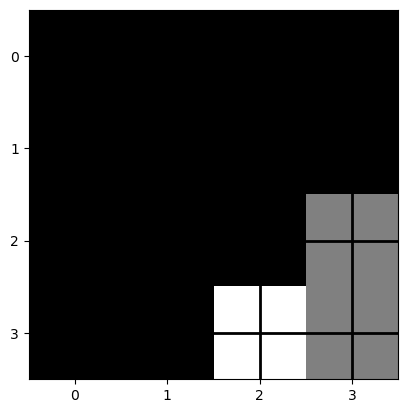

Step= 87
Current state= (3, 2)
Chosen action= 0
Reward= -5
Next state= (2, 2)


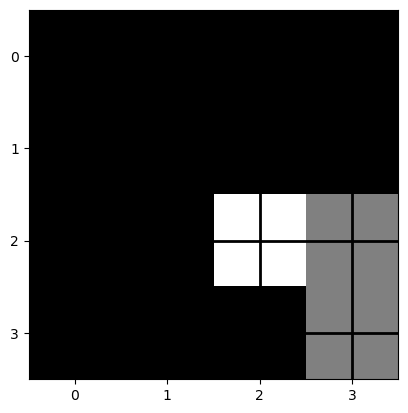

Step= 88
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


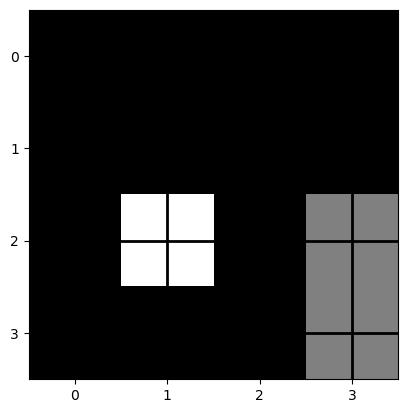

Step= 89
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


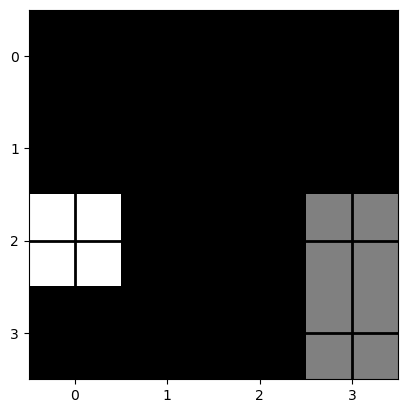

Step= 90
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


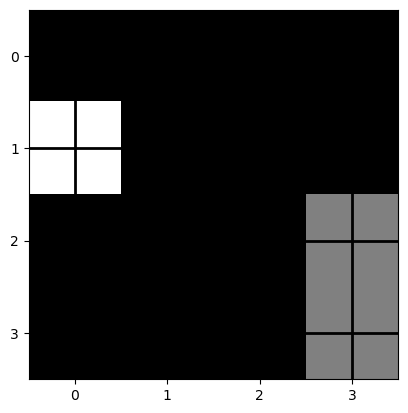

Step= 91
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


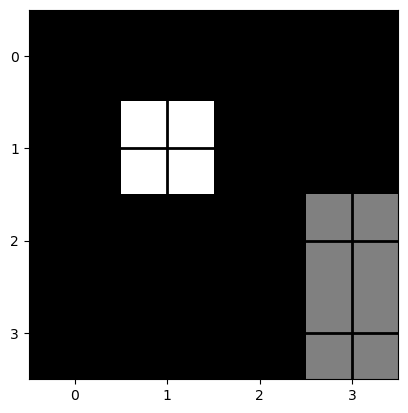

Step= 92
Current state= (1, 1)
Chosen action= 2
Reward= -5
Next state= (1, 2)


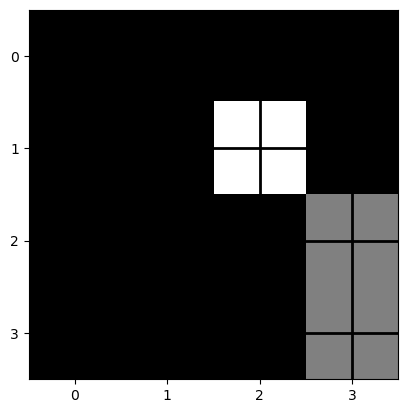

Step= 93
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


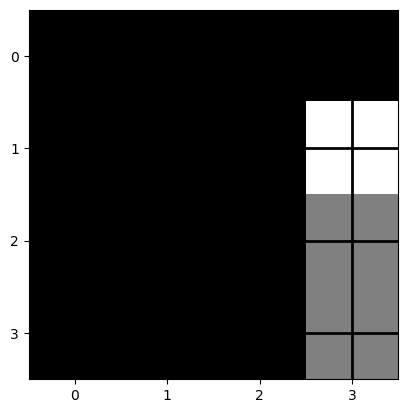

Step= 94
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


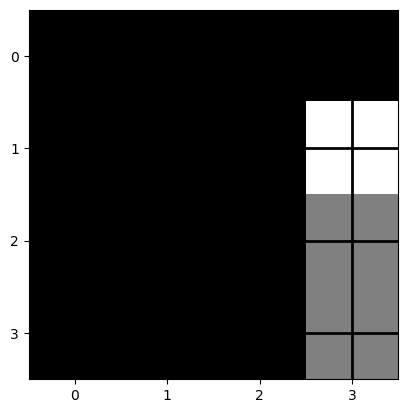

Step= 95
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


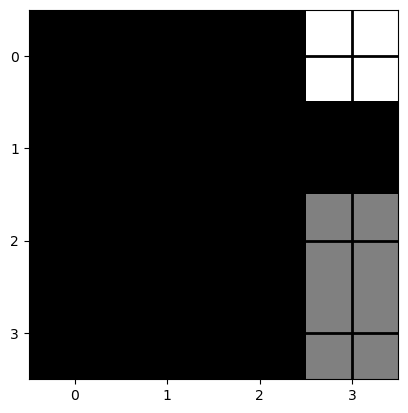

Step= 96
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


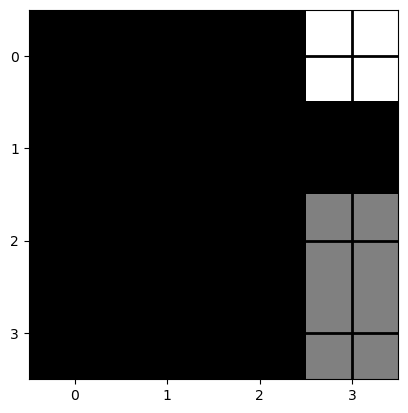

Step= 97
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


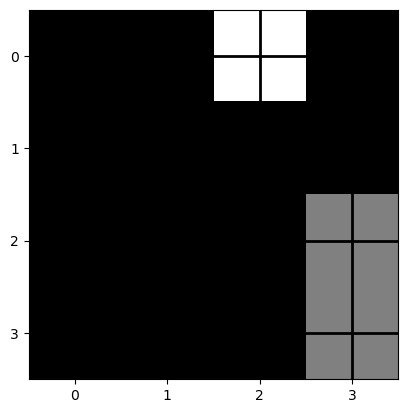

Step= 98
Current state= (0, 2)
Chosen action= 1
Reward= -5
Next state= (1, 2)


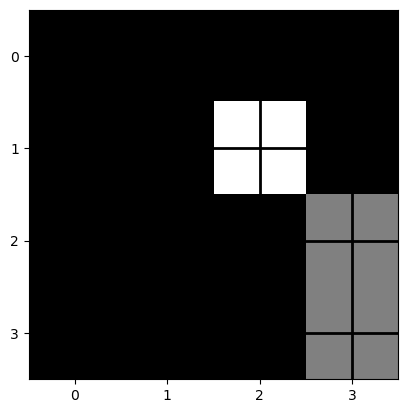

Step= 99
Current state= (1, 2)
Chosen action= 1
Reward= -5
Next state= (2, 2)


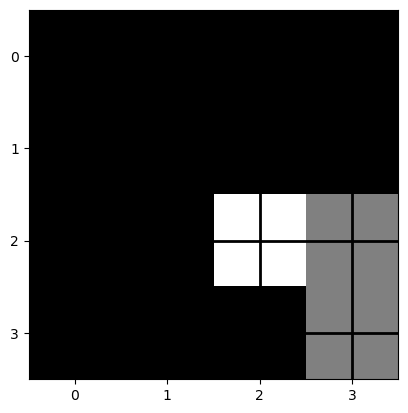

Step= 100
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


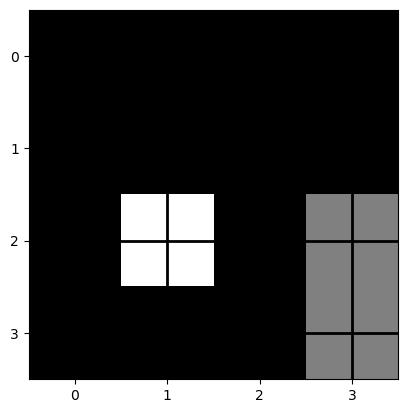

Step= 101
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


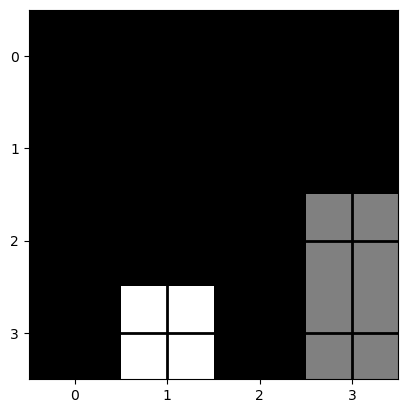

Step= 102
Current state= (3, 1)
Chosen action= 0
Reward= -5
Next state= (2, 1)


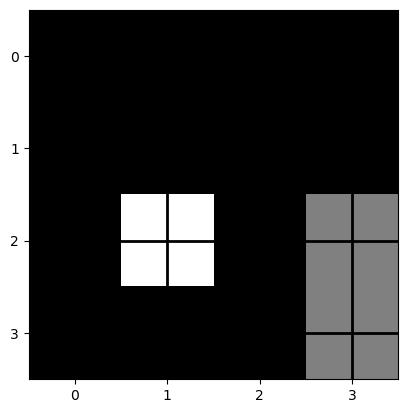

Step= 103
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


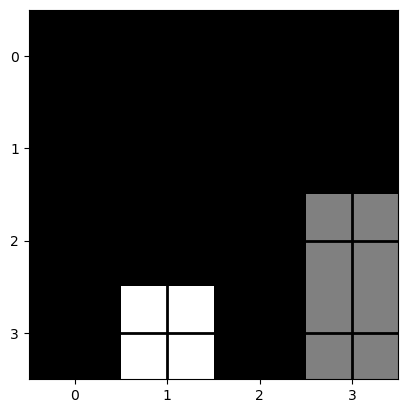

Step= 104
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


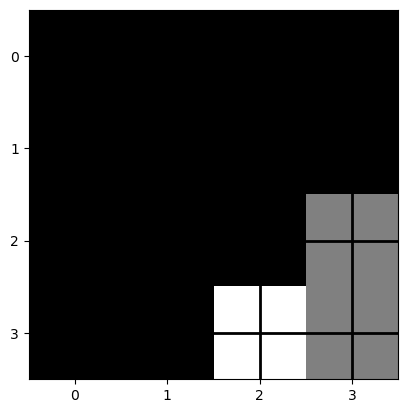

Step= 105
Current state= (3, 2)
Chosen action= 3
Reward= -5
Next state= (3, 1)


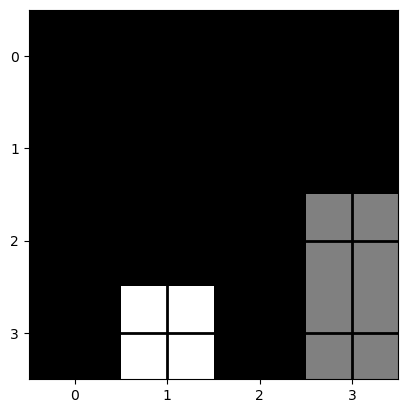

Step= 106
Current state= (3, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


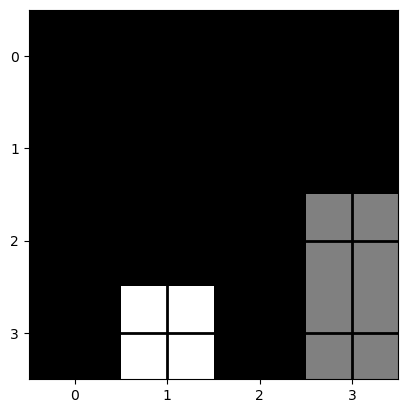

Step= 107
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


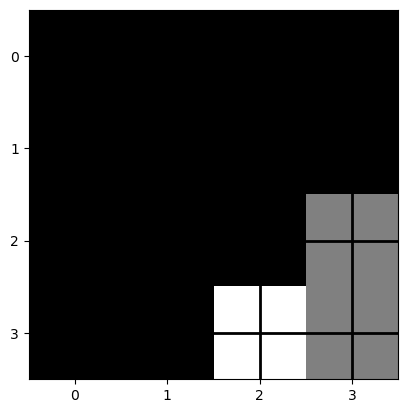

Step= 108
Current state= (3, 2)
Chosen action= 3
Reward= -5
Next state= (3, 1)


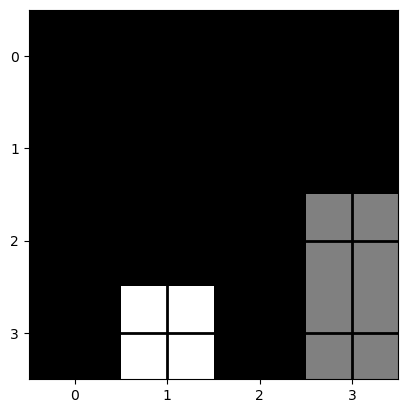

Step= 109
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


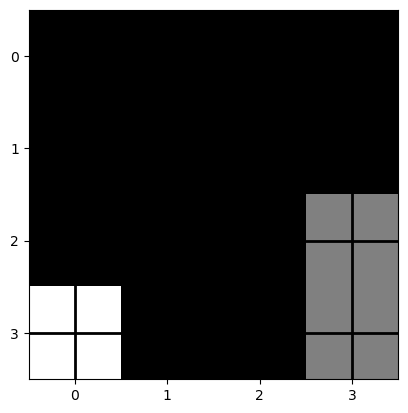

Step= 110
Current state= (3, 0)
Chosen action= 2
Reward= -5
Next state= (3, 1)


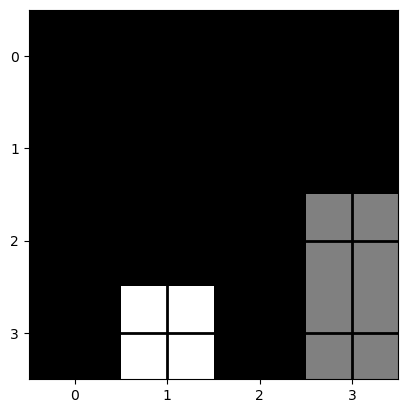

Step= 111
Current state= (3, 1)
Chosen action= 2
Reward= -5
Next state= (3, 2)


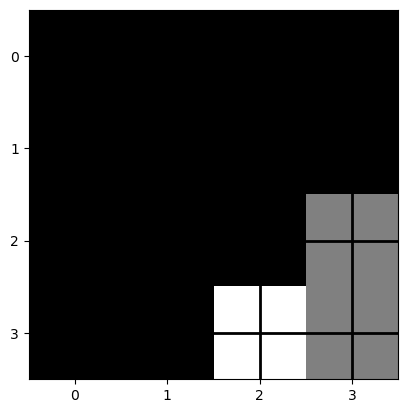

Step= 112
Current state= (3, 2)
Chosen action= 2
Reward= 0
Next state= (3, 3)


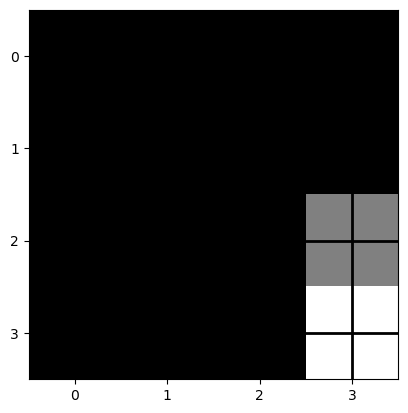

Episode ended in 112 timesteps
This episode's reward is = -555
Step= 2
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


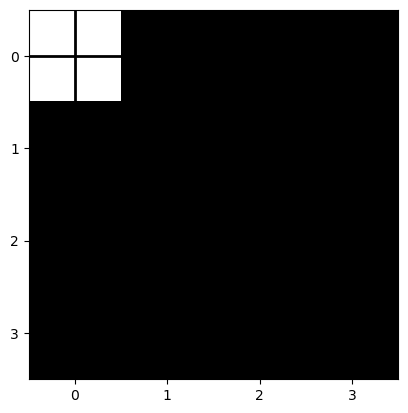

Step= 3
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


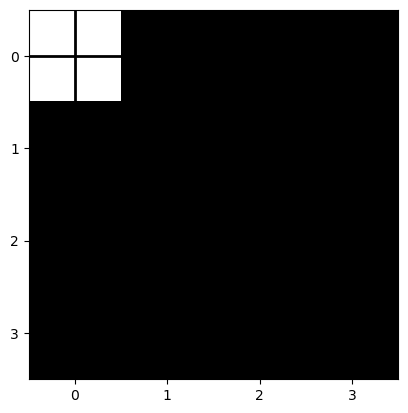

Step= 4
Current state= (0, 0)
Chosen action= 3
Reward= -5
Next state= (0, 0)


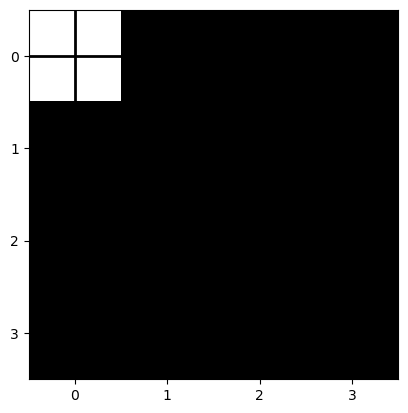

Step= 5
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


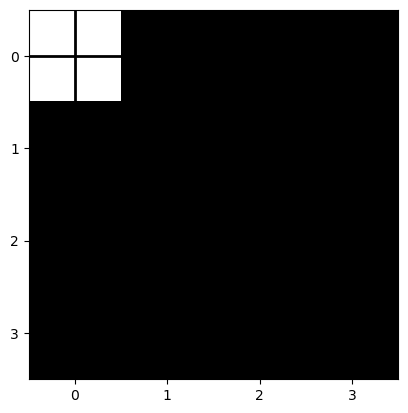

Step= 6
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


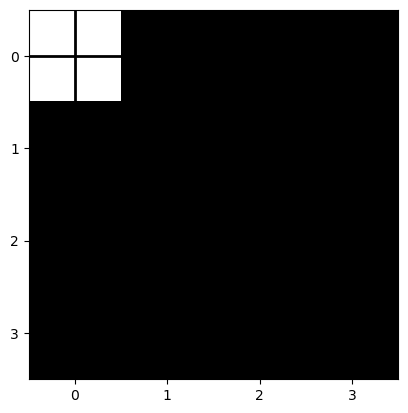

Step= 7
Current state= (0, 0)
Chosen action= 2
Reward= -5
Next state= (0, 1)


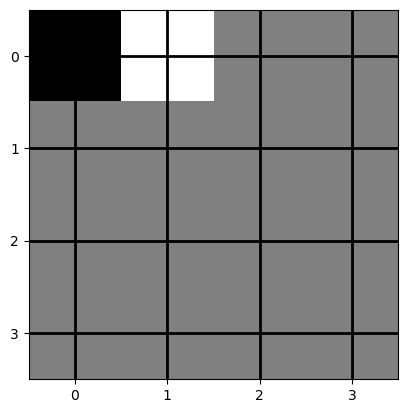

Step= 8
Current state= (0, 1)
Chosen action= 3
Reward= -5
Next state= (0, 0)


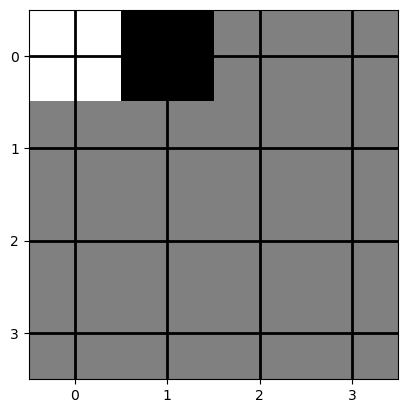

Step= 9
Current state= (0, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


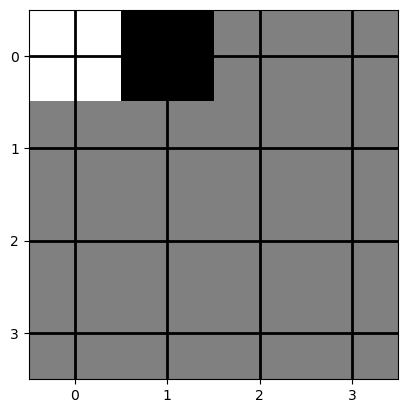

Step= 10
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


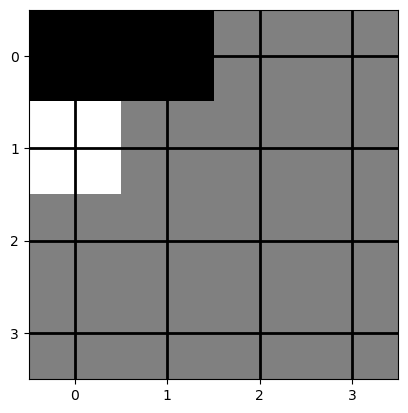

Step= 11
Current state= (1, 0)
Chosen action= 1
Reward= -5
Next state= (2, 0)


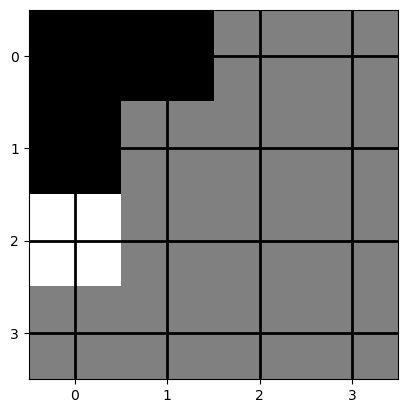

Step= 12
Current state= (2, 0)
Chosen action= 0
Reward= -5
Next state= (1, 0)


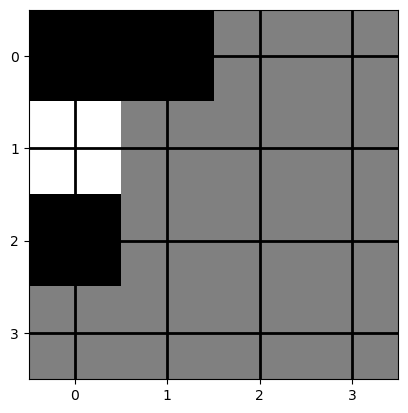

Step= 13
Current state= (1, 0)
Chosen action= 0
Reward= -5
Next state= (0, 0)


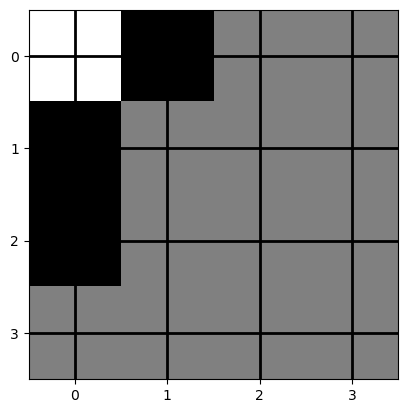

Step= 14
Current state= (0, 0)
Chosen action= 1
Reward= -5
Next state= (1, 0)


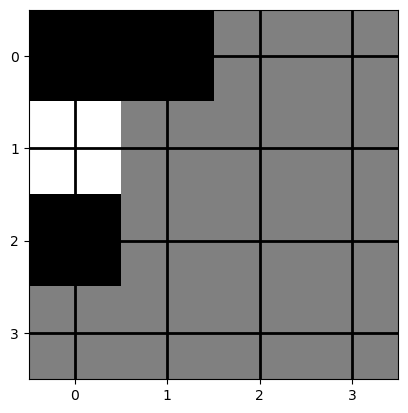

Step= 15
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


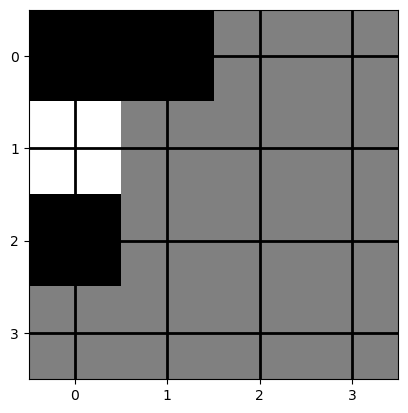

Step= 16
Current state= (1, 0)
Chosen action= 3
Reward= -5
Next state= (1, 0)


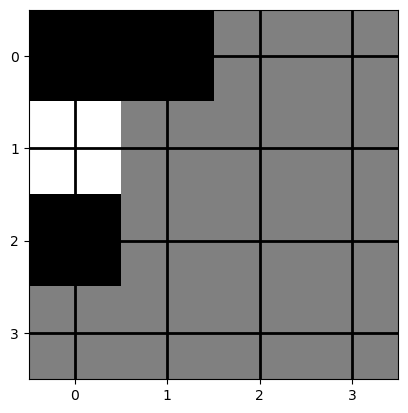

Step= 17
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


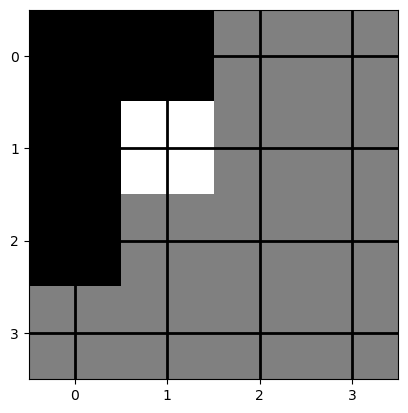

Step= 18
Current state= (1, 1)
Chosen action= 0
Reward= -5
Next state= (0, 1)


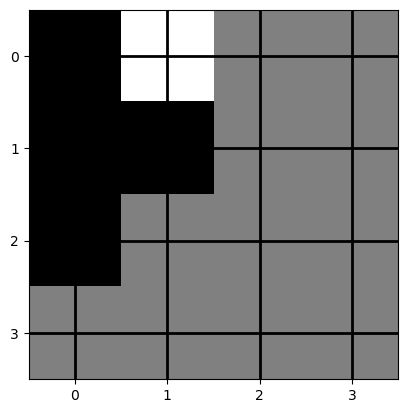

Step= 19
Current state= (0, 1)
Chosen action= 1
Reward= -5
Next state= (1, 1)


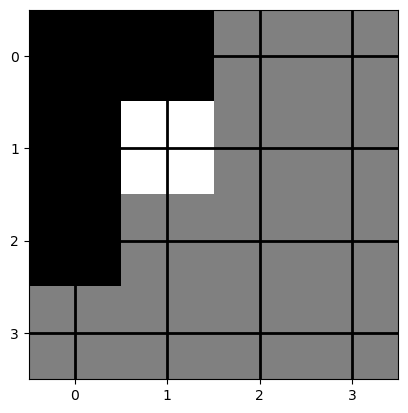

Step= 20
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


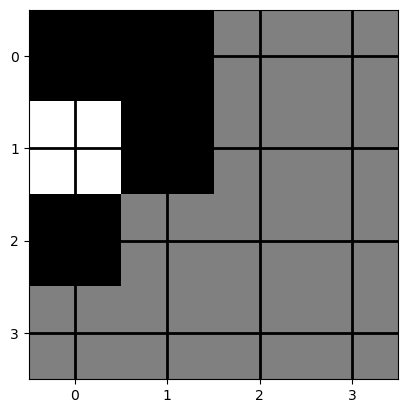

Step= 21
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


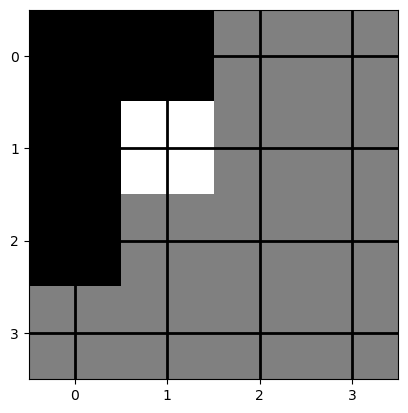

Step= 22
Current state= (1, 1)
Chosen action= 3
Reward= -5
Next state= (1, 0)


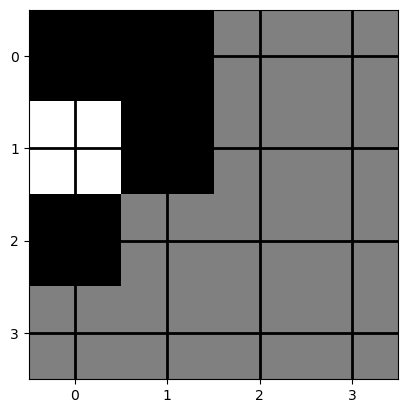

Step= 23
Current state= (1, 0)
Chosen action= 2
Reward= -5
Next state= (1, 1)


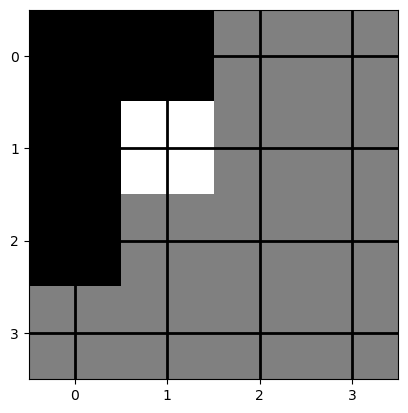

Step= 24
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


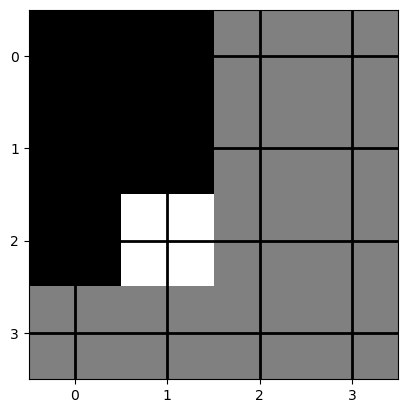

Step= 25
Current state= (2, 1)
Chosen action= 3
Reward= -5
Next state= (2, 0)


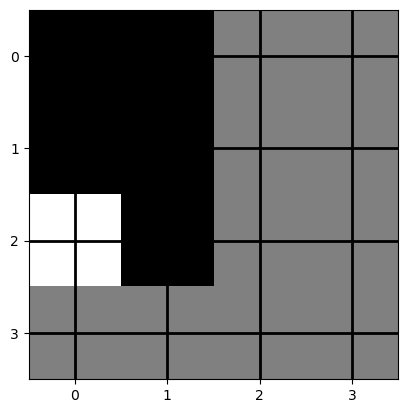

Step= 26
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


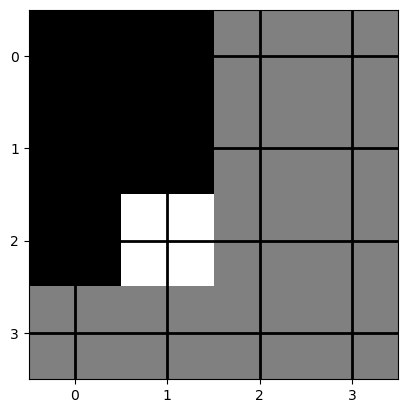

Step= 27
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


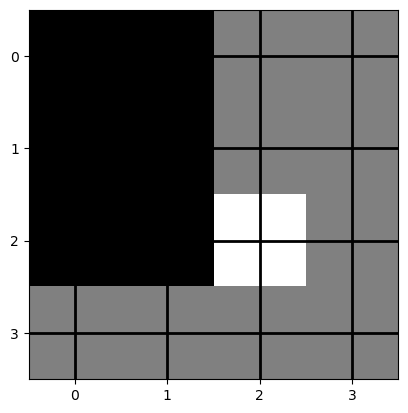

Step= 28
Current state= (2, 2)
Chosen action= 3
Reward= -5
Next state= (2, 1)


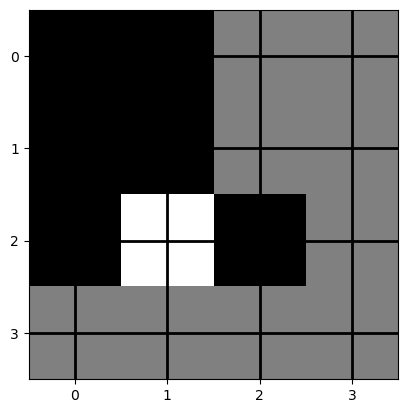

Step= 29
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


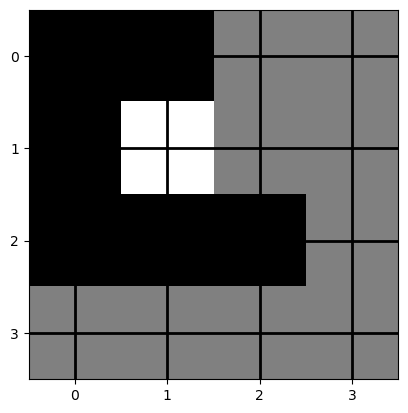

Step= 30
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


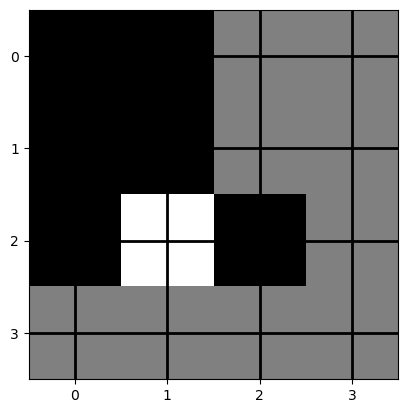

Step= 31
Current state= (2, 1)
Chosen action= 0
Reward= -5
Next state= (1, 1)


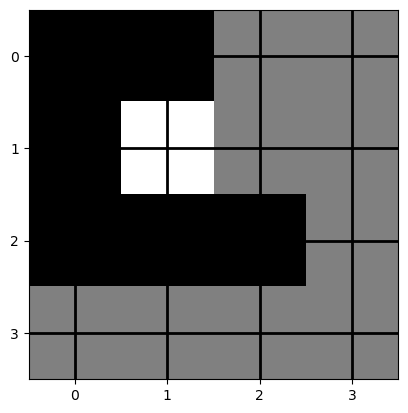

Step= 32
Current state= (1, 1)
Chosen action= 1
Reward= -5
Next state= (2, 1)


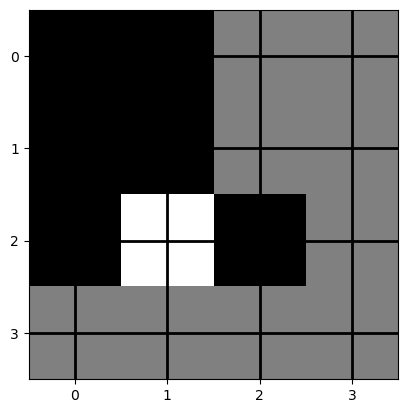

Step= 33
Current state= (2, 1)
Chosen action= 1
Reward= -5
Next state= (3, 1)


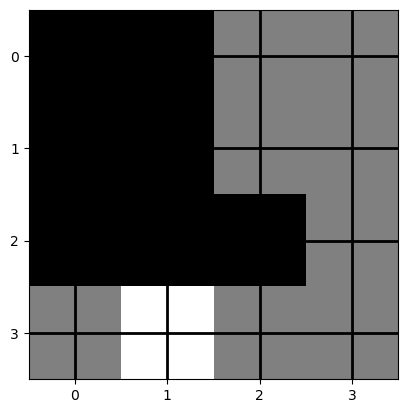

Step= 34
Current state= (3, 1)
Chosen action= 3
Reward= -5
Next state= (3, 0)


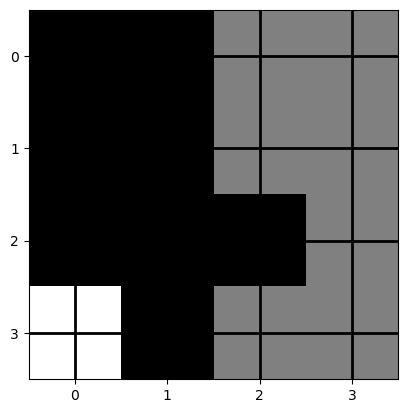

Step= 35
Current state= (3, 0)
Chosen action= 0
Reward= -5
Next state= (2, 0)


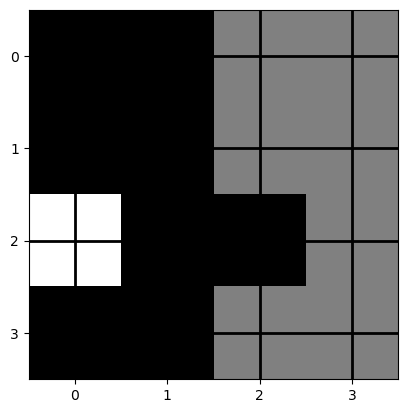

Step= 36
Current state= (2, 0)
Chosen action= 2
Reward= -5
Next state= (2, 1)


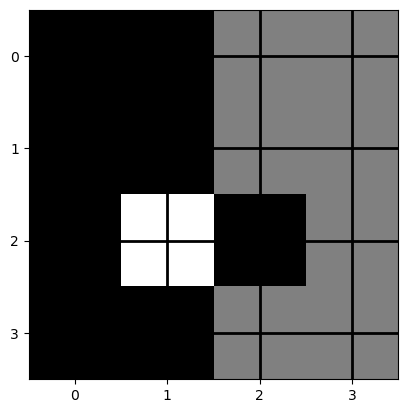

Step= 37
Current state= (2, 1)
Chosen action= 2
Reward= -5
Next state= (2, 2)


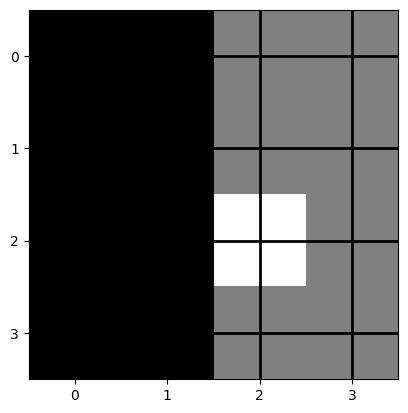

Step= 38
Current state= (2, 2)
Chosen action= 0
Reward= -5
Next state= (1, 2)


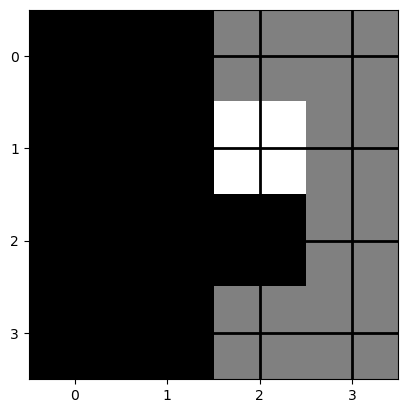

Step= 39
Current state= (1, 2)
Chosen action= 2
Reward= -5
Next state= (1, 3)


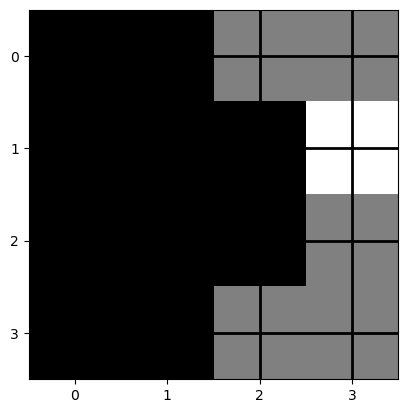

Step= 40
Current state= (1, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


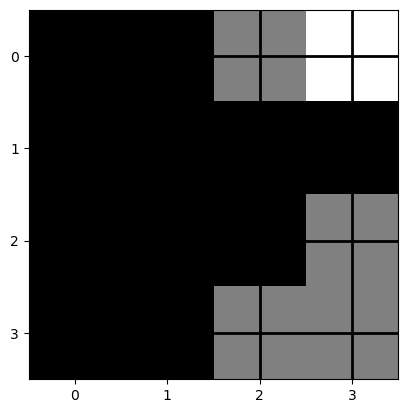

Step= 41
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


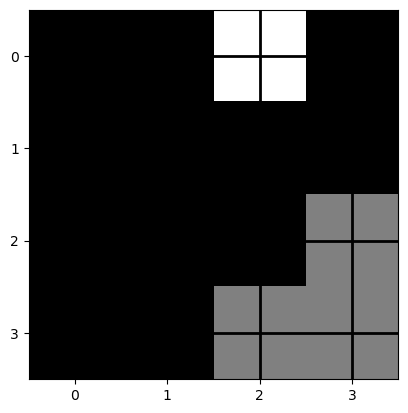

Step= 42
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


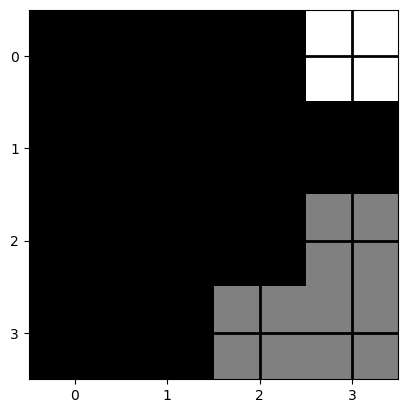

Step= 43
Current state= (0, 3)
Chosen action= 2
Reward= -5
Next state= (0, 3)


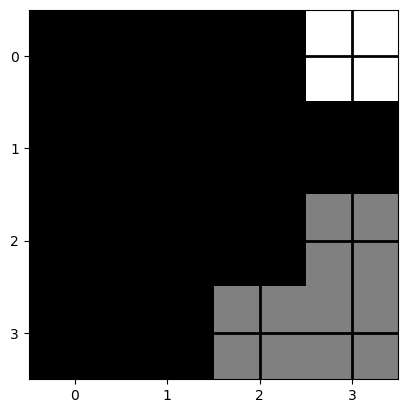

Step= 44
Current state= (0, 3)
Chosen action= 0
Reward= -5
Next state= (0, 3)


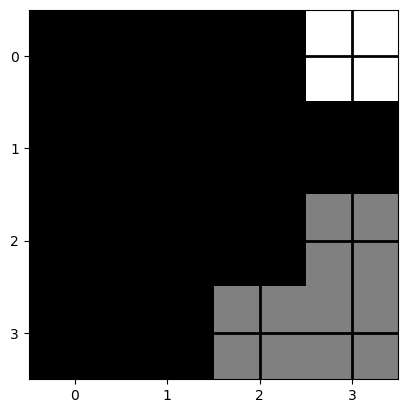

Step= 45
Current state= (0, 3)
Chosen action= 3
Reward= -5
Next state= (0, 2)


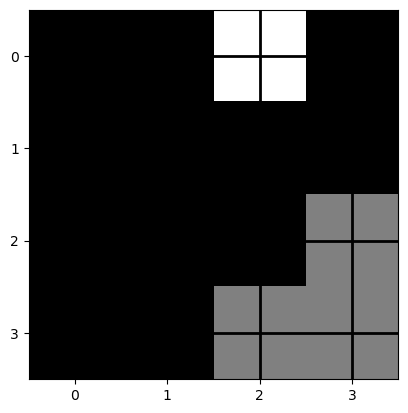

Step= 46
Current state= (0, 2)
Chosen action= 2
Reward= -5
Next state= (0, 3)


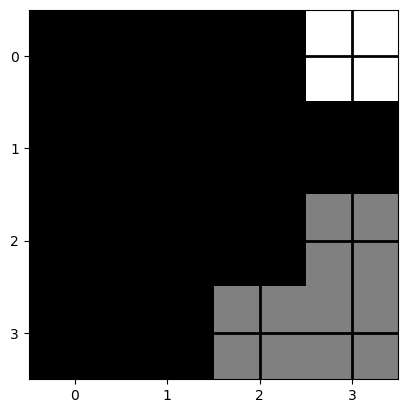

Step= 47
Current state= (0, 3)
Chosen action= 1
Reward= -5
Next state= (1, 3)


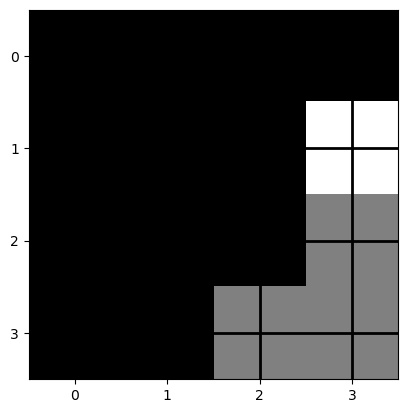

Step= 48
Current state= (1, 3)
Chosen action= 2
Reward= -5
Next state= (1, 3)


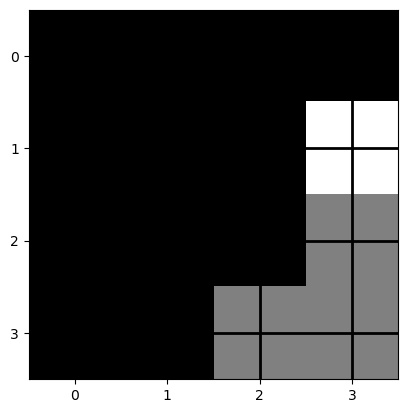

Step= 49
Current state= (1, 3)
Chosen action= 1
Reward= -5
Next state= (2, 3)


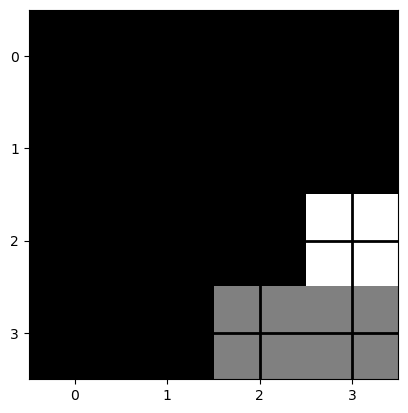

Step= 50
Current state= (2, 3)
Chosen action= 2
Reward= -5
Next state= (2, 3)


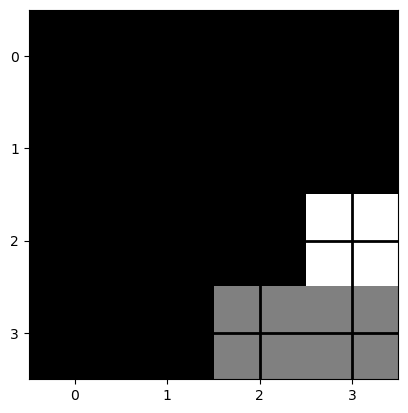

Step= 51
Current state= (2, 3)
Chosen action= 3
Reward= -5
Next state= (2, 2)


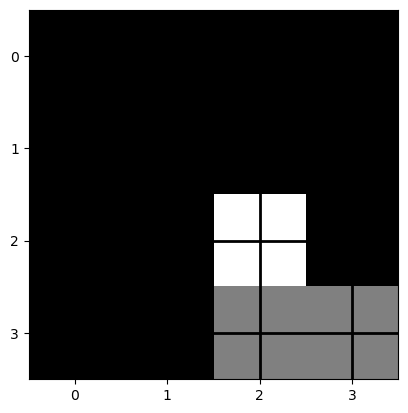

Step= 52
Current state= (2, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


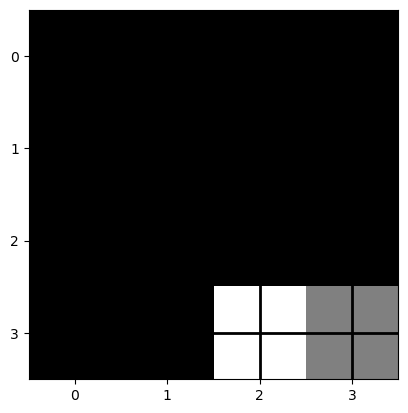

Step= 53
Current state= (3, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


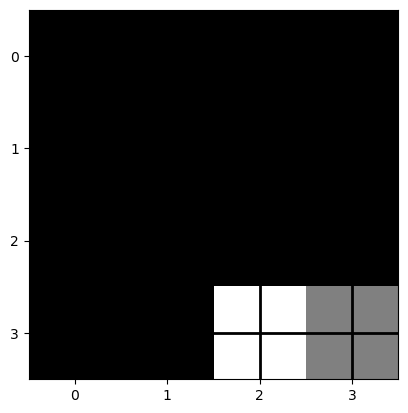

Step= 54
Current state= (3, 2)
Chosen action= 1
Reward= -5
Next state= (3, 2)


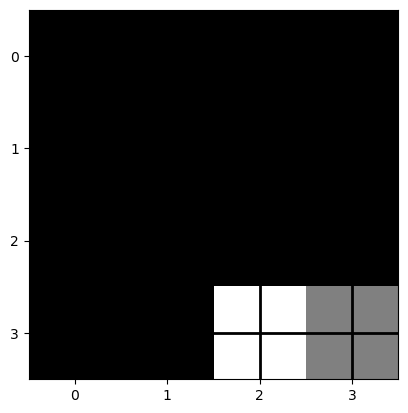

Step= 55
Current state= (3, 2)
Chosen action= 2
Reward= 0
Next state= (3, 3)


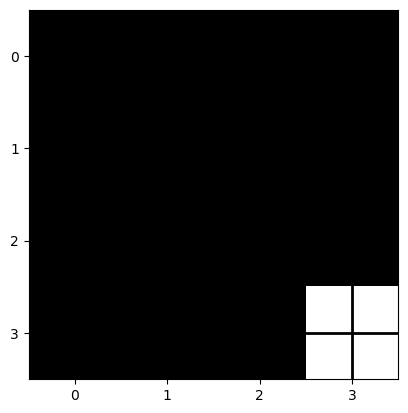

Episode ended in 55 timesteps
This episode's reward is = -270


In [5]:
env = mars_exploration_rover(n=4, exploration_reward=0, exploration_penalty=-5, move_penalty=-1)
simulate(env)


# Part 2 step 1

In [6]:
def sarsa(env, num_episodes, alpha, gamma, epsilon,mode='non tuned'):
    def epsilon_greedy_policy(Q, state, epsilon):
        if np.random.uniform() < epsilon:
            return np.random.randint(Q[state].size)
        else:
            return np.argmax(Q[state])
    
    Q = defaultdict(lambda: np.zeros(env.possible_action.n))
    rewards = []
    epsilon_decay = epsilon / num_episodes 

    for episode in range(num_episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        episode_reward = 0
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            td_error = reward + gamma * Q[next_state][next_action] - Q[state][action]
            Q[state][action] += alpha * td_error
            episode_reward += reward
            state = next_state
            action = next_action
            if done:
                break

        rewards.append(episode_reward)

        
        epsilon=epsilon-epsilon_decay

    return Q, rewards


'''def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.randint(Q[state].size)
    else:
        return np.argmax(Q[state])'''





'def epsilon_greedy_policy(Q, state, epsilon):\n    if np.random.uniform() < epsilon:\n        return np.random.randint(Q[state].size)\n    else:\n        return np.argmax(Q[state])'

In [7]:
env = mars_exploration_rover(n=4, exploration_reward=0, exploration_penalty=-5, move_penalty=-1)
num_episodes = 5000
alpha = 0.5
gamma = 0.9
epsilon = 1.0
Q, rewards_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)


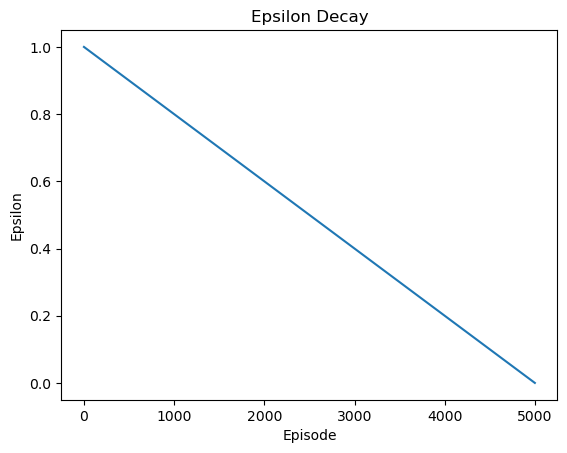

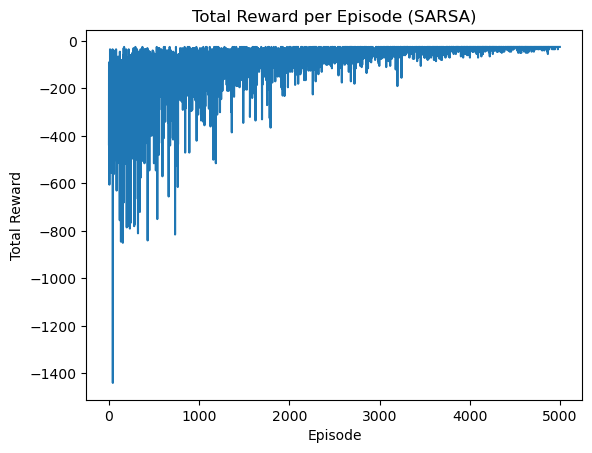

In [8]:
epsilon_values = np.linspace(epsilon, 0, num_episodes)
plt.plot(range(num_episodes), epsilon_values)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")

plt.figure()
plt.plot(range(num_episodes), rewards_sarsa)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode (SARSA)")

plt.show()

In [9]:
env = mars_exploration_rover(n=4, exploration_reward=0, exploration_penalty=-5, move_penalty=-1)
q_values, sarsa_rewards = sarsa(env, num_episodes=5000, alpha=0.5, gamma=0.9, epsilon=0.1,mode='non tuned')


print('\nvalues to be used in Q table in the further steps \n',q_values)



values to be used in Q table in the further steps 
 defaultdict(<function sarsa.<locals>.<lambda> at 0x000001CD481AC1F0>, {(0, 0): array([-25.24775126, -20.4755    , -22.638822  , -24.16019518]), (1, 0): array([-25.34641737, -17.195     , -22.36684596, -21.35166968]), (0, 1): array([-23.31344044, -22.10484557, -18.00288977, -26.82112928]), (2, 0): array([-24.88779645, -14.99948299, -13.55      , -17.83453638]), (1, 1): array([-23.76747126, -17.29566998, -13.76985926, -24.46450732]), (0, 2): array([-18.22652615, -17.08707163, -13.83322534, -23.50515397]), (1, 2): array([-19.36180263, -12.72368191,  -9.52035734, -20.90773927]), (0, 3): array([-16.1766728 ,  -9.5436288 , -17.4950876 , -19.61994019]), (1, 3): array([-15.41220032,  -5.        , -12.07239788, -14.89550643]), (2, 1): array([-17.90217202,  -9.5       , -14.98250732, -17.7015753 ]), (2, 2): array([-13.71593887,  -8.58186879,  -5.        , -17.81719906]), (2, 3): array([-15.3789195 ,   0.        ,  -5.00255504, -10.77624244]), 

In [10]:
print('\nrewards', sarsa_rewards)


rewards [-380, -100, -60, -175, -50, -55, -45, -125, -85, -55, -75, -95, -35, -25, -70, -35, -25, -25, -55, -25, -55, -35, -75, -40, -35, -55, -25, -75, -35, -30, -25, -35, -35, -25, -25, -25, -55, -35, -25, -25, -25, -25, -35, -25, -40, -35, -25, -25, -30, -35, -35, -25, -25, -55, -40, -25, -40, -30, -35, -25, -25, -25, -30, -25, -25, -25, -35, -35, -25, -25, -55, -25, -25, -35, -30, -25, -25, -25, -25, -25, -25, -25, -25, -25, -25, -25, -25, -35, -25, -25, -35, -25, -25, -25, -35, -35, -45, -25, -30, -35, -35, -25, -25, -25, -25, -35, -45, -25, -25, -45, -30, -35, -25, -25, -25, -30, -25, -25, -40, -25, -25, -25, -25, -25, -25, -25, -30, -25, -40, -25, -25, -30, -25, -35, -45, -25, -35, -25, -30, -25, -25, -30, -25, -25, -25, -35, -25, -25, -25, -35, -25, -30, -25, -30, -25, -25, -25, -25, -25, -30, -35, -25, -25, -25, -40, -25, -25, -30, -30, -25, -25, -25, -25, -25, -25, -25, -30, -25, -25, -25, -25, -40, -25, -25, -25, -25, -25, -25, -25, -25, -25, -25, -35, -40, -40, -25, -25, -

### Part 2 Step 2

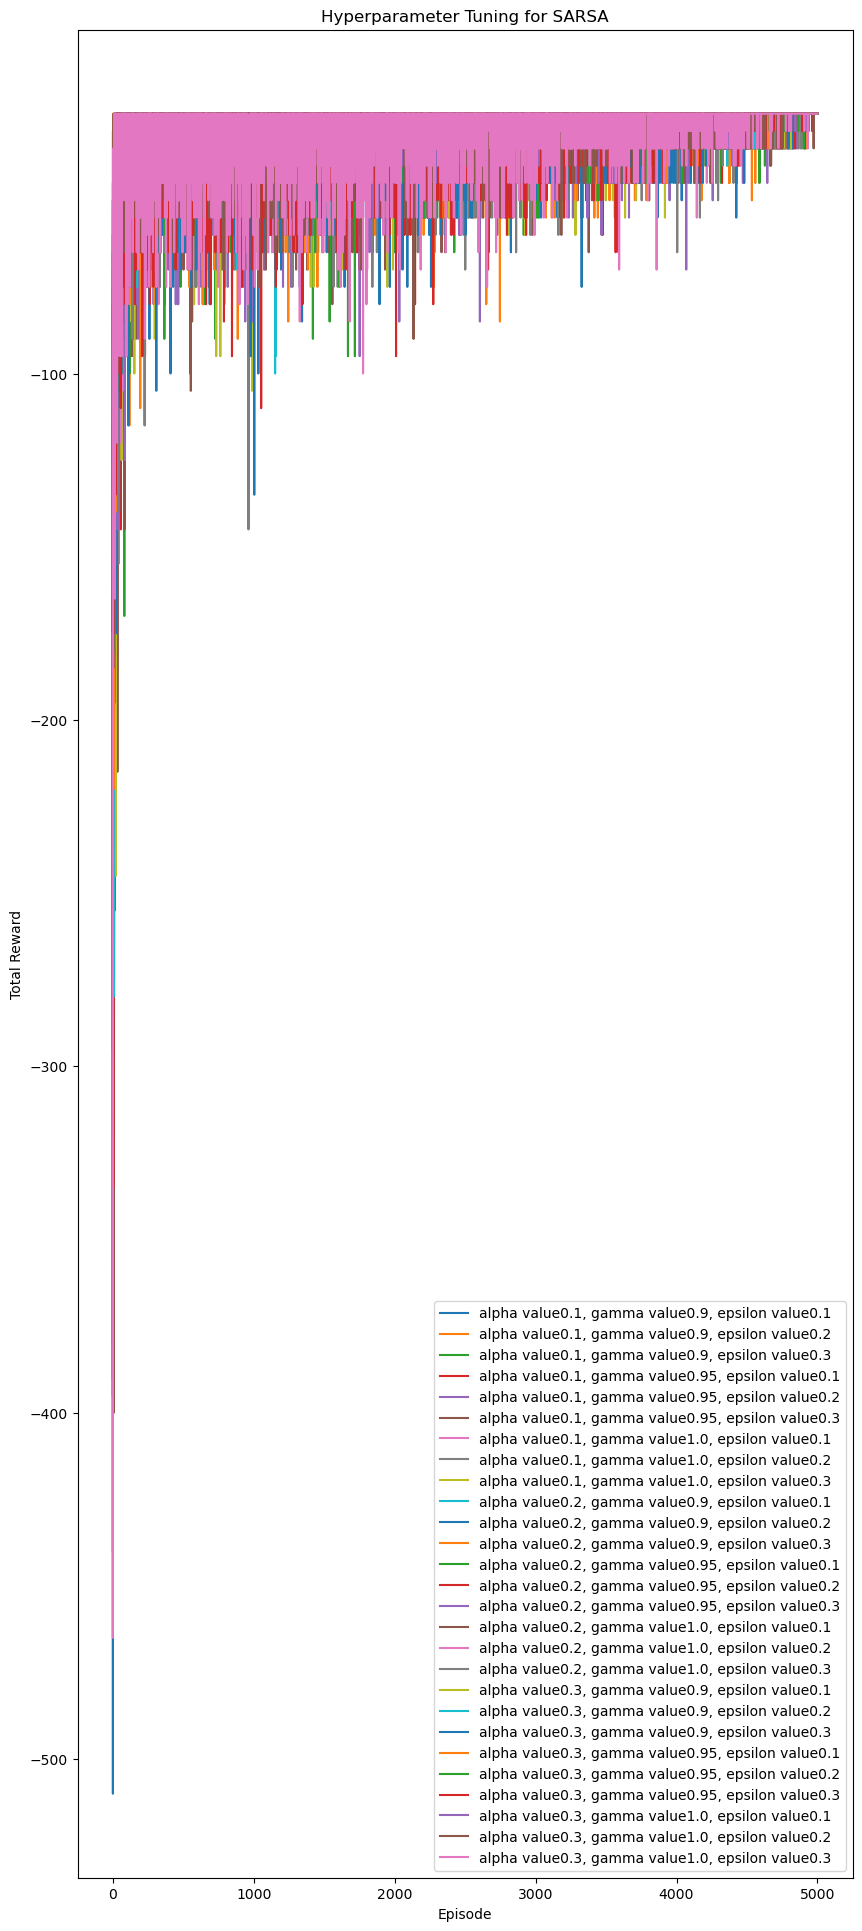

In [11]:
alpha_values = [0.1, 0.2, 0.3]
gamma_values = [0.9, 0.95, 1.0]
epsilon_values = [0.1, 0.2, 0.3]


plt.figure(figsize=(10,24)) 
for a in alpha_values:
     for g in gamma_values:
            for e in epsilon_values:
                Q, rewards = sarsa(env, num_episodes=5000, alpha=a, gamma=g, epsilon=e,mode='tuning')
                plt.plot(rewards, label="alpha value{}, gamma value{}, epsilon value{}".format(a, g, e))

           


plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Hyperparameter Tuning for SARSA")
plt.legend()
plt.show()

### Part 2 Step 3

from the graph above it is clear that performance can be improved thanks to the SARSA Algorithm, from the above graph we see that a alpha of 0.3 gamma of 0.9 and epsilon of 0.3 is the most efficient set up but its likely that we could have ended up with a diifferent results (perhaps even better?) if we had choosen different hyperparameters to train.

In [12]:
env = mars_exploration_rover(n=5, exploration_reward=10, exploration_penalty=-5, move_penalty=-1)
q_values, sarsa_rewards = sarsa(env, num_episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1,mode='tuned')
i=1
print('Q table is given by \n')
s_list=[]
a_list=[]
for s, a in q_values.items():
    s_list.append(s)
    a_list.append(a)
    print(f"{i})State= {s}, Action values= {a}")
    i+=1
    
import pandas as pd
df=pd.DataFrame()

df['State']=s_list
df['Action Values']=a_list

Q table is given by 

1)State= (0, 0), Action values= [-24.77475217 -21.30218759 -22.89638225 -24.70809645]
2)State= (1, 0), Action values= [-24.82197995 -18.1135402  -19.19421608 -21.71438797]
3)State= (0, 1), Action values= [-22.07691205 -19.59748813 -19.22534991 -24.11246879]
4)State= (1, 1), Action values= [-21.15304985 -14.96363914 -15.95819698 -21.5458332 ]
5)State= (0, 2), Action values= [-18.31744853 -15.65068123 -16.19886927 -19.85949375]
6)State= (1, 2), Action values= [-16.19838215 -12.59714419 -11.63293689 -17.30426714]
7)State= (0, 3), Action values= [-14.19792556 -12.43930043 -12.5489231  -16.78056554]
8)State= (1, 3), Action values= [-13.26818903  -8.59306961  -6.72163592 -10.51344893]
9)State= (0, 4), Action values= [ -9.46631915  -8.4346171   -9.7691844  -10.76771542]
10)State= (1, 4), Action values= [-10.72509916  -1.47007818  -6.56003917 -10.40562812]
11)State= (2, 4), Action values= [-7.02809058  3.4163845  -2.03564421 -7.29570179]
12)State= (2, 0), Action values= [

In [13]:
s_list


df.head()

State                                      Action Values
0  (0, 0)  [-24.774752170548123, -21.302187592296733, -22...
1  (1, 0)  [-24.821979952866577, -18.113540204150347, -19...
2  (0, 1)  [-22.076912052206403, -19.59748812552582, -19....
3  (1, 1)  [-21.153049847236076, -14.9636391438033, -15.9...
4  (0, 2)  [-18.317448527032685, -15.650681234042773, -16...

In [14]:
# ---------------------------------------------------------------------------------------------------------------------------------

# Part 3

# Part 3 step 1

In [15]:
def q_learning(env, num_episodes, alpha, gamma, epsilon, mode):
    def decay_epsilon(epsilon):
        decay_rate = 0.99 
        return epsilon * decay_rate

    def epsilon_greedy_policy(Q, epsilon, num_actions):
        if np.random.uniform() < epsilon:
            return np.random.choice(num_actions)
        else:
            return np.argmax(Q)
    Q = defaultdict(lambda: np.zeros(env.possible_action.n))
    rewards = []
    epsilon_values = []
    
    for i in range(num_episodes):
        if i % 100 == 0 and mode == 'non tuned':
            print("\rEpisode {} out of {}".format(i, num_episodes), end="")
        
        state, grid = env.reset()
        episode_reward = 0
        done = False
        
        while not done:
            epsilon_values.append(epsilon) 
            action = epsilon_greedy_policy(Q[state], epsilon, env.possible_action.n)
            next_state, reward, done, _ = env.step(action)
            next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            episode_reward += reward
            state = next_state
        
        rewards.append(episode_reward)
        epsilon = decay_epsilon(epsilon) 
    
    return Q, rewards, epsilon_values



In [16]:
env = mars_exploration_rover(n=5, exploration_reward=10, exploration_penalty=-5, move_penalty=-1)
Q, rewards_qlearning, epsilon_values = q_learning(env, num_episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1, mode='non tuned')



Episode 4900 out of 5000

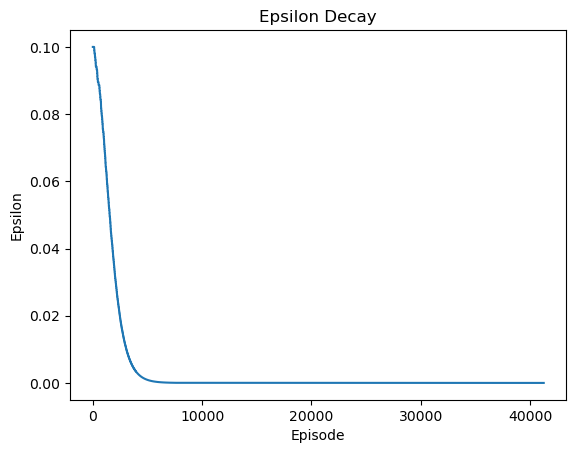

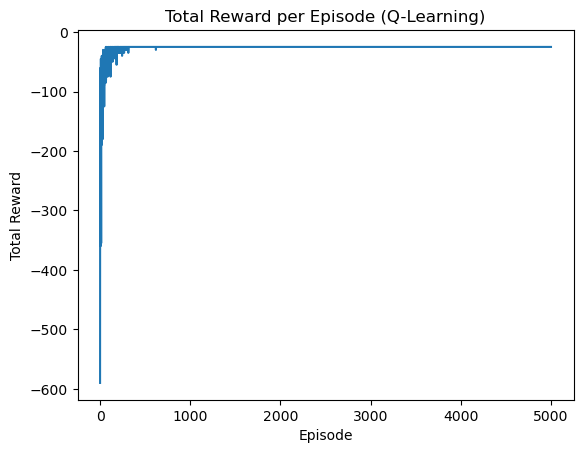

In [17]:
plt.plot(range(len(epsilon_values)), epsilon_values)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")


plt.figure()
plt.plot(range(len(rewards_qlearning)), rewards_qlearning)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode (Q-Learning)")

plt.show()

# Part3 Step2 and 3

In [18]:
import warnings
warnings.filterwarnings('ignore')

def q_learning(env, num_episodes, alpha, gamma, epsilon, mode):
    def epsilon_greedy_policy(Q, epsilon, num_actions):
        if np.random.uniform() < epsilon:
            return np.random.choice(num_actions)
        else:
            return np.argmax(Q)
    Q = defaultdict(lambda: np.zeros(env.possible_action.n))
    rewards = []
    for i in range(num_episodes):
        if i % 100 == 0 and mode == 'non tuned':
            print("\rEpisode {} out of {}".format(i, num_episodes), end="")
        state, grid = env.reset()
        episode_reward = 0
        done = False
        while not done:
            action = epsilon_greedy_policy(Q[state], epsilon, env.possible_action.n)
            next_state, reward, done, _ = env.step(action)
            next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            episode_reward += reward
            state = next_state
        rewards.append(episode_reward)
    return Q, rewards

#set up 1

[I 2023-05-11 20:33:51,636] A new study created in memory with name: no-name-30ac9079-01cc-4f32-9de5-1b5f00870754
[I 2023-05-11 20:33:51,910] Trial 0 finished with value: -54.0 and parameters: {'alpha': 0.27754763167133994, 'gamma': 0.7851392853041688, 'epsilon': 0.4998997981773179, 'num_episodes': 774}. Best is trial 0 with value: -54.0.
[I 2023-05-11 20:33:53,566] Trial 1 finished with value: -192.0 and parameters: {'alpha': 0.6402933073737089, 'gamma': 0.8010442067264583, 'epsilon': 0.871789882496113, 'num_episodes': 984}. Best is trial 0 with value: -54.0.
[I 2023-05-11 20:33:56,460] Trial 2 finished with value: -367.5 and parameters: {'alpha': 0.4949023285106317, 'gamma': 0.4907543434095343, 'epsilon': 0.9783283183887689, 'num_episodes': 880}. Best is trial 0 with value: -54.0.
[I 2023-05-11 20:33:56,916] Trial 3 finished with value: -63.5 and parameters: {'alpha': 0.2770781760248259, 'gamma': 0.5177603947931808, 'epsilon': 0.542101043312457, 'num_episodes': 987}. Best is trial 0 

[I 2023-05-11 20:34:06,928] Trial 34 finished with value: -64.5 and parameters: {'alpha': 0.4681069016628463, 'gamma': 0.8474153103080119, 'epsilon': 0.48544624961561833, 'num_episodes': 899}. Best is trial 24 with value: -39.5.
[I 2023-05-11 20:34:07,118] Trial 35 finished with value: -63.5 and parameters: {'alpha': 0.36706823708992864, 'gamma': 0.9431363690844465, 'epsilon': 0.44272818414565207, 'num_episodes': 378}. Best is trial 24 with value: -39.5.
[I 2023-05-11 20:34:07,322] Trial 36 finished with value: -87.5 and parameters: {'alpha': 0.5162097399464606, 'gamma': 0.881218391512783, 'epsilon': 0.5413571963545055, 'num_episodes': 269}. Best is trial 24 with value: -39.5.
[I 2023-05-11 20:34:07,403] Trial 37 finished with value: -51.0 and parameters: {'alpha': 0.33610341826751094, 'gamma': 0.7764663649334835, 'epsilon': 0.5015918889266452, 'num_episodes': 149}. Best is trial 24 with value: -39.5.
[I 2023-05-11 20:34:07,626] Trial 38 finished with value: -63.5 and parameters: {'alp

[I 2023-05-11 20:34:15,371] Trial 68 finished with value: -49.0 and parameters: {'alpha': 0.5853423528897138, 'gamma': 0.9446447899899191, 'epsilon': 0.47551723206417673, 'num_episodes': 423}. Best is trial 51 with value: -36.0.
[I 2023-05-11 20:34:15,585] Trial 69 finished with value: -62.0 and parameters: {'alpha': 0.541694168134677, 'gamma': 0.8419544216189385, 'epsilon': 0.5274129917151217, 'num_episodes': 342}. Best is trial 51 with value: -36.0.
[I 2023-05-11 20:34:15,655] Trial 70 finished with value: -48.0 and parameters: {'alpha': 0.31196133049117514, 'gamma': 0.9938895723263862, 'epsilon': 0.43672426117518526, 'num_episodes': 182}. Best is trial 51 with value: -36.0.
[I 2023-05-11 20:34:15,918] Trial 71 finished with value: -43.5 and parameters: {'alpha': 0.6913397728864284, 'gamma': 0.8237730075633516, 'epsilon': 0.41384255901229877, 'num_episodes': 670}. Best is trial 51 with value: -36.0.
[I 2023-05-11 20:34:16,216] Trial 72 finished with value: -73.0 and parameters: {'alp

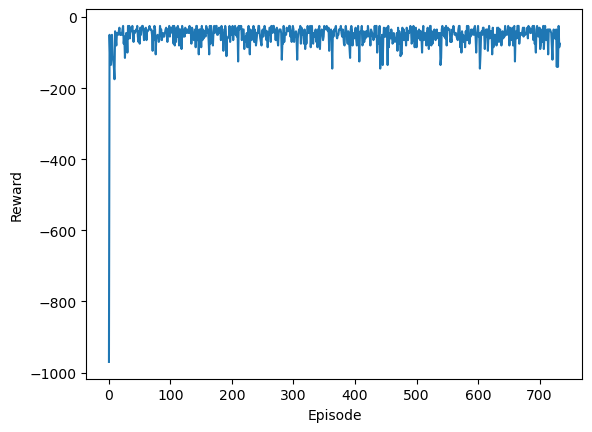

In [19]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 0.01, 1.0)
    gamma = trial.suggest_float("gamma", 0.2, 1.0)
    epsilon = trial.suggest_float("epsilon", 0.4, 1.0)
    num_episodes = trial.suggest_int("num_episodes", 100, 1000) 
    Q, rewards = q_learning(env, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, mode='tuned') 
    return np.mean(rewards[-10:])


env = mars_exploration_rover(n=5, exploration_reward=10, exploration_penalty=-5, move_penalty=-1)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
best_params = study.best_params
Q, rewards = q_learning(env, num_episodes=best_params["num_episodes"], alpha=best_params["alpha"], gamma=best_params["gamma"], epsilon=best_params["epsilon"], mode='tuned')


plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

#set up 2

[I 2023-05-11 20:34:24,088] A new study created in memory with name: no-name-aef3a771-148b-459e-8bff-b3f28d6c1a0d
[I 2023-05-11 20:34:24,210] Trial 0 finished with value: -52.0 and parameters: {'alpha': 0.07423199936746319, 'gamma': 0.6875100834166293, 'epsilon': 0.3078323832083314, 'num_episodes': 244}. Best is trial 0 with value: -52.0.
[I 2023-05-11 20:34:24,910] Trial 1 finished with value: -112.0 and parameters: {'alpha': 0.6067317097396515, 'gamma': 0.4616912946969496, 'epsilon': 0.7452029642236531, 'num_episodes': 760}. Best is trial 0 with value: -52.0.
[I 2023-05-11 20:34:27,742] Trial 2 finished with value: -327.0 and parameters: {'alpha': 0.7135956486370612, 'gamma': 0.570412060107725, 'epsilon': 0.964450220602842, 'num_episodes': 955}. Best is trial 0 with value: -52.0.
[I 2023-05-11 20:34:28,329] Trial 3 finished with value: -129.5 and parameters: {'alpha': 0.3556684611773318, 'gamma': 0.5821069242955864, 'epsilon': 0.823628617365258, 'num_episodes': 454}. Best is trial 0 

[I 2023-05-11 20:34:38,324] Trial 34 finished with value: -42.5 and parameters: {'alpha': 0.6247278644096015, 'gamma': 0.9454343685390832, 'epsilon': 0.30132944642128495, 'num_episodes': 267}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:38,473] Trial 35 finished with value: -50.0 and parameters: {'alpha': 0.7199046908136855, 'gamma': 0.9324690968528634, 'epsilon': 0.38758236833713733, 'num_episodes': 422}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:38,647] Trial 36 finished with value: -67.5 and parameters: {'alpha': 0.692020508488772, 'gamma': 0.989177653411982, 'epsilon': 0.4654685065042183, 'num_episodes': 356}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:38,950] Trial 37 finished with value: -57.0 and parameters: {'alpha': 0.5843652668347115, 'gamma': 0.7786335349770357, 'epsilon': 0.41469014781678426, 'num_episodes': 907}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:39,067] Trial 38 finished with value: -56.0 and parameters: {'alpha': 0

[I 2023-05-11 20:34:46,418] Trial 69 finished with value: -46.5 and parameters: {'alpha': 0.5716284558196676, 'gamma': 0.9491697513901411, 'epsilon': 0.36128052497155305, 'num_episodes': 775}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:46,753] Trial 70 finished with value: -51.0 and parameters: {'alpha': 0.6866401699118775, 'gamma': 0.9788703288207112, 'epsilon': 0.40795831203720684, 'num_episodes': 814}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:47,008] Trial 71 finished with value: -37.0 and parameters: {'alpha': 0.7406234453408811, 'gamma': 0.9209605051528216, 'epsilon': 0.30213273884560465, 'num_episodes': 549}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:47,201] Trial 72 finished with value: -50.0 and parameters: {'alpha': 0.7364889390312852, 'gamma': 0.8950510131078181, 'epsilon': 0.33516553538341665, 'num_episodes': 834}. Best is trial 6 with value: -34.5.
[I 2023-05-11 20:34:47,442] Trial 73 finished with value: -39.5 and parameters: {'alpha'

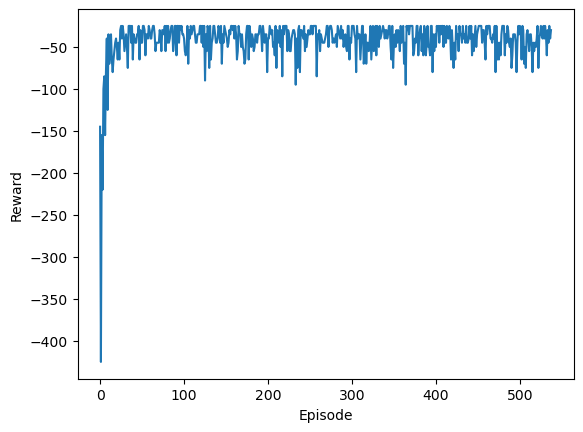

In [20]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 0.02, 1.0)
    gamma = trial.suggest_float("gamma", 0.3, 1.0)
    epsilon = trial.suggest_float("epsilon", 0.3, 1.0)
    num_episodes = trial.suggest_int("num_episodes", 100, 1000)   
    Q, rewards = q_learning(env, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, mode='tuned')
    return np.mean(rewards[-10:])


env = mars_exploration_rover(n=5, exploration_reward=10, exploration_penalty=-5, move_penalty=-1)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
best_params = study.best_params
Q, rewards = q_learning(env, num_episodes=best_params["num_episodes"], alpha=best_params["alpha"], gamma=best_params["gamma"], epsilon=best_params["epsilon"], mode='tuned')

plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

#setup 3

[I 2023-05-11 20:34:54,476] A new study created in memory with name: no-name-1e2b6efd-027f-4f75-a5e6-48bf2da0c7d9
[I 2023-05-11 20:34:54,775] Trial 0 finished with value: -107.5 and parameters: {'alpha': 0.06776345202492168, 'gamma': 0.7159888725085707, 'epsilon': 0.7030948900048742, 'num_episodes': 253}. Best is trial 0 with value: -107.5.
[I 2023-05-11 20:34:56,275] Trial 1 finished with value: -329.0 and parameters: {'alpha': 0.41470922911259067, 'gamma': 0.9487172675933, 'epsilon': 0.9584804928196424, 'num_episodes': 361}. Best is trial 0 with value: -107.5.
[I 2023-05-11 20:34:57,215] Trial 2 finished with value: -118.5 and parameters: {'alpha': 0.24342101903957275, 'gamma': 0.6300887790991299, 'epsilon': 0.7644683097867259, 'num_episodes': 694}. Best is trial 0 with value: -107.5.
[I 2023-05-11 20:34:59,251] Trial 3 finished with value: -139.0 and parameters: {'alpha': 0.7466716231151509, 'gamma': 0.6746512307436474, 'epsilon': 0.908036437753327, 'num_episodes': 994}. Best is tri

[I 2023-05-11 20:35:13,116] Trial 34 finished with value: -127.0 and parameters: {'alpha': 0.29668030374991494, 'gamma': 0.6474658009364518, 'epsilon': 0.7401062117401859, 'num_episodes': 281}. Best is trial 29 with value: -77.0.
[I 2023-05-11 20:35:13,306] Trial 35 finished with value: -104.0 and parameters: {'alpha': 0.10769110162888292, 'gamma': 0.6815110103009578, 'epsilon': 0.7019855337484004, 'num_episodes': 153}. Best is trial 29 with value: -77.0.
[I 2023-05-11 20:35:13,598] Trial 36 finished with value: -99.5 and parameters: {'alpha': 0.036890446188704795, 'gamma': 0.769194197360228, 'epsilon': 0.7245047069266443, 'num_episodes': 231}. Best is trial 29 with value: -77.0.
[I 2023-05-11 20:35:14,131] Trial 37 finished with value: -126.0 and parameters: {'alpha': 0.21737418586632, 'gamma': 0.6104681993764377, 'epsilon': 0.7458469492450484, 'num_episodes': 560}. Best is trial 29 with value: -77.0.
[I 2023-05-11 20:35:14,546] Trial 38 finished with value: -133.5 and parameters: {'a

[I 2023-05-11 20:35:24,430] Trial 68 finished with value: -69.5 and parameters: {'alpha': 0.40286160240057833, 'gamma': 0.794871084630734, 'epsilon': 0.7294821058224752, 'num_episodes': 117}. Best is trial 68 with value: -69.5.
[I 2023-05-11 20:35:24,565] Trial 69 finished with value: -98.0 and parameters: {'alpha': 0.2732249057706197, 'gamma': 0.6908377357749482, 'epsilon': 0.7508891888235991, 'num_episodes': 107}. Best is trial 68 with value: -69.5.
[I 2023-05-11 20:35:24,725] Trial 70 finished with value: -94.0 and parameters: {'alpha': 0.3168540672016603, 'gamma': 0.7383205782020755, 'epsilon': 0.7272416750552352, 'num_episodes': 126}. Best is trial 68 with value: -69.5.
[I 2023-05-11 20:35:24,958] Trial 71 finished with value: -131.0 and parameters: {'alpha': 0.39677757628897103, 'gamma': 0.8261261166457916, 'epsilon': 0.7079986934245307, 'num_episodes': 211}. Best is trial 68 with value: -69.5.
[I 2023-05-11 20:35:25,172] Trial 72 finished with value: -117.5 and parameters: {'alp

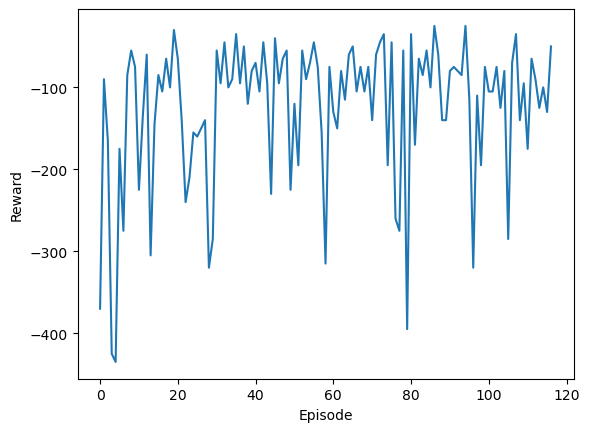

In [21]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 0.03, 1.0)
    gamma = trial.suggest_float("gamma", 0.5, 1.0)
    epsilon = trial.suggest_float("epsilon", 0.7, 1.0)
    num_episodes = trial.suggest_int("num_episodes", 100, 1000)
    Q, rewards = q_learning(env, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, mode='tuned')
    return np.mean(rewards[-10:])


env = mars_exploration_rover(n=5, exploration_reward=10, exploration_penalty=-5, move_penalty=-1)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)


best_params = study.best_params
Q, rewards = q_learning(env, num_episodes=best_params["num_episodes"], alpha=best_params["alpha"], gamma=best_params["gamma"], epsilon=best_params["epsilon"], mode='tuned')


plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

# A few extra analysis required for the report

2 c

In [23]:
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    def evaluate_policy(env, Q, num_episodes):
        rewards = []
        for _ in range(num_episodes):
            state, grid = env.reset()
            episode_reward = 0
            done = False
            while not done:
                action = np.argmax(Q[state])
                state, reward, done, _ = env.step(action)
                episode_reward += reward
            rewards.append(episode_reward)
        return rewards




    def epsilon_greedy_policy(Q, epsilon, num_actions):
        if np.random.uniform() < epsilon:
            return np.random.choice(num_actions)
        else:
            return np.argmax(Q)
    Q = defaultdict(lambda: np.zeros(env.possible_action.n))
    rewards = []
    for i in range(num_episodes):
        state, grid = env.reset()
        episode_reward = 0
        done = False
        action = epsilon_greedy_policy(Q[state], epsilon, env.possible_action.n)
        
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(Q[next_state], epsilon, env.possible_action.n)
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            episode_reward += reward
            state = next_state
            action = next_action
        
        rewards.append(episode_reward)
    
    return Q, rewards


def plot_rewards(sarsa_rewards, rewards_qlearning):
    plt.plot(sarsa_rewards, label='SARSA')
    plt.plot(rewards_qlearning, label='Q-Learning')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward Dynamics: SARSA vs Q-Learning')
    plt.legend()
    plt.show()

def evaluate_policy(env, Q, num_episodes):
        rewards = []
        for _ in range(num_episodes):
            state, grid = env.reset()
            episode_reward = 0
            done = False
            while not done:
                action = np.argmax(Q[state])
                state, reward, done, _ = env.step(action)
                episode_reward += reward
            rewards.append(episode_reward)
        return rewards

In [24]:
env = mars_exploration_rover(n=5, exploration_reward=500, exploration_penalty=-5, move_penalty=-1)
num_episodes = 100
alpha = 0.1
gamma = 0.99
epsilon = 0.1
Q, training_rewards = sarsa(env, num_episodes, alpha, gamma, epsilon)
evaluation_episodes = 100
evaluation_rewards = evaluate_policy(env, Q, evaluation_episodes)

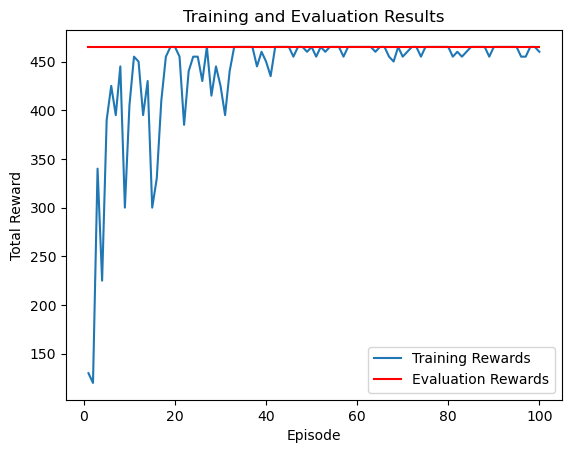

In [25]:
plt.plot(range(1, num_episodes+1), training_rewards, label="Training Rewards")
plt.plot(range(1, evaluation_episodes+1), evaluation_rewards, label="Evaluation Rewards", color='red')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training and Evaluation Results")
plt.legend()
plt.show()

In [26]:
# 3

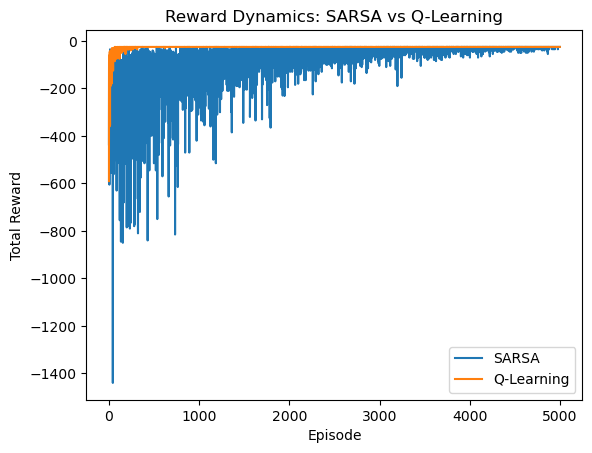

In [27]:
plot_rewards(rewards_sarsa, rewards_qlearning)

# Bonus Task

In [40]:
def two_step_sarsa(env, num_episodes, alpha, gamma, epsilon):
    def epsilon_greedy_policy(Q, state, epsilon):
        num_actions = len(Q[state])

        if np.random.uniform() < epsilon:
            return np.random.choice(num_actions)
        else:
            return np.argmax(Q[state])

    Q = defaultdict(lambda: np.zeros(env.possible_action.n))
    rewards = []
    epsilon_decay = epsilon / num_episodes  
    for episode in range(num_episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        episode_reward = 0
        done = False

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            td_error = reward + gamma * Q[next_state][next_action] - Q[state][action]
            Q[state][action] += alpha * td_error
            episode_reward += reward
            state = next_state
            action = next_action

            if done:
                break

        rewards.append(episode_reward)
        epsilon -= epsilon_decay

    return Q, rewards


In [41]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
num_episodes = 1000

Q_sarsa, rewards_sarsa = sarsa(env, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon)
Q_two_step_sarsa, rewards_two_step_sarsa = two_step_sarsa(env, num_episodes=num_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon)

avg_reward_sarsa = np.mean(rewards_sarsa)
avg_reward_two_step_sarsa = np.mean(rewards_two_step_sarsa)




In [42]:
print("Average reward for SARSA:", avg_reward_sarsa)
print("Average reward for two-step SARSA:", avg_reward_two_step_sarsa)

Average reward for SARSA: 458.72
Average reward for two-step SARSA: 460.535


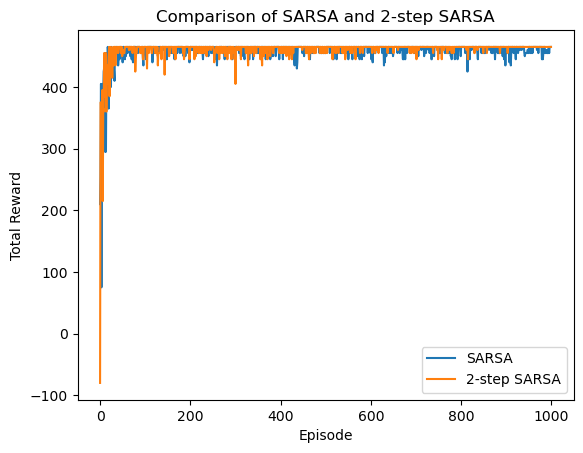

In [43]:
# Plot SARSA rewards
plt.plot(rewards_sarsa, label='SARSA')

# Plot 2-step SARSA rewards
plt.plot(rewards_two_step_sarsa, label='2-step SARSA')

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Comparison of SARSA and 2-step SARSA")
plt.legend()
plt.show()

# References

1. https://www.geeksforgeeks.org/sarsa-reinforcement-learning/
2. https://builtin.com/machine-learning/sarsa
3. https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-q-learning#:~:text=Q%2Dlearning%20is%20a%20model,next%20action%20to%20be%20taken.
4. https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial